### Homework
Download and plot 3 apparently related sets of data with at least. 

Each set should contain at least two related variables. 
You should explain how variables in each set of data are related. 
Plot each set using the scatter plot function and the line graph function. 
For example, you might the obseved rate of unemployement and the natural rate of unemployment in the same graph. 

To find data, search for data at FRED and use the code associated with the data. For example, the CPI measure that includes urban items is identified by the code, CPIAUCSL.





In [1]:
from matplotlib.backends.backend_pdf import PdfPages
#from datlib.plots import *
from library.plot_functions import *
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

In [2]:
fed_datasets = {
    "Unemployment Rate": "UNRATE",
    "Personal Saving Rate": "PSAVERT",
    "New Privately-Owned Housing Units Started: Units in Buildings with 5 Units or More":"HOUST5F",
    "Housing Inventory: Median Listing Price per Square Feet in the United States": "MEDLISPRIPERSQUFEEUS",
    "Housing Inventory: Median Home Size in Square Feet in the United States":"MEDSQUFEEUS",
    "Total Construction Spending: Highway and Street in the United States":"TLHWYCONS",
    "Employment for Construction: Highway, Street, and Bridge Construction (NAICS 2373) in the United States":"IPUDN2373W200000000",
    "Producer Price Index by Commodity: Farm Products: Russet Potatoes":"WPU01130603",
    "Average Price: Potato Chips (Cost per 16 Ounces) in U.S. City Average":"APU0000718311",
    "Average Price: Potatoes, White (Cost per Pound/453.6 Grams) in U.S. City Average":"APU0000712112",
    "New Privately-Owned Housing Units Started: Total Units":"HOUST",
    "New Privately-Owned Housing Units Started: Single-Family Units": "HOUST1F",
    "New Privately-Owned Housing Units Started: Units in Buildings with 2-4 Units":"HOUST2F",
    "New Privately-Owned Housing Units Started: Units in Buildings with 5 Units or More":"HOUST5F"
}

In [3]:
# Select start and end dates
start = datetime.datetime(1950, 1, 1)
end = datetime.datetime.today()

data = gather_data(
    data_codes = fed_datasets,
    start = start,
    end = end,
    freq= "M"
)

# Write dataframe to file
data.to_csv('../data/hwFedData.csv')

## Unexmployment vs. Personal Saving Rate

The following charts explore the rates of change in personal saving rate against the unemploymnet rate.

In this line chart below, I've applied the log function to the data to view changes in the data. The sharp increase in rate of change in unemployment and personal saving in 2019 is clearly related to the coronoavirus pandemic. The rate of change in personal saving rates seems to indicate a seasonality to the data. The increase in personal saving rate and then sharp decline at the end of 2012 and start of 2013 appears to be [changes in private wages ahead of a change in tax policy.](https://www.monitorbankrates.com/online-savings-accounts/u-s-personal-savings-increases-dramatically-in-december-2012)

C:\Users\SAND8464\Repos\ECON611\Homework\library\plot_functions.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([label_format.format(x) for x in vals])


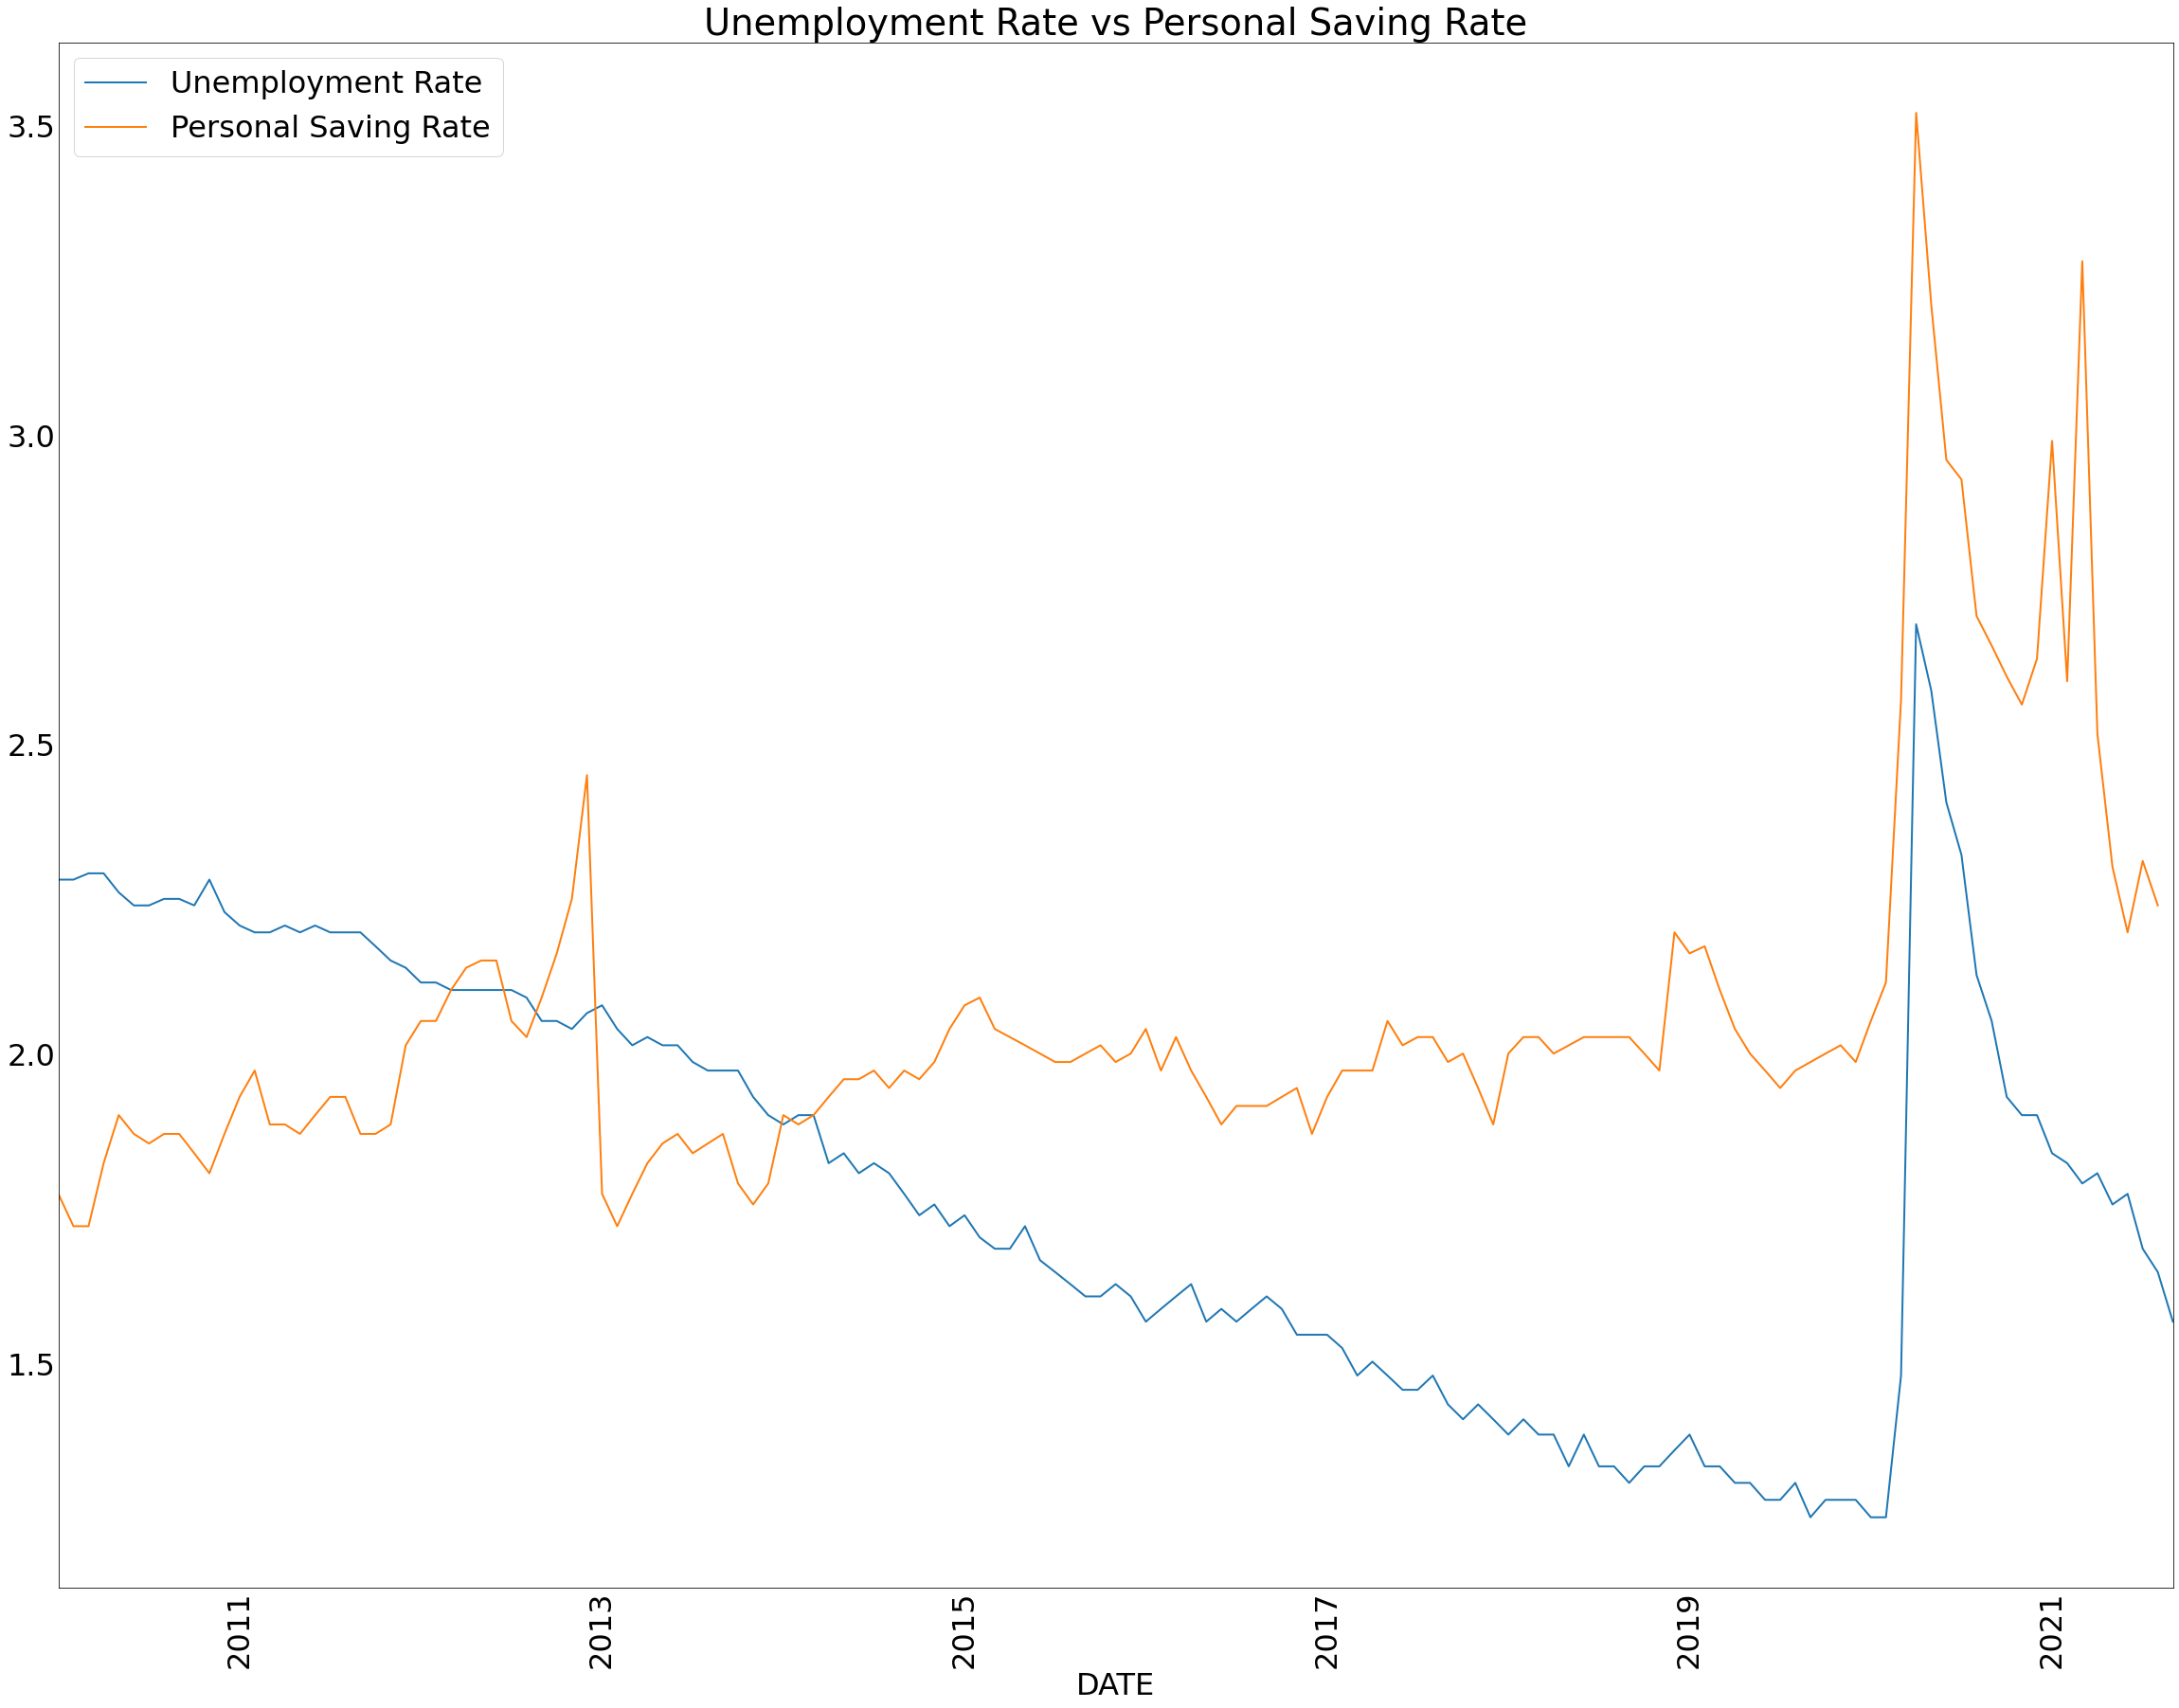

In [4]:
plt.rcParams.update({"font.size":32})
params = ["Unemployment Rate","Personal Saving Rate"]

df = np.log(data[params])

plot_lines(df = df.loc['2010-01-01':], 
           lw = 2, 
           pp = None,
          legend_columns = 1,
          title = str(params[0]) + str(' vs ')+ str(params[1]))

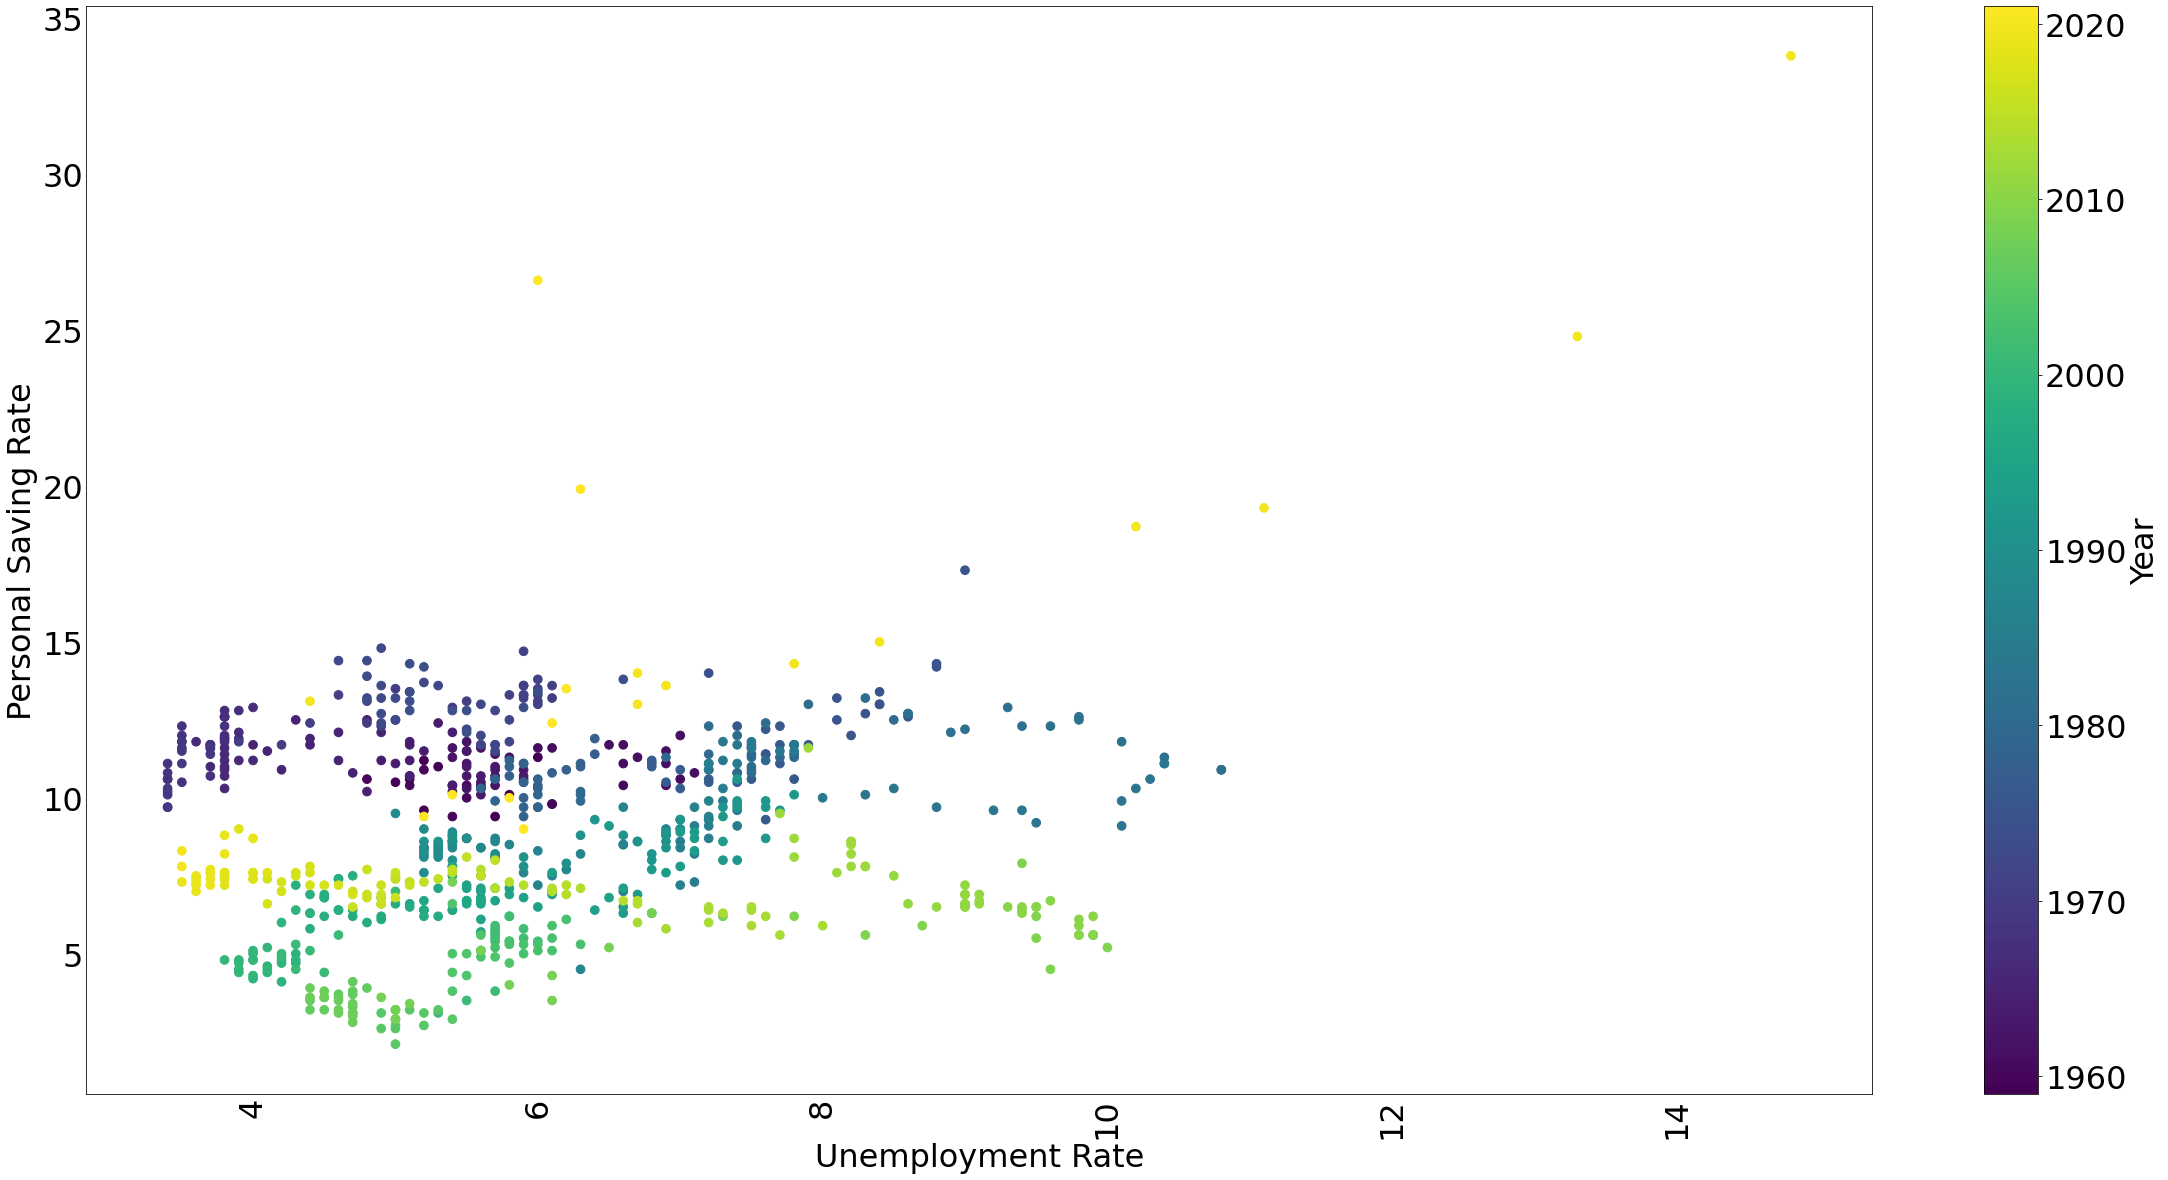

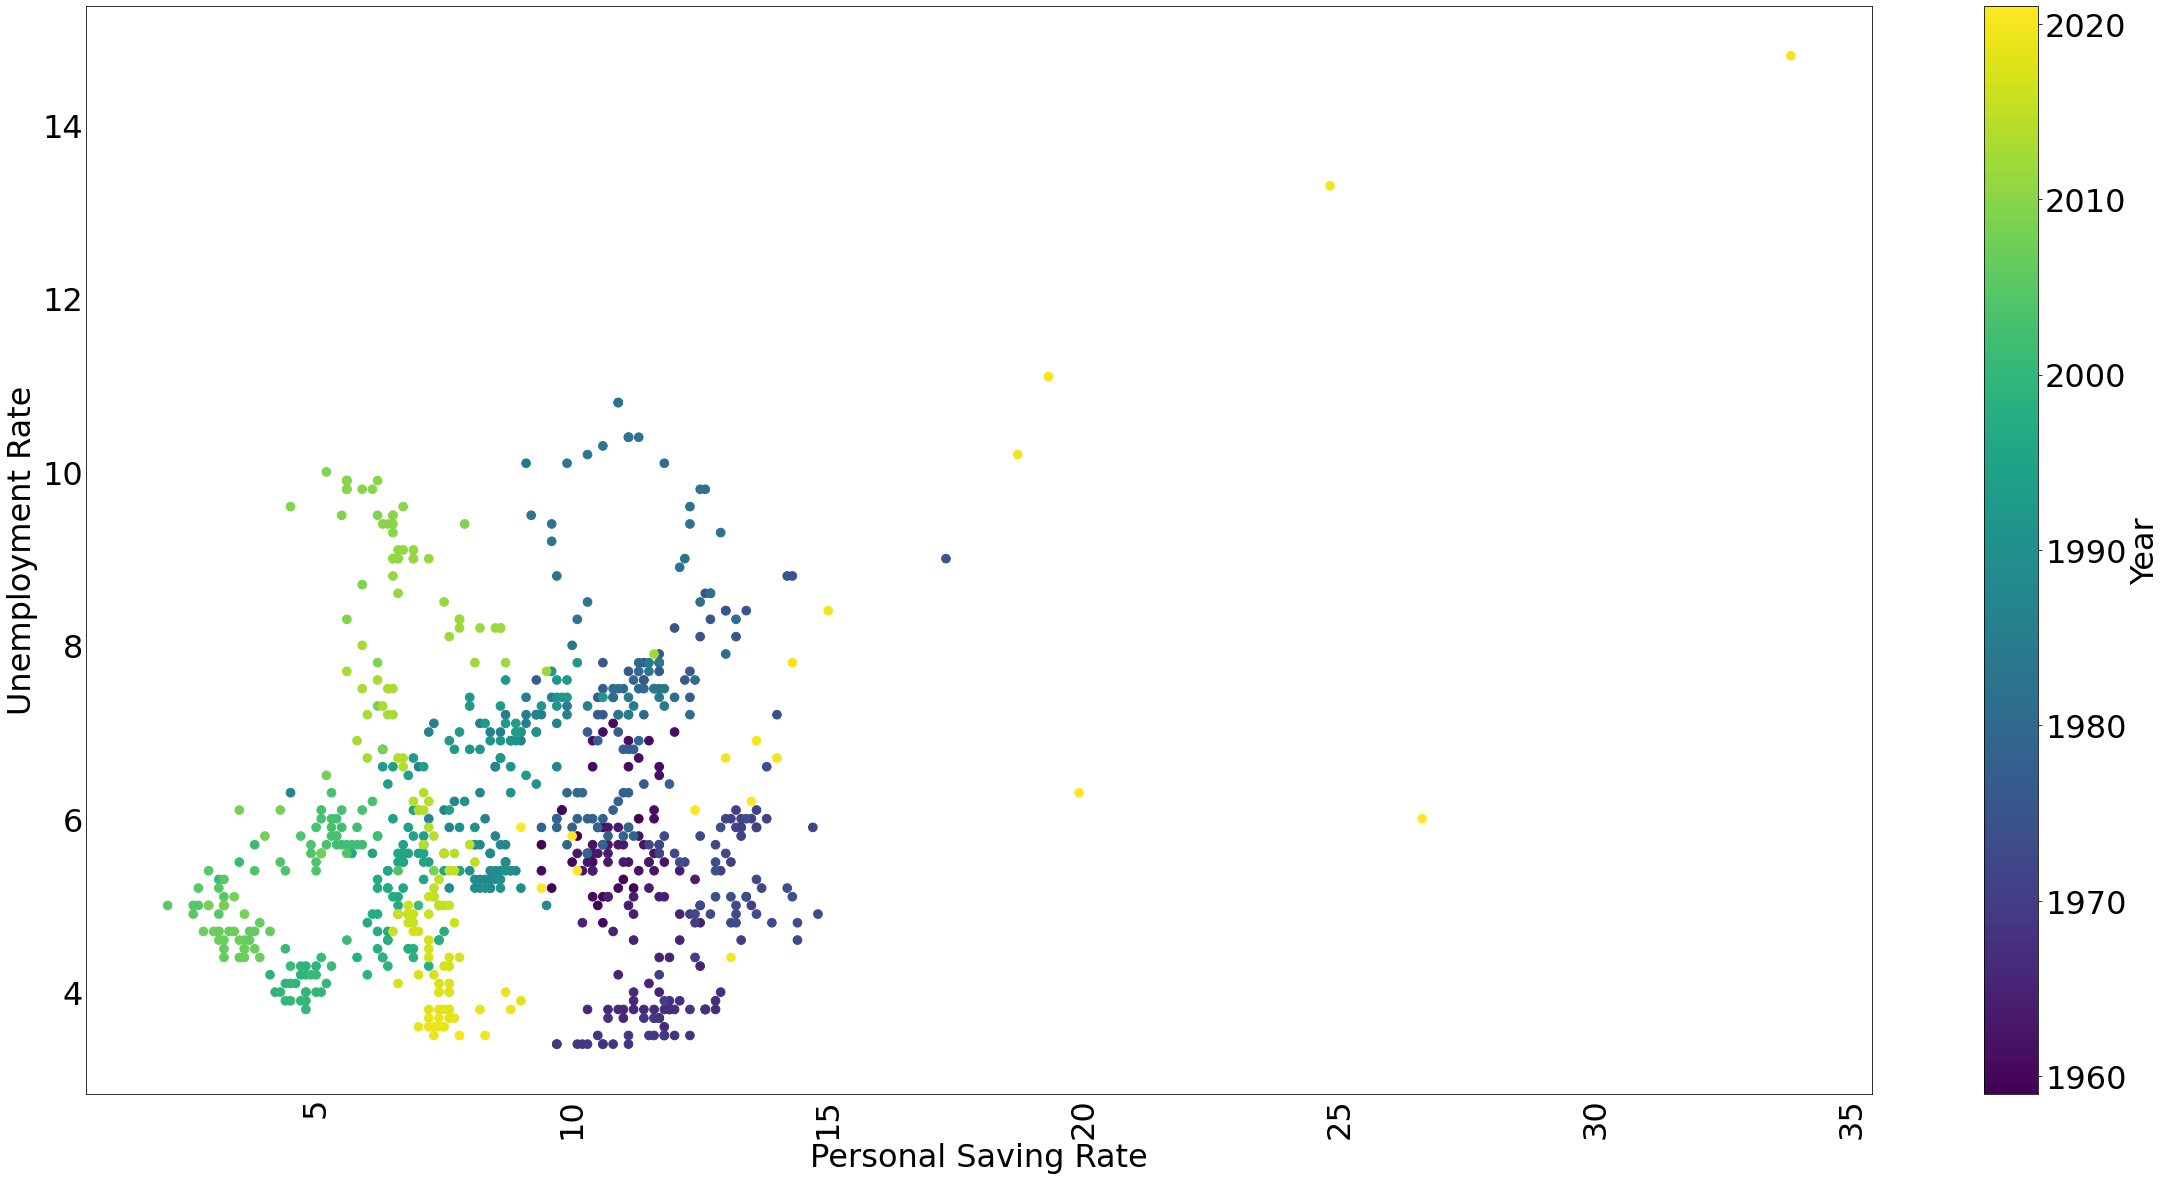

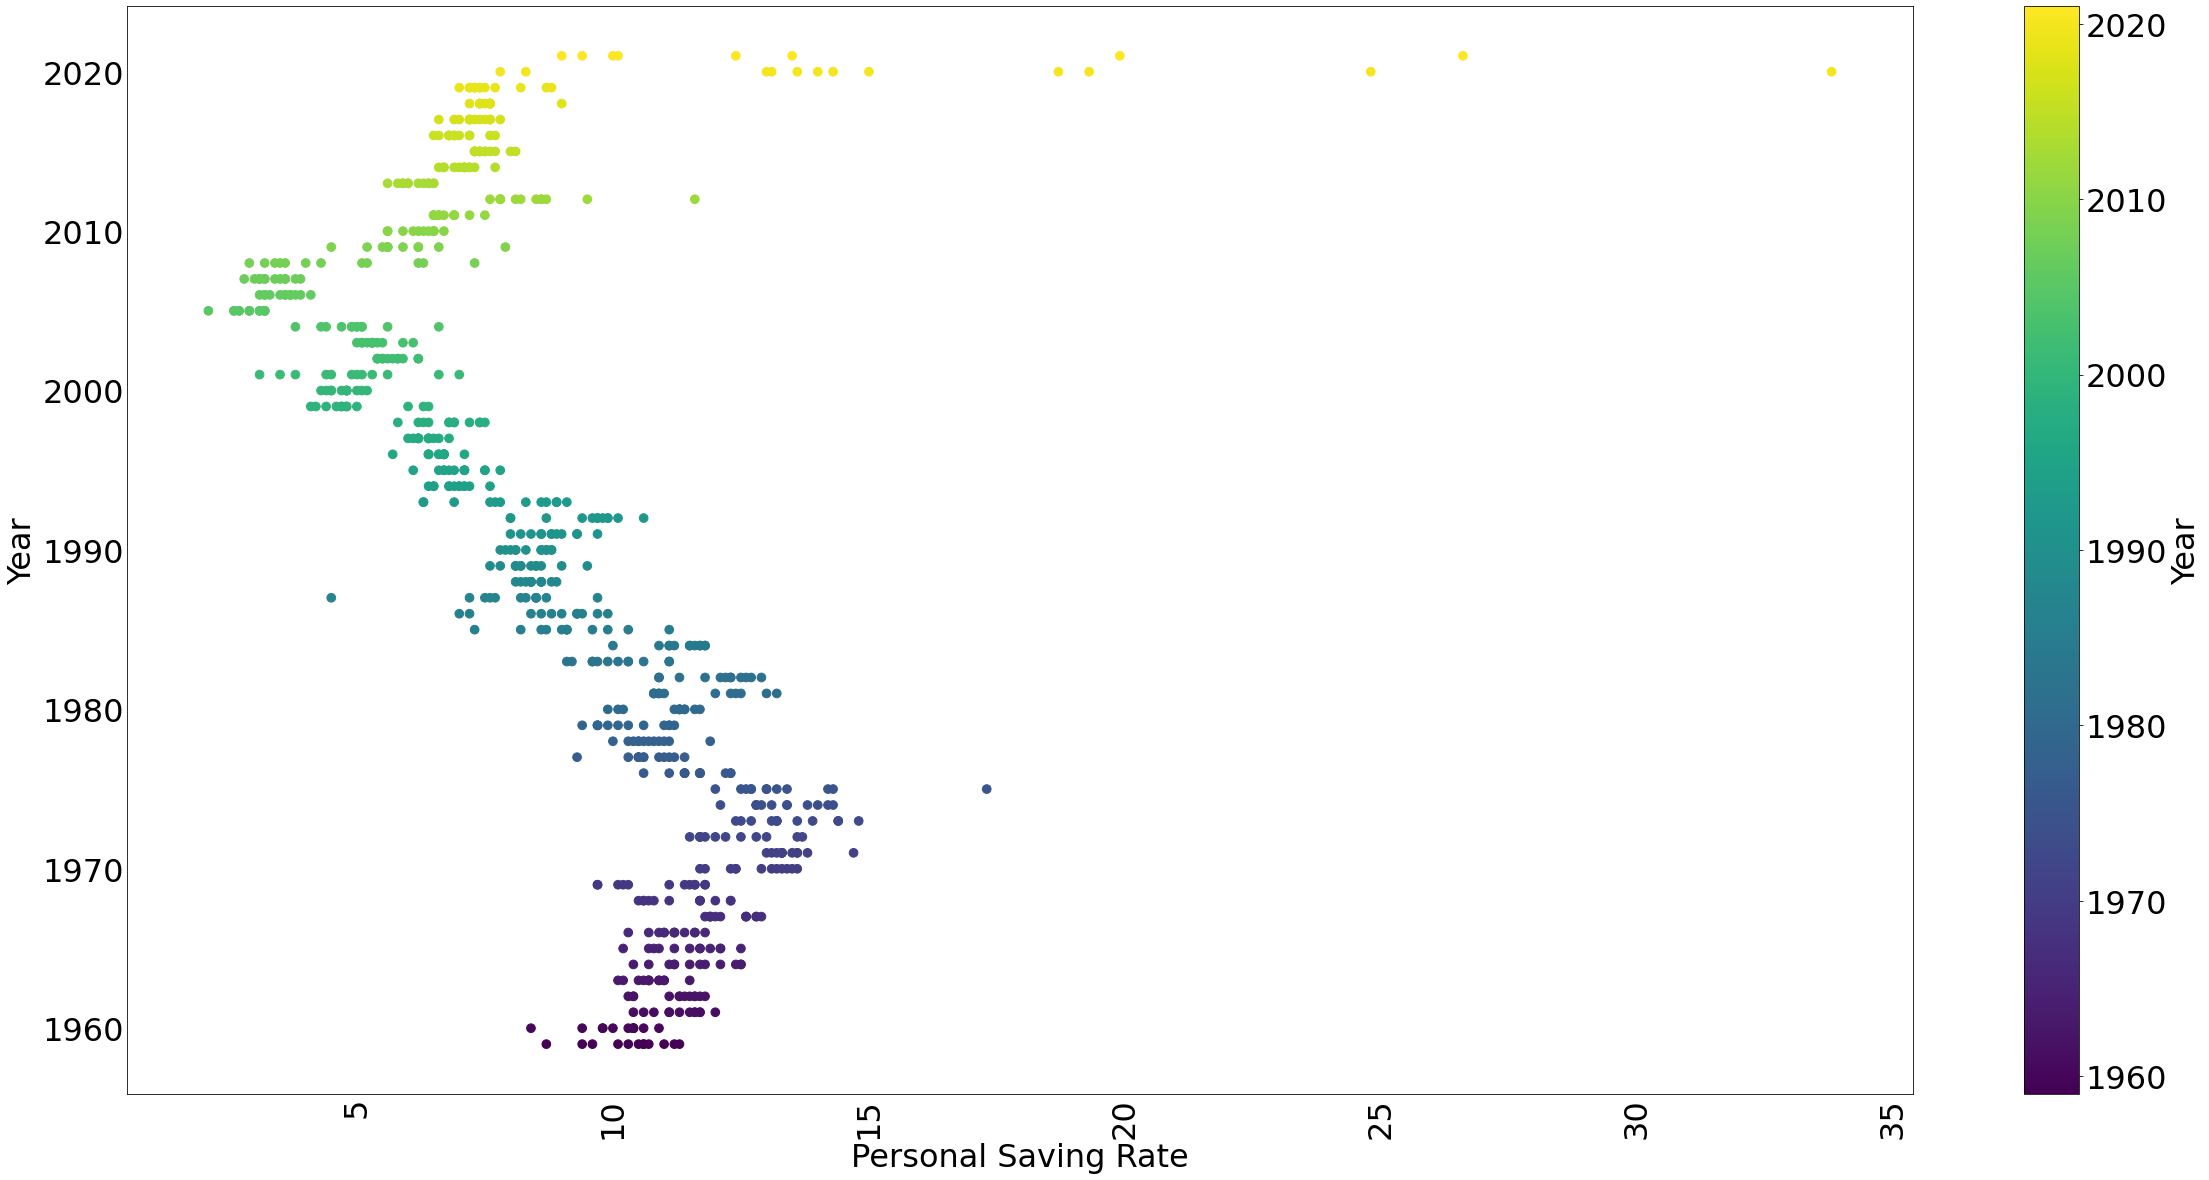

In [5]:
scatter_params = ["Unemployment Rate","Personal Saving Rate"]
plot_ts_scatter(data[scatter_params])

## Potato vs. Potato Chip Cost

The charts below examine prices for raw potatoes vs. potatoe chips. Obviously, potato chips are processed which includes processing, shipping, and labor costs. The data indicates that the price for raw potatos has not changed much and suggests that raw potato costs are likley not the primary influencers of change in potato chip prices.

C:\Users\SAND8464\Repos\ECON611\Homework\library\plot_functions.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([label_format.format(x) for x in vals])


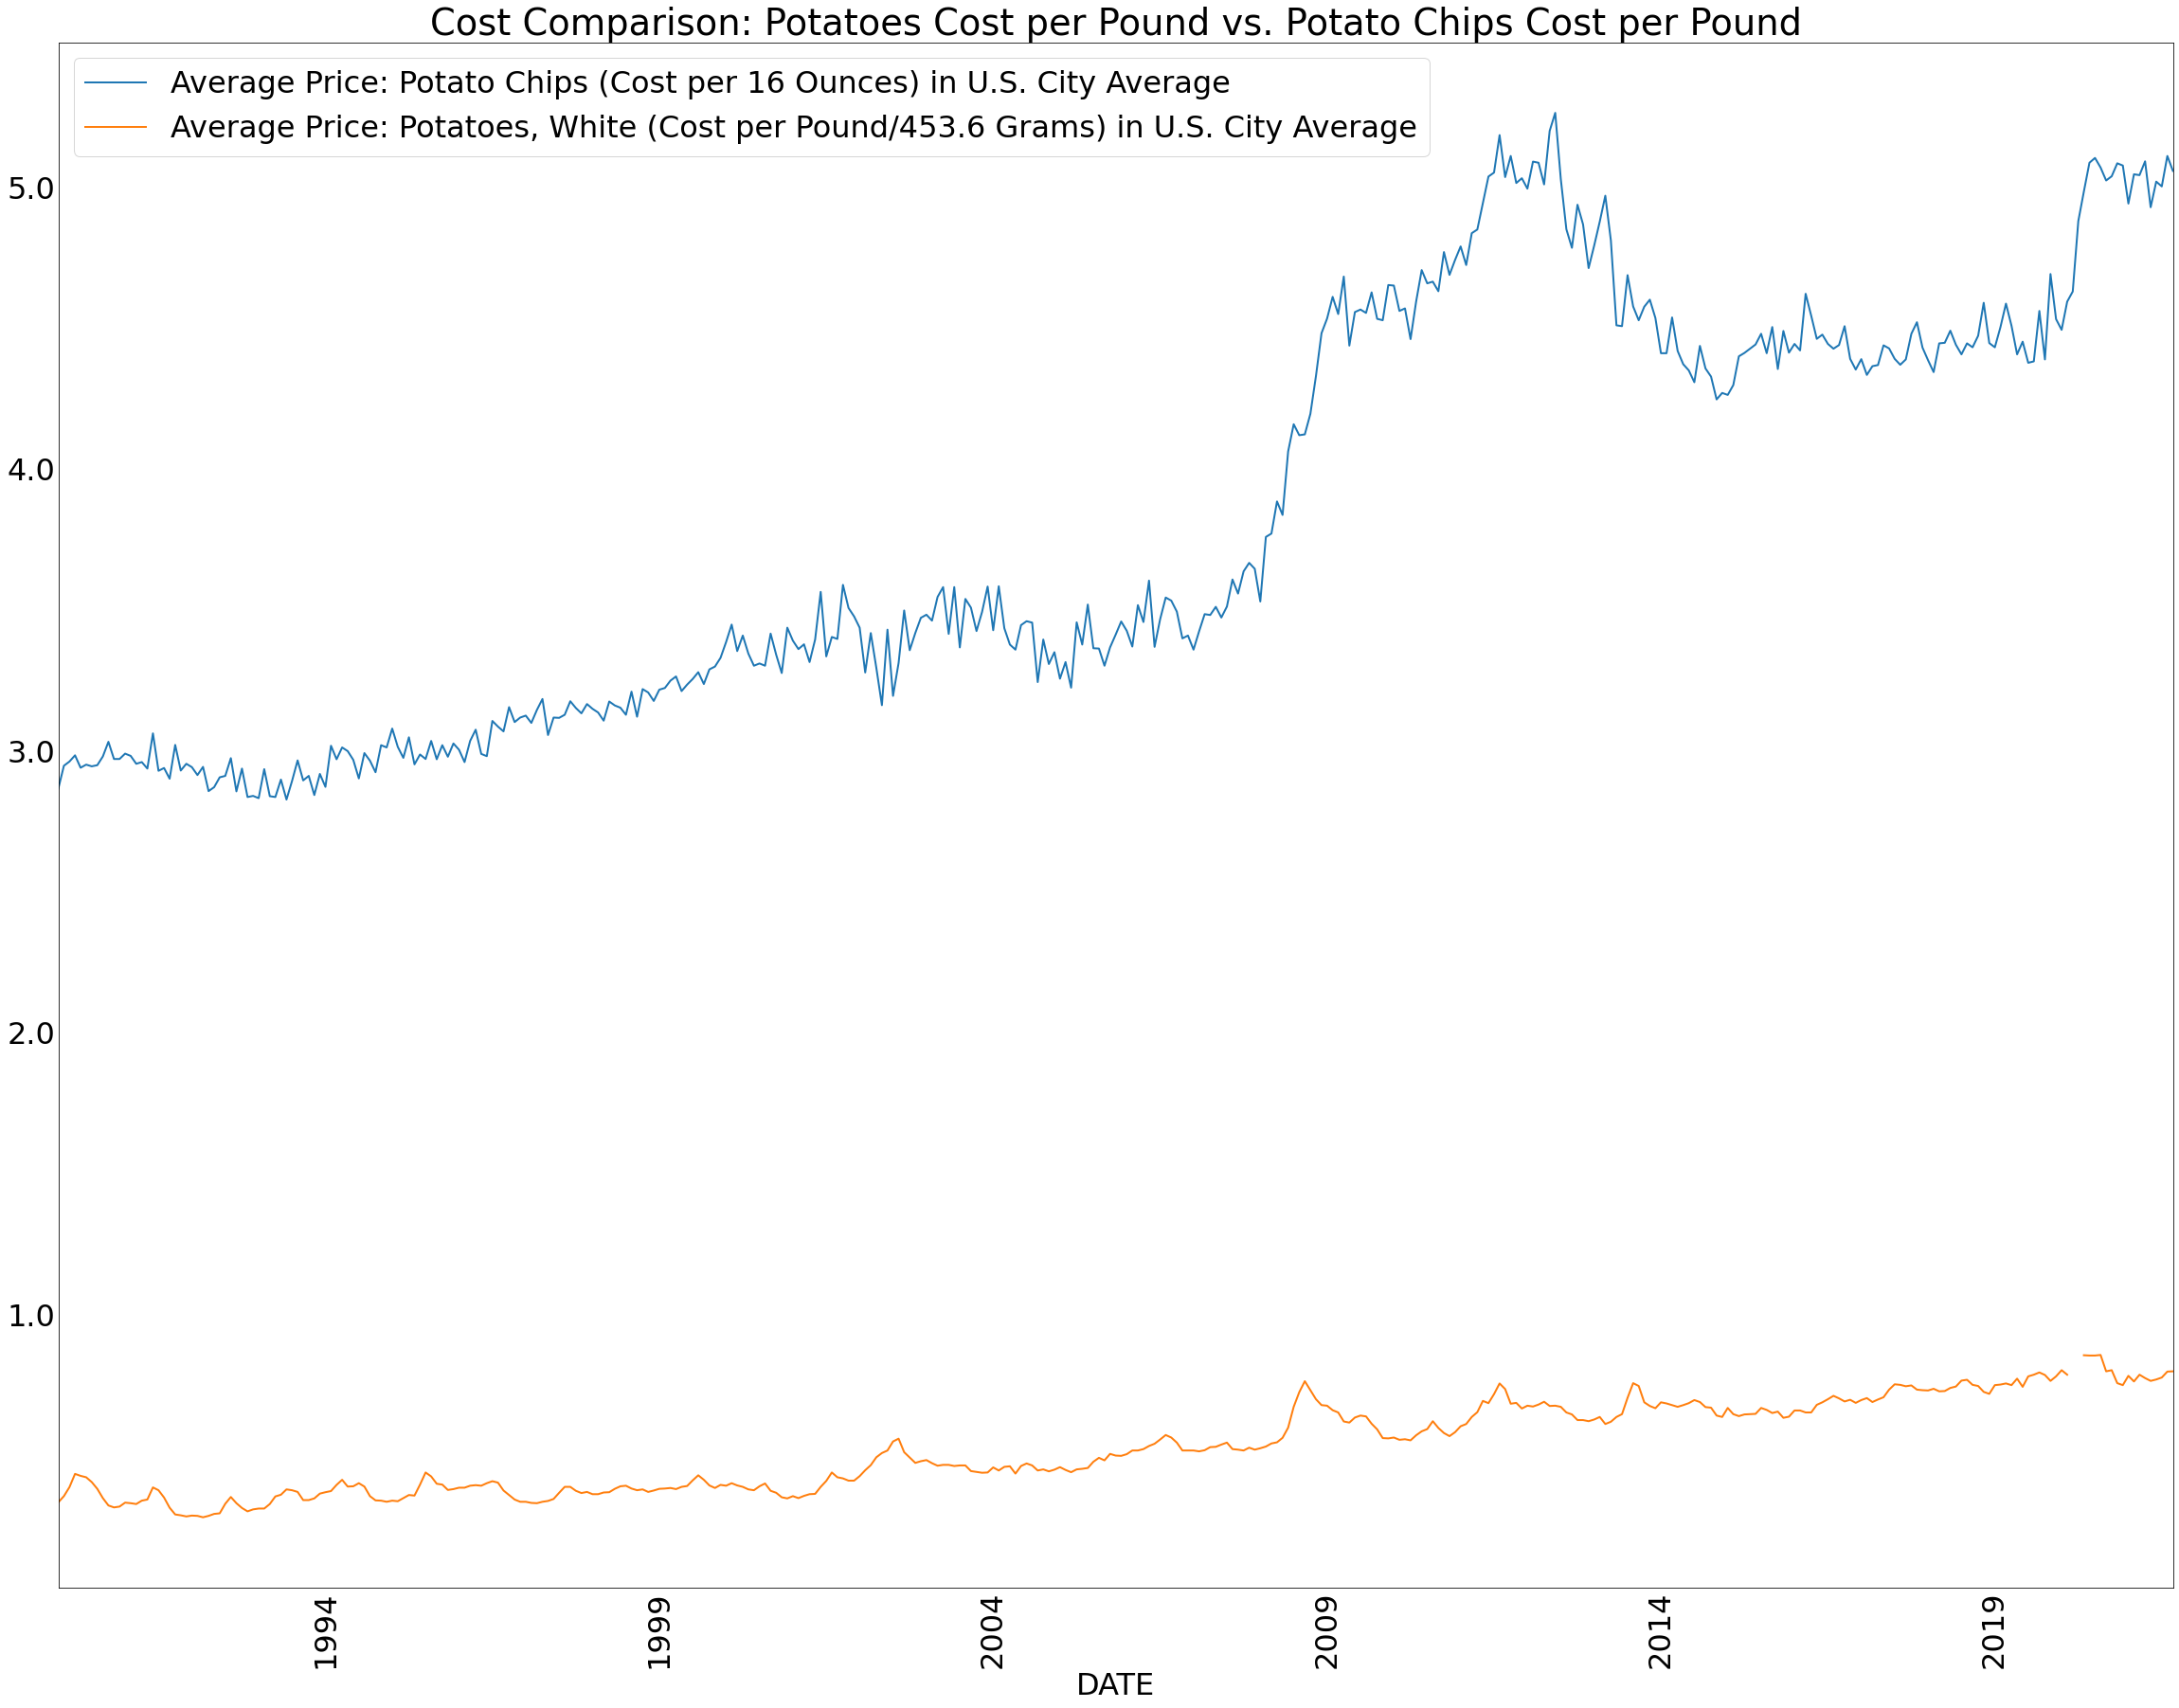

In [6]:
spud_params = ['Average Price: Potato Chips (Cost per 16 Ounces) in U.S. City Average',
          'Average Price: Potatoes, White (Cost per Pound/453.6 Grams) in U.S. City Average']

df = data[spud_params]

plot_lines(df = df.loc['1990-01-01':], 
           lw = 2, 
           pp = None,
          legend_columns = 1,        
          title = "Cost Comparison: Potatoes Cost per Pound vs. Potato Chips Cost per Pound")

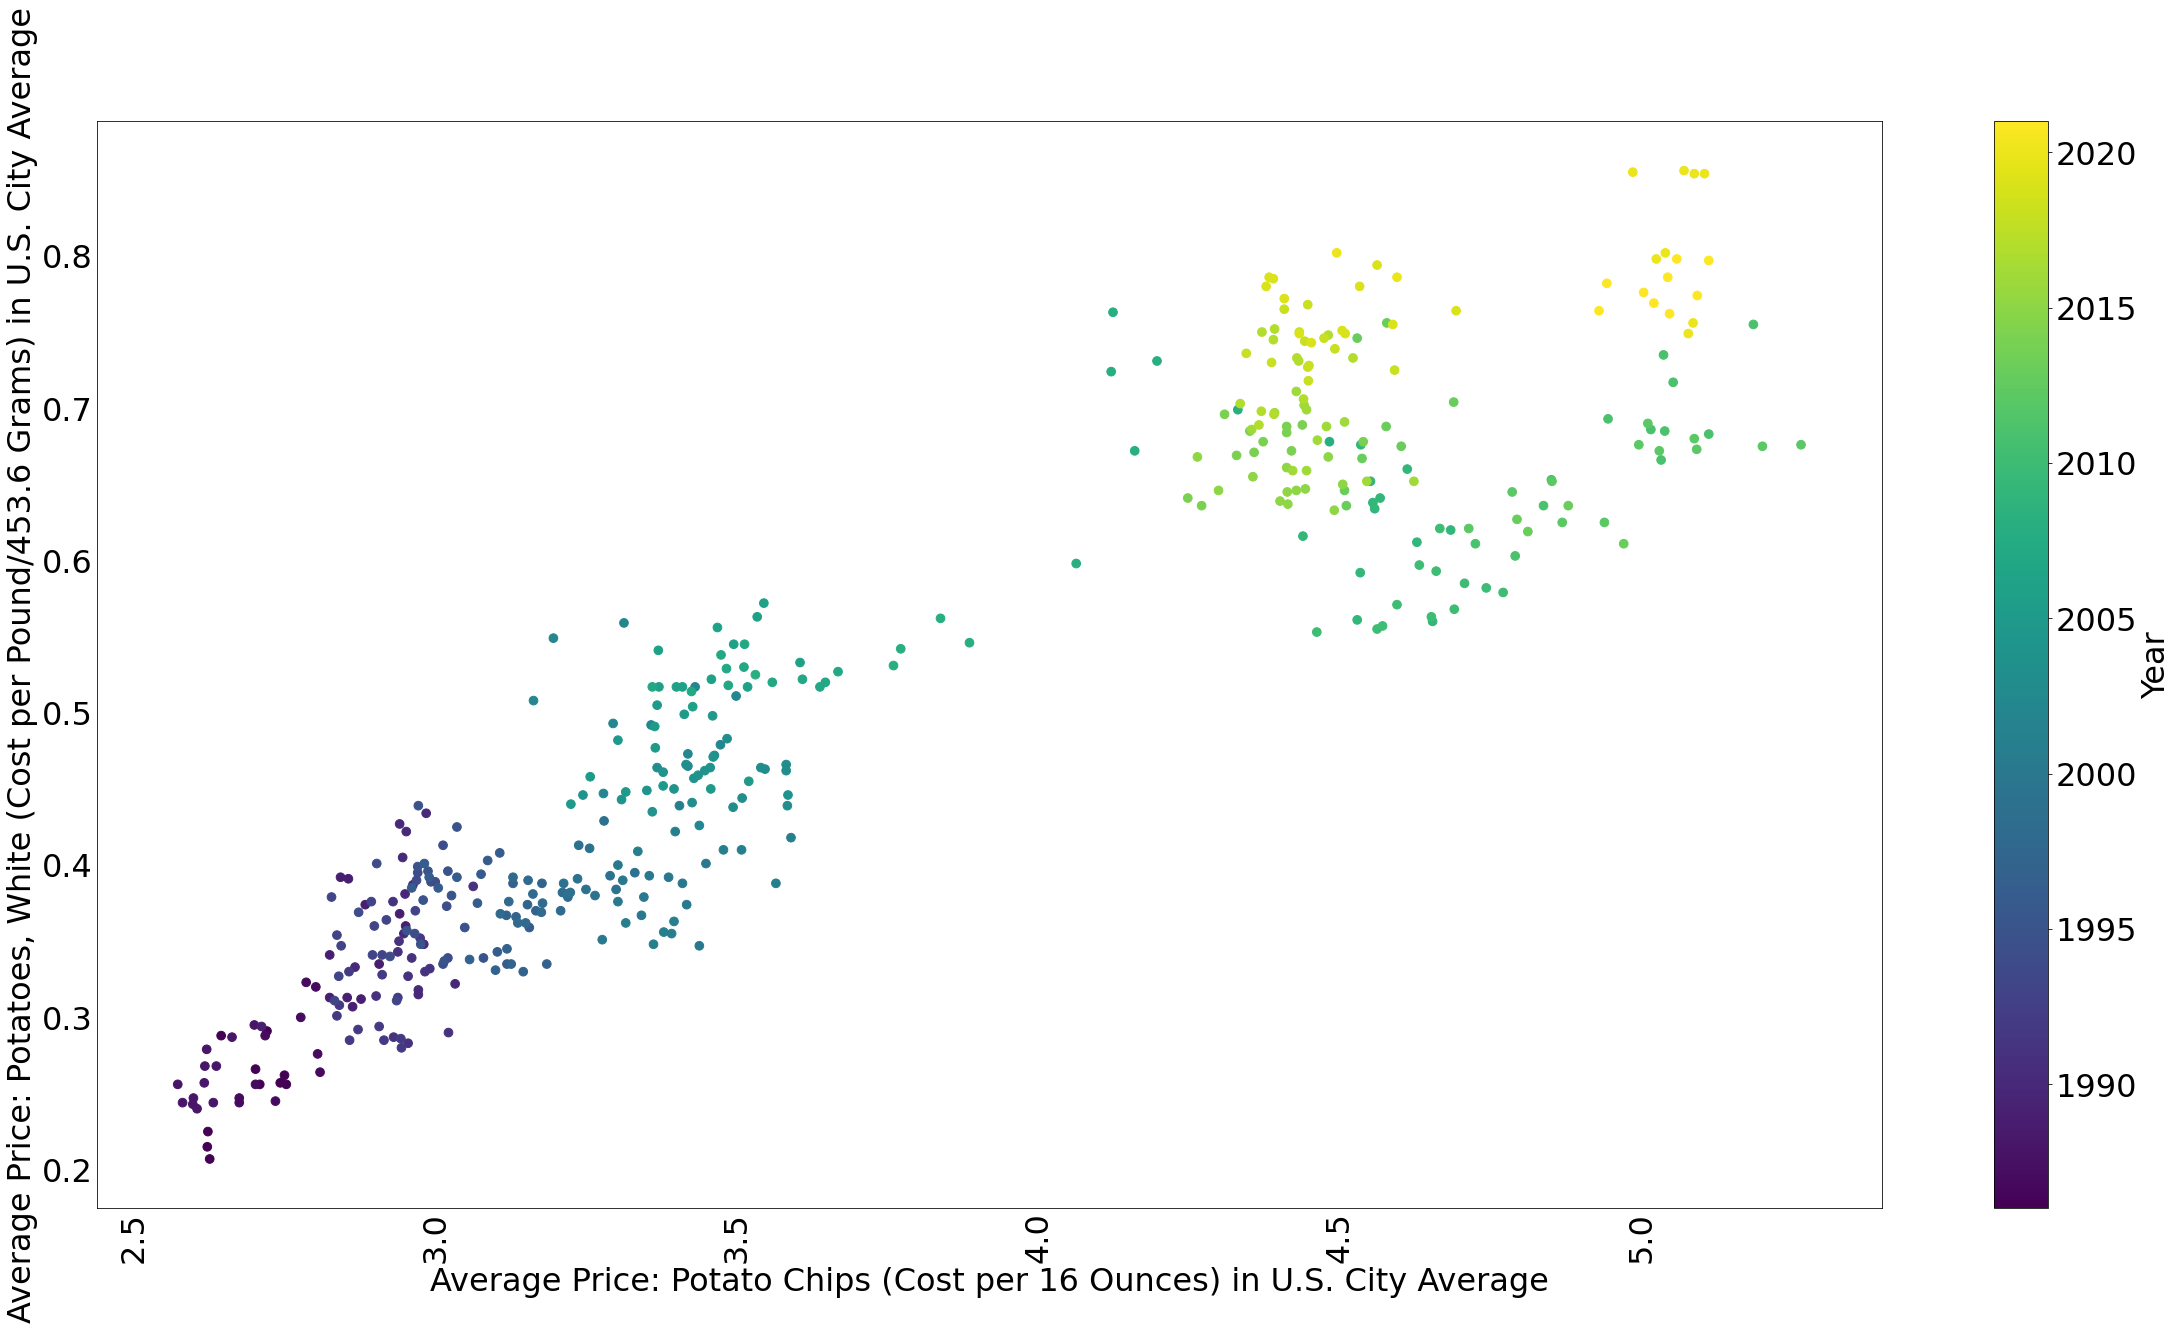

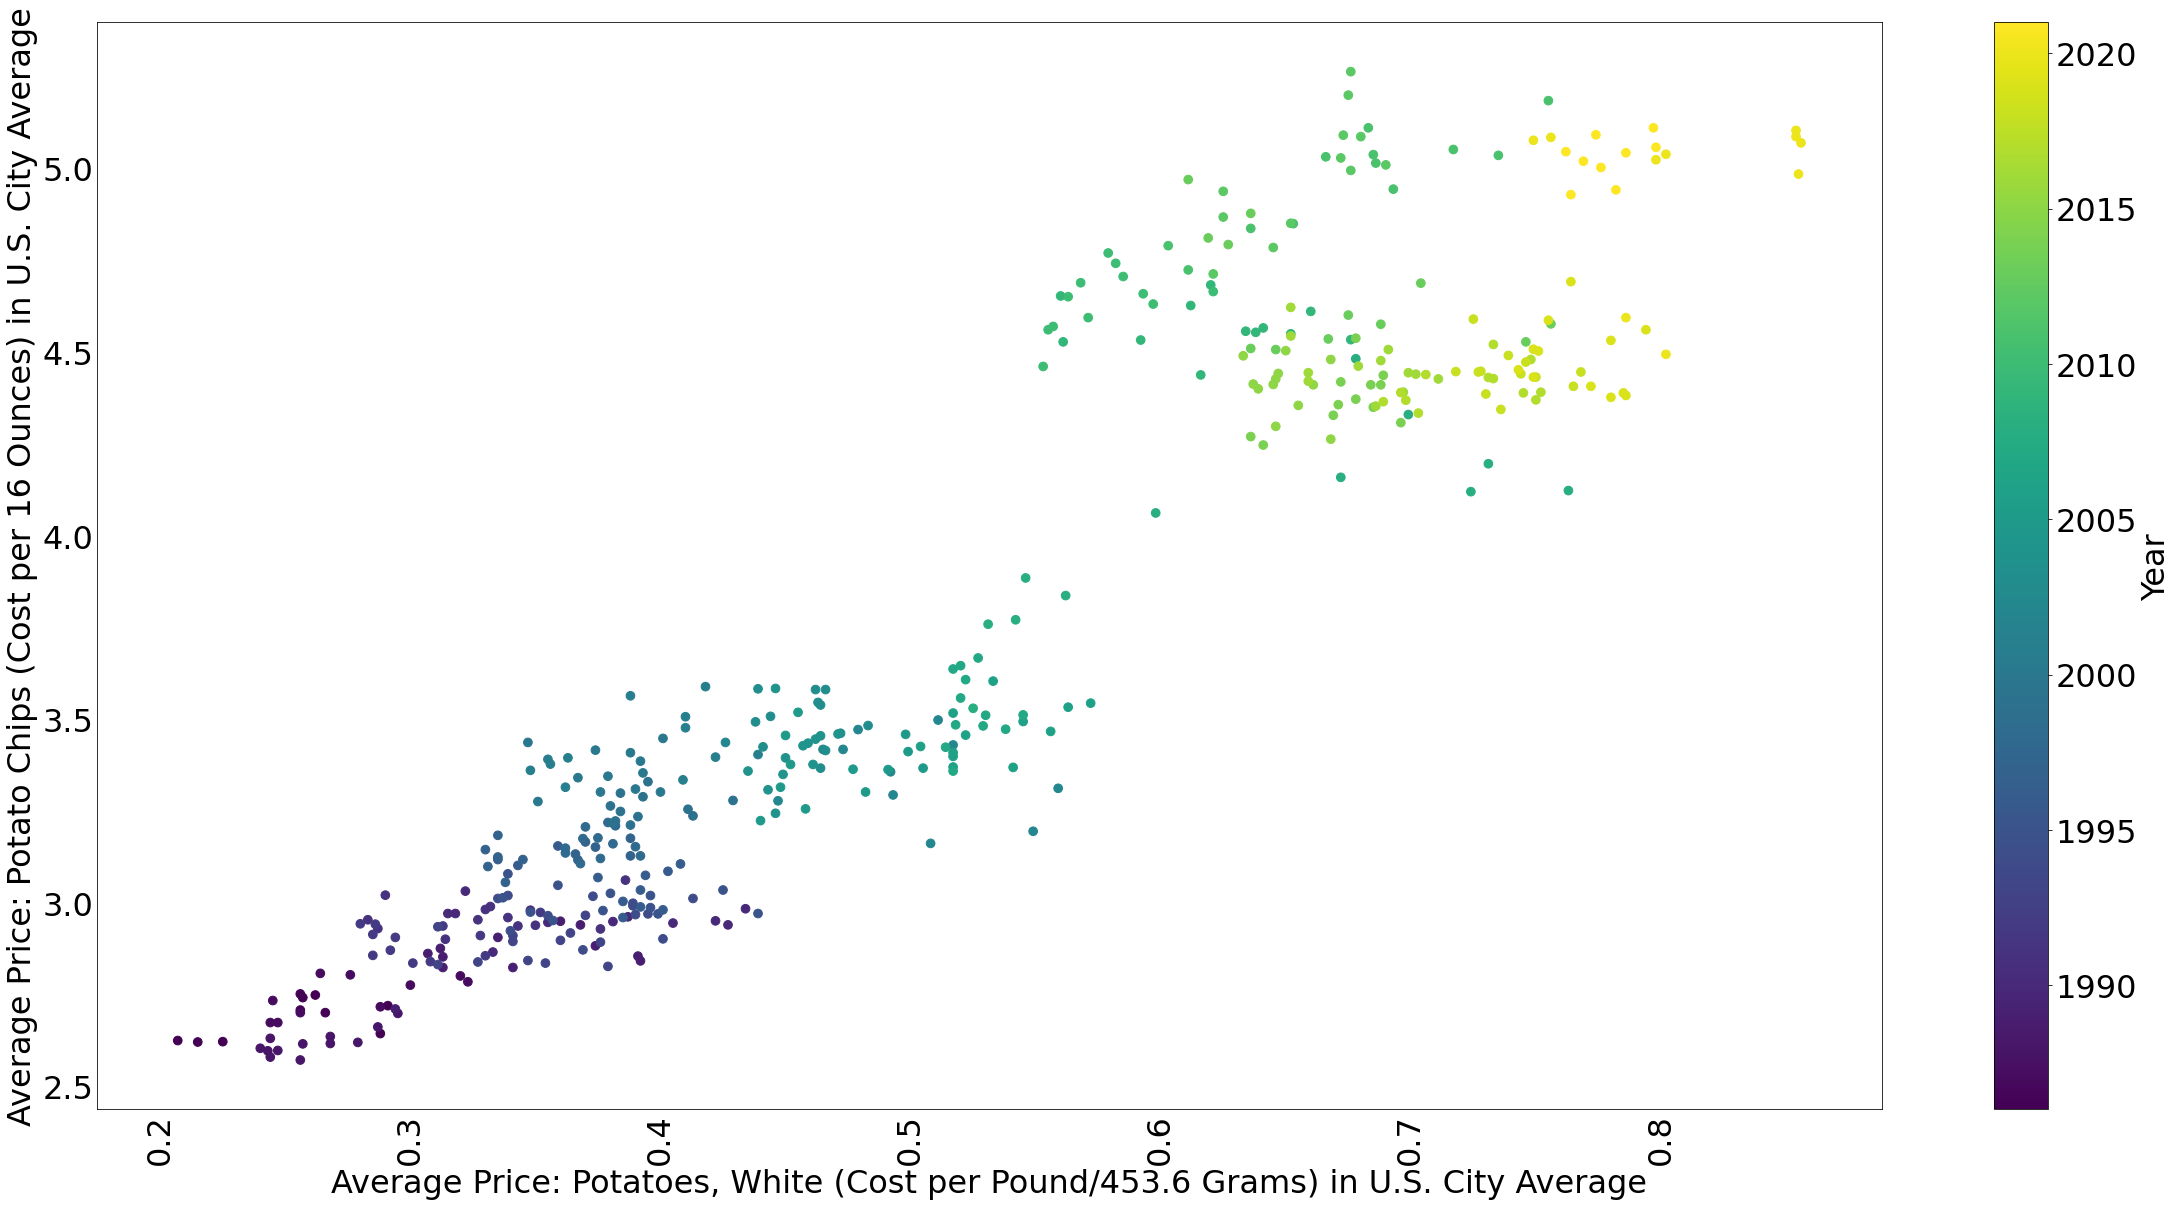

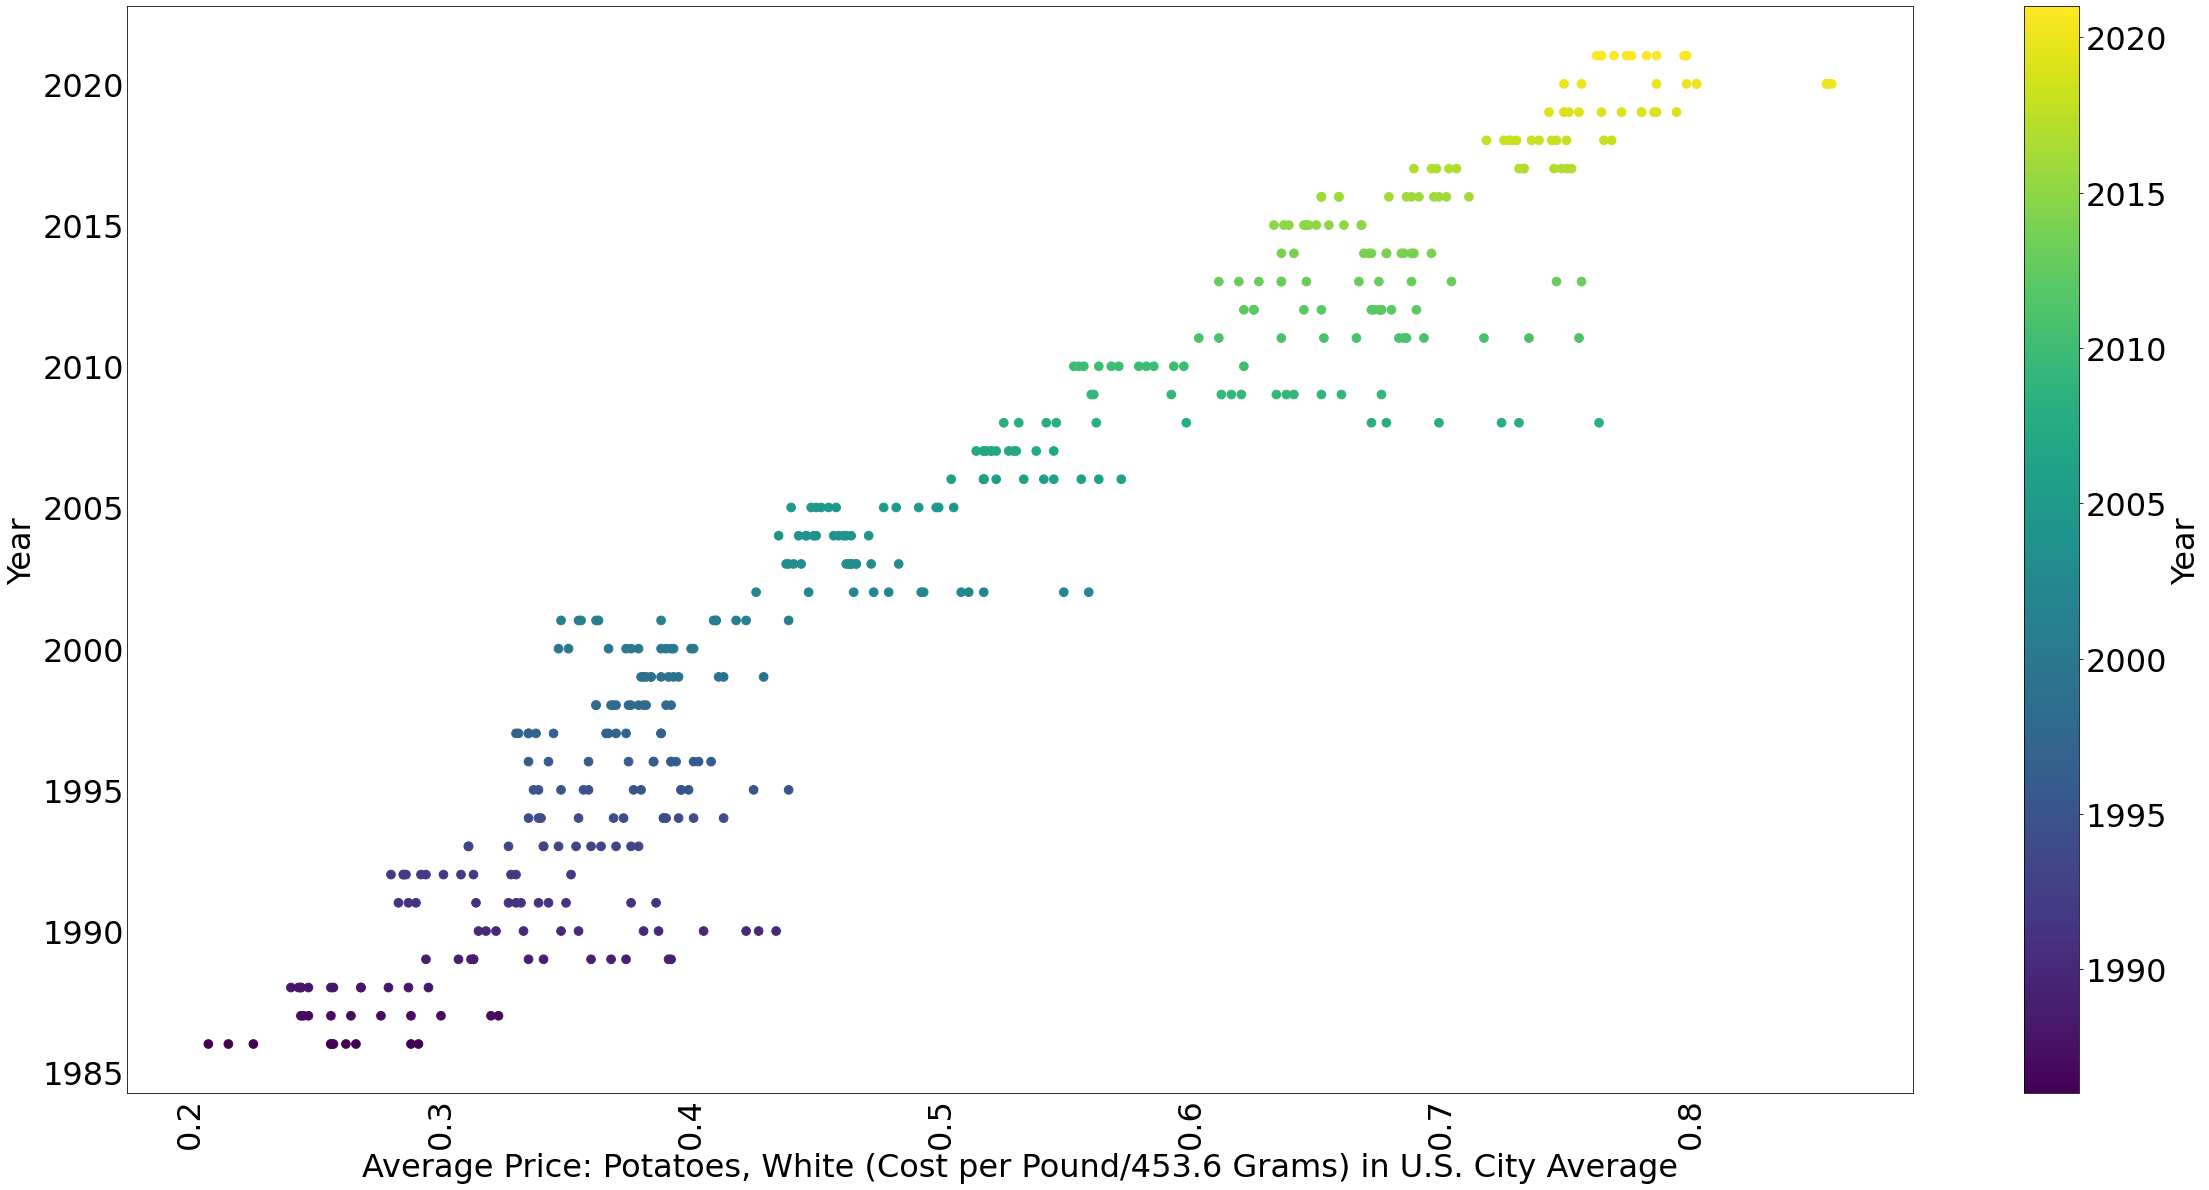

In [7]:
spud_params = ['Average Price: Potato Chips (Cost per 16 Ounces) in U.S. City Average',
          'Average Price: Potatoes, White (Cost per Pound/453.6 Grams) in U.S. City Average']
plot_ts_scatter(data[spud_params])

## Housing Starts by Type

The following graphs show the the number and type of new residential home construction ocurring over the last 60 years. The last 

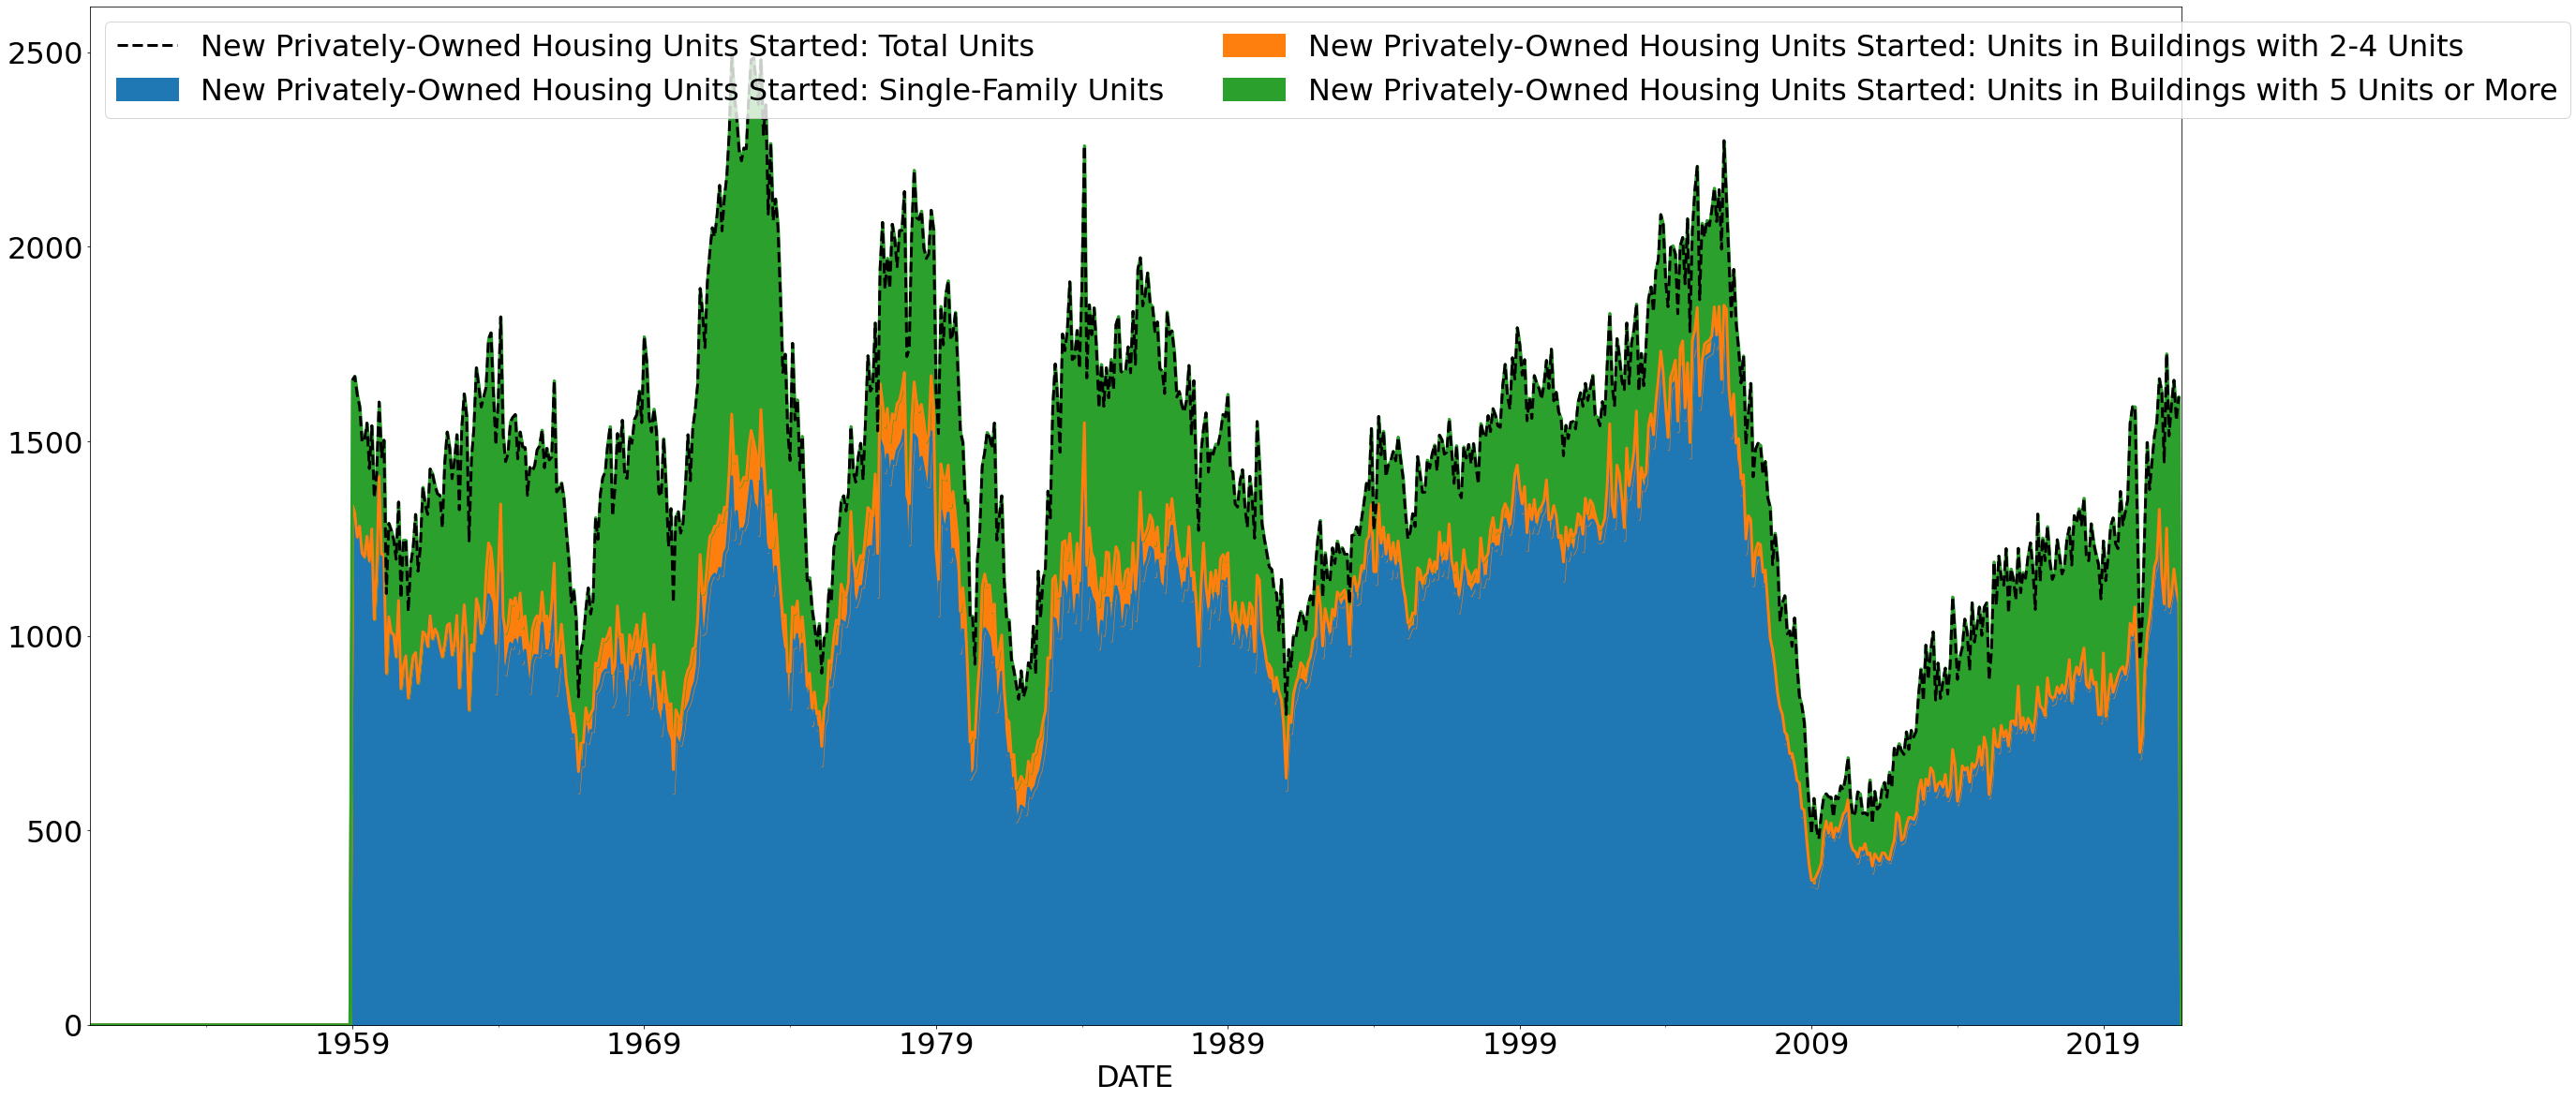

In [8]:
housing_params =['New Privately-Owned Housing Units Started: Single-Family Units',
               'New Privately-Owned Housing Units Started: Units in Buildings with 2-4 Units',
              'New Privately-Owned Housing Units Started: Units in Buildings with 5 Units or More']

plot_stacked_lines(
    data, 
    housing_params, 
    lw = 3, 
    total_var = "New Privately-Owned Housing Units Started: Total Units"
)

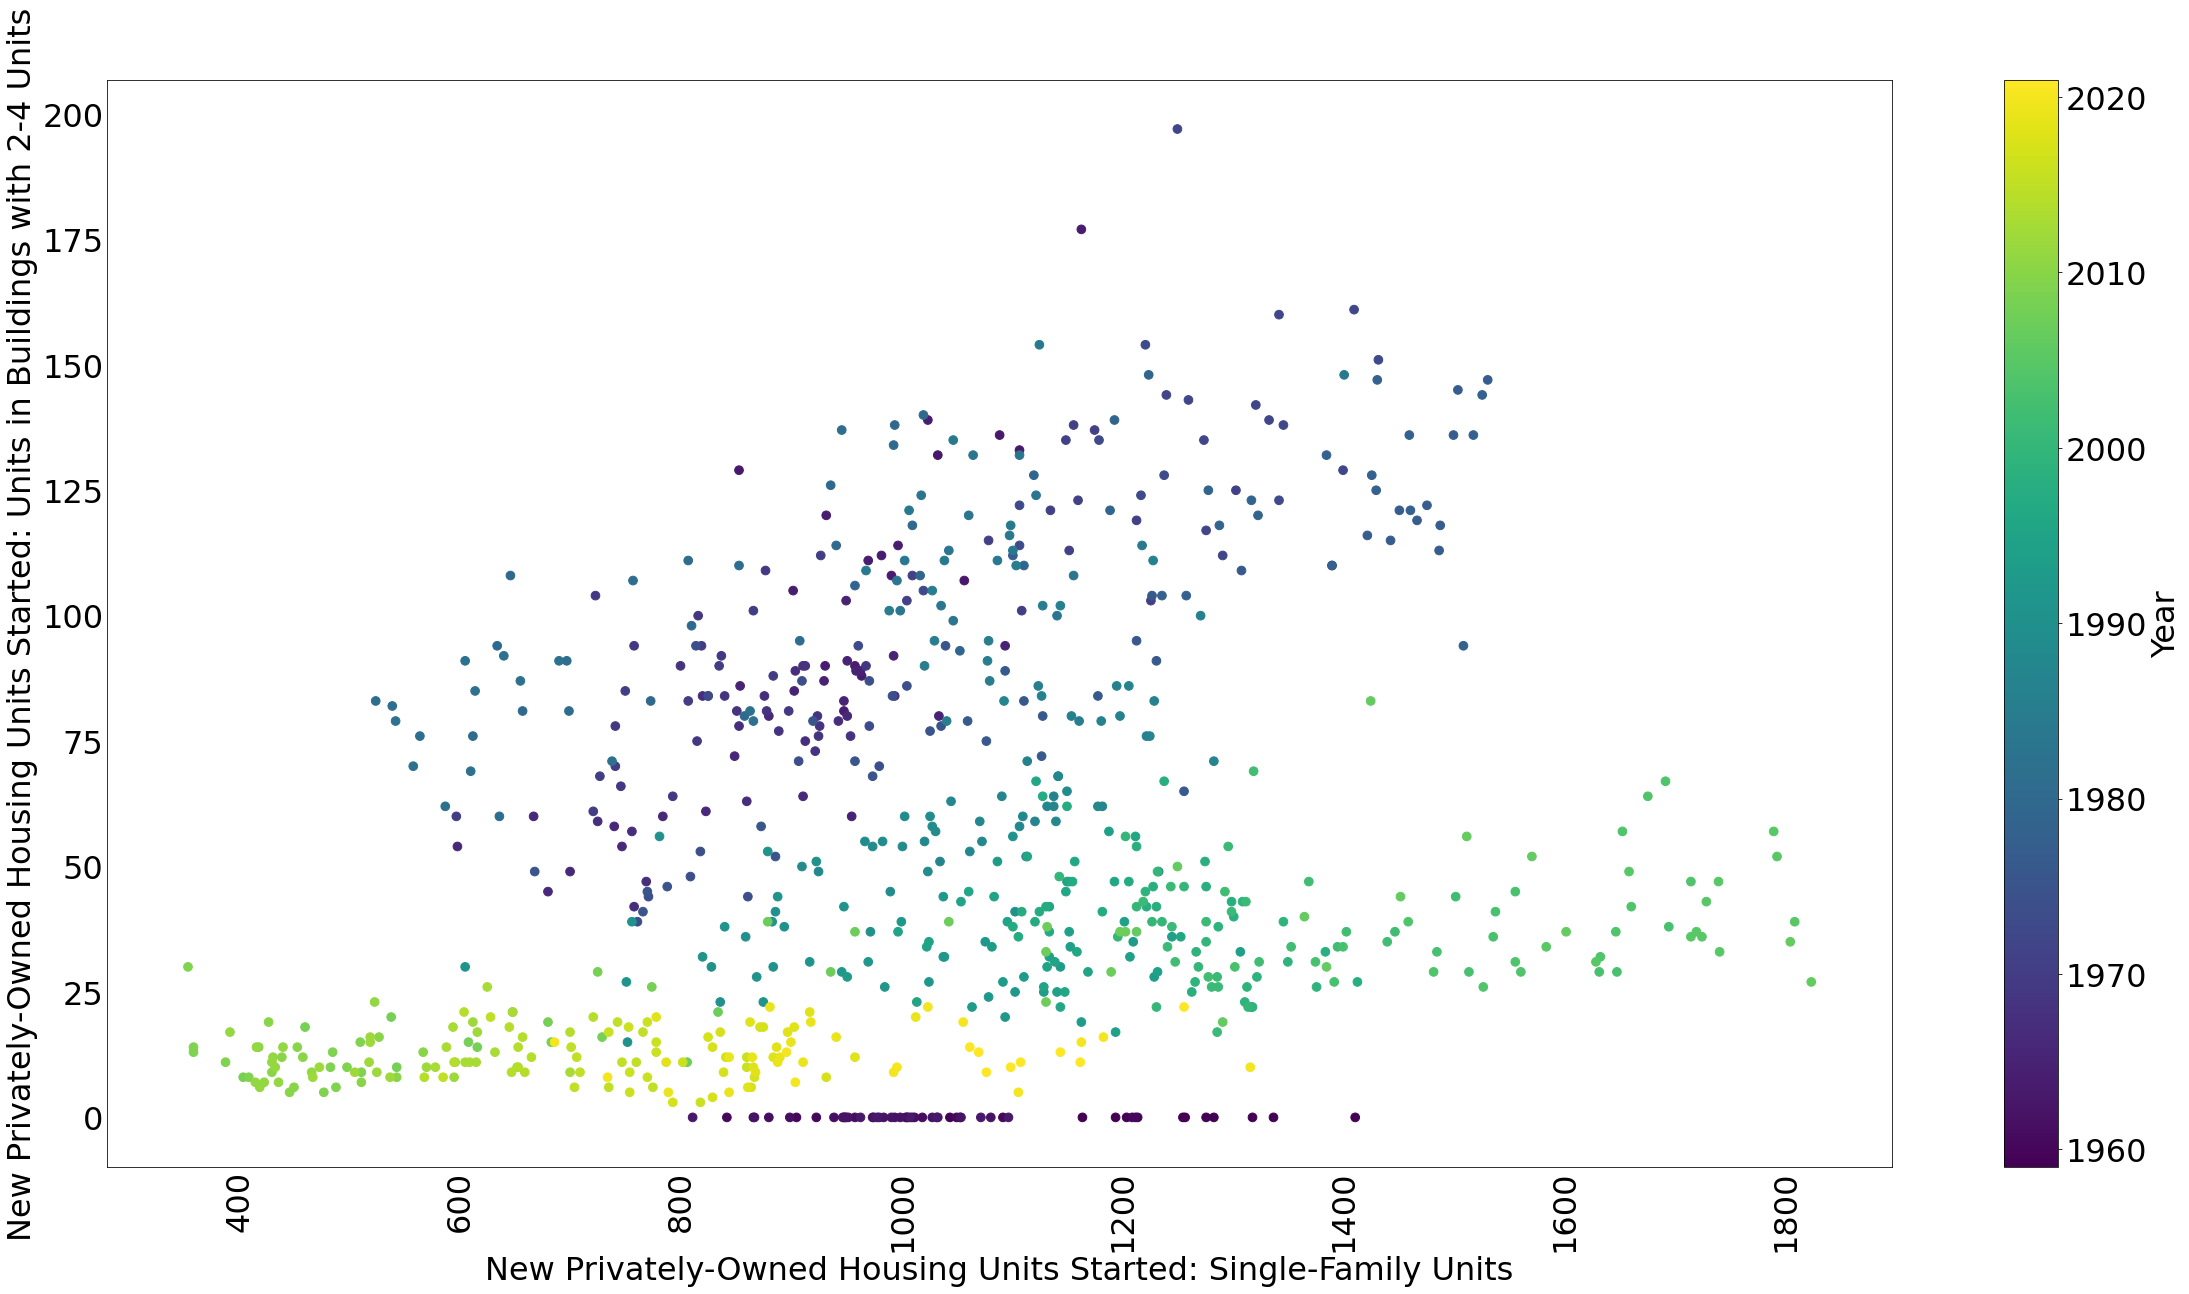

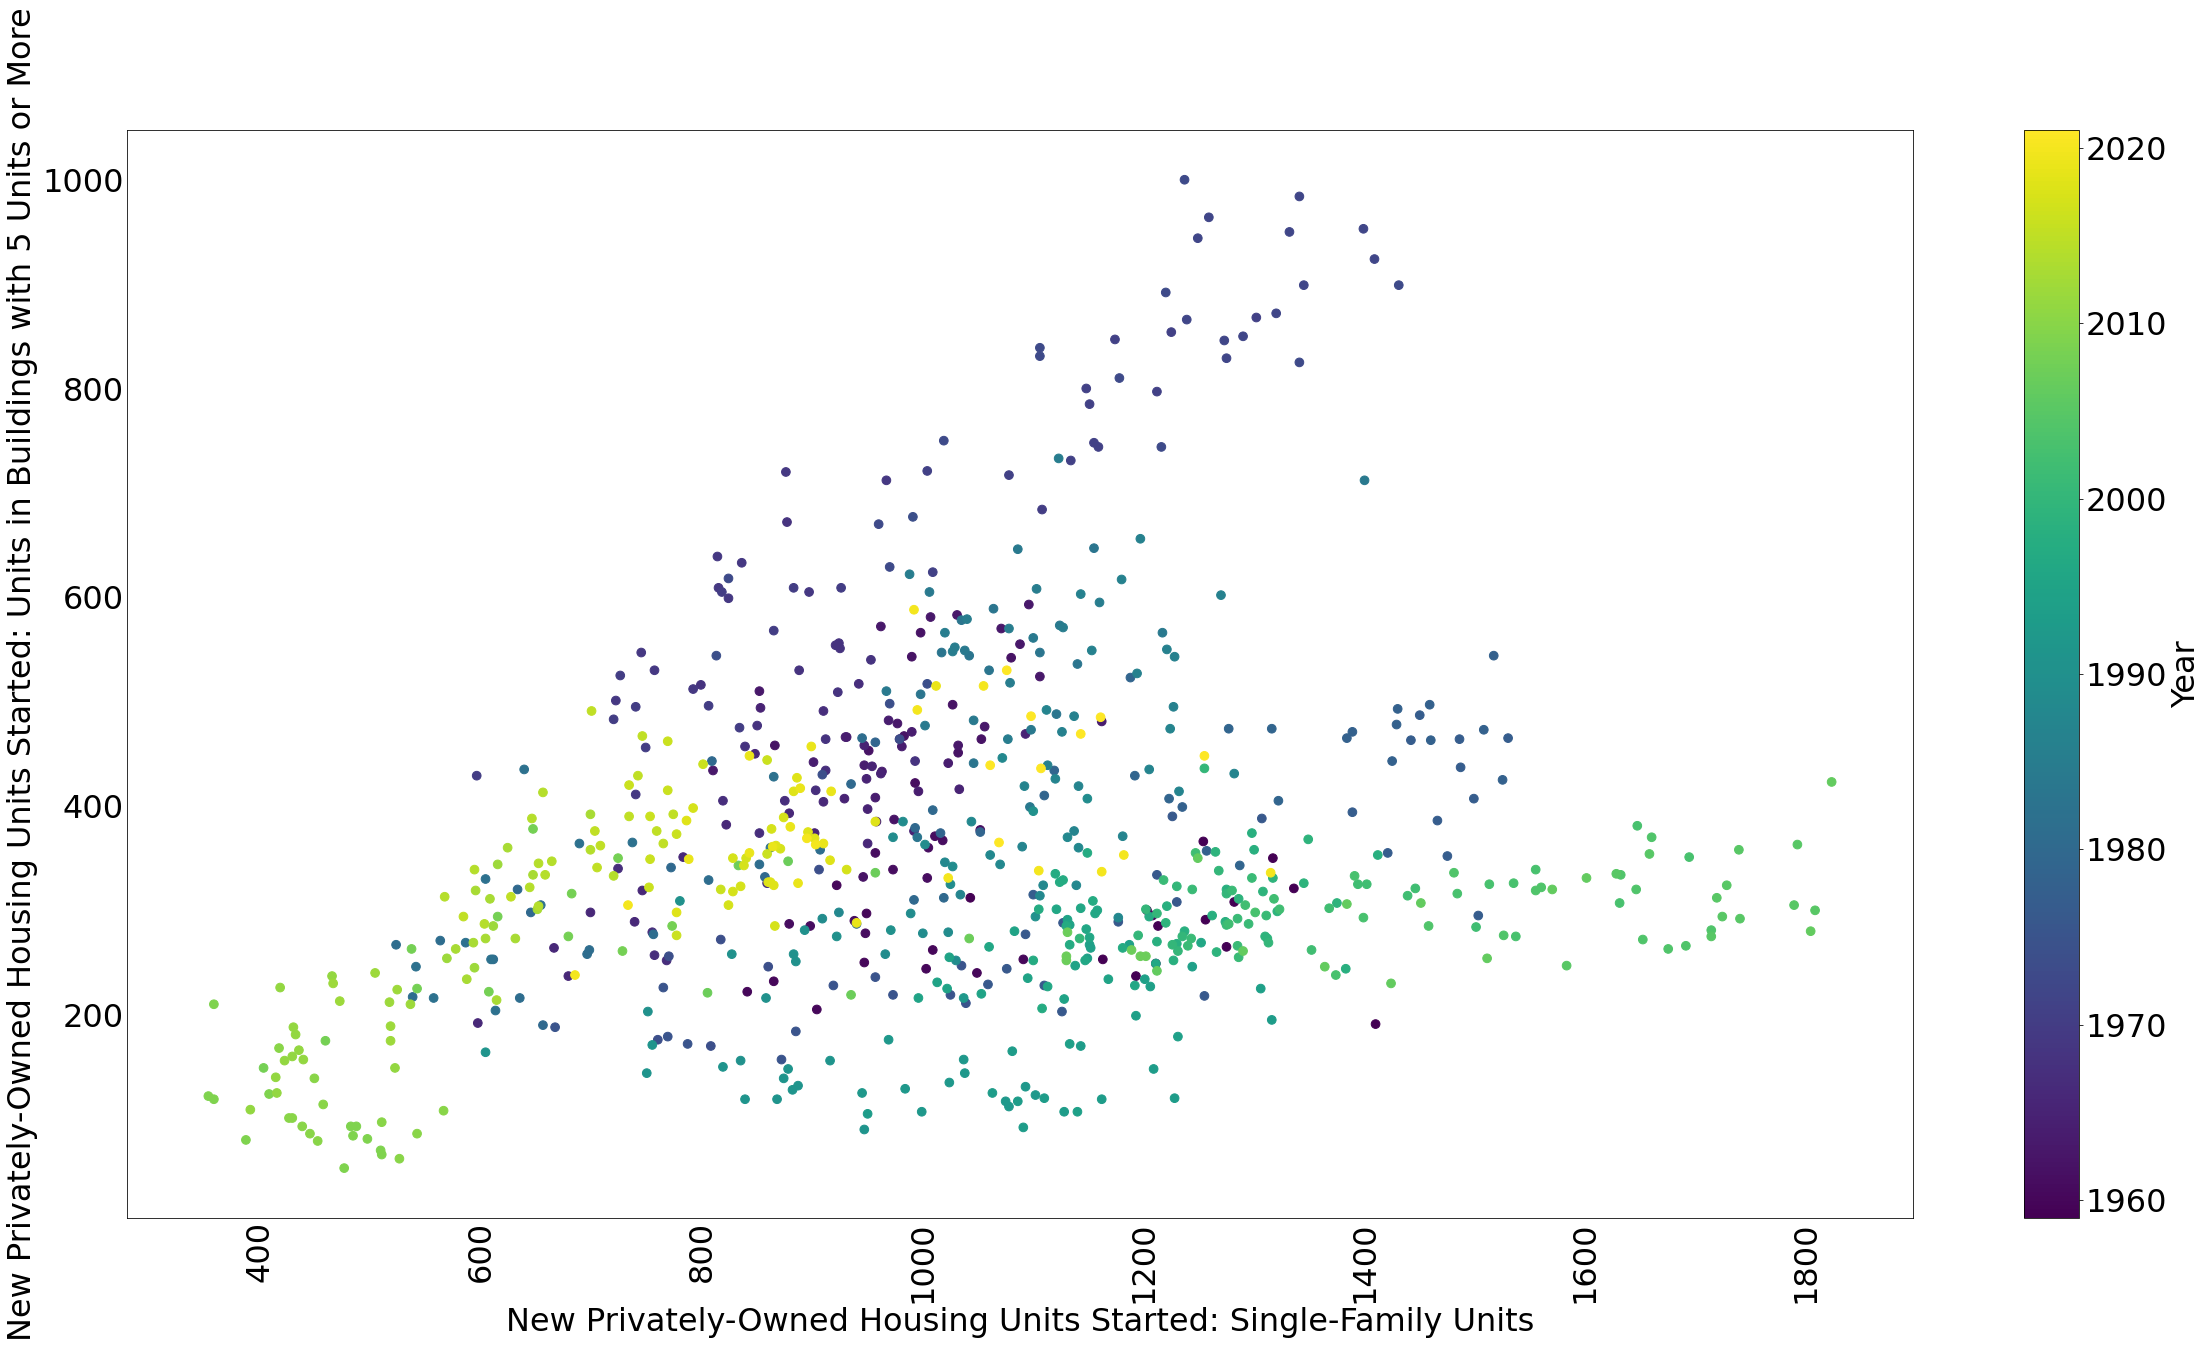

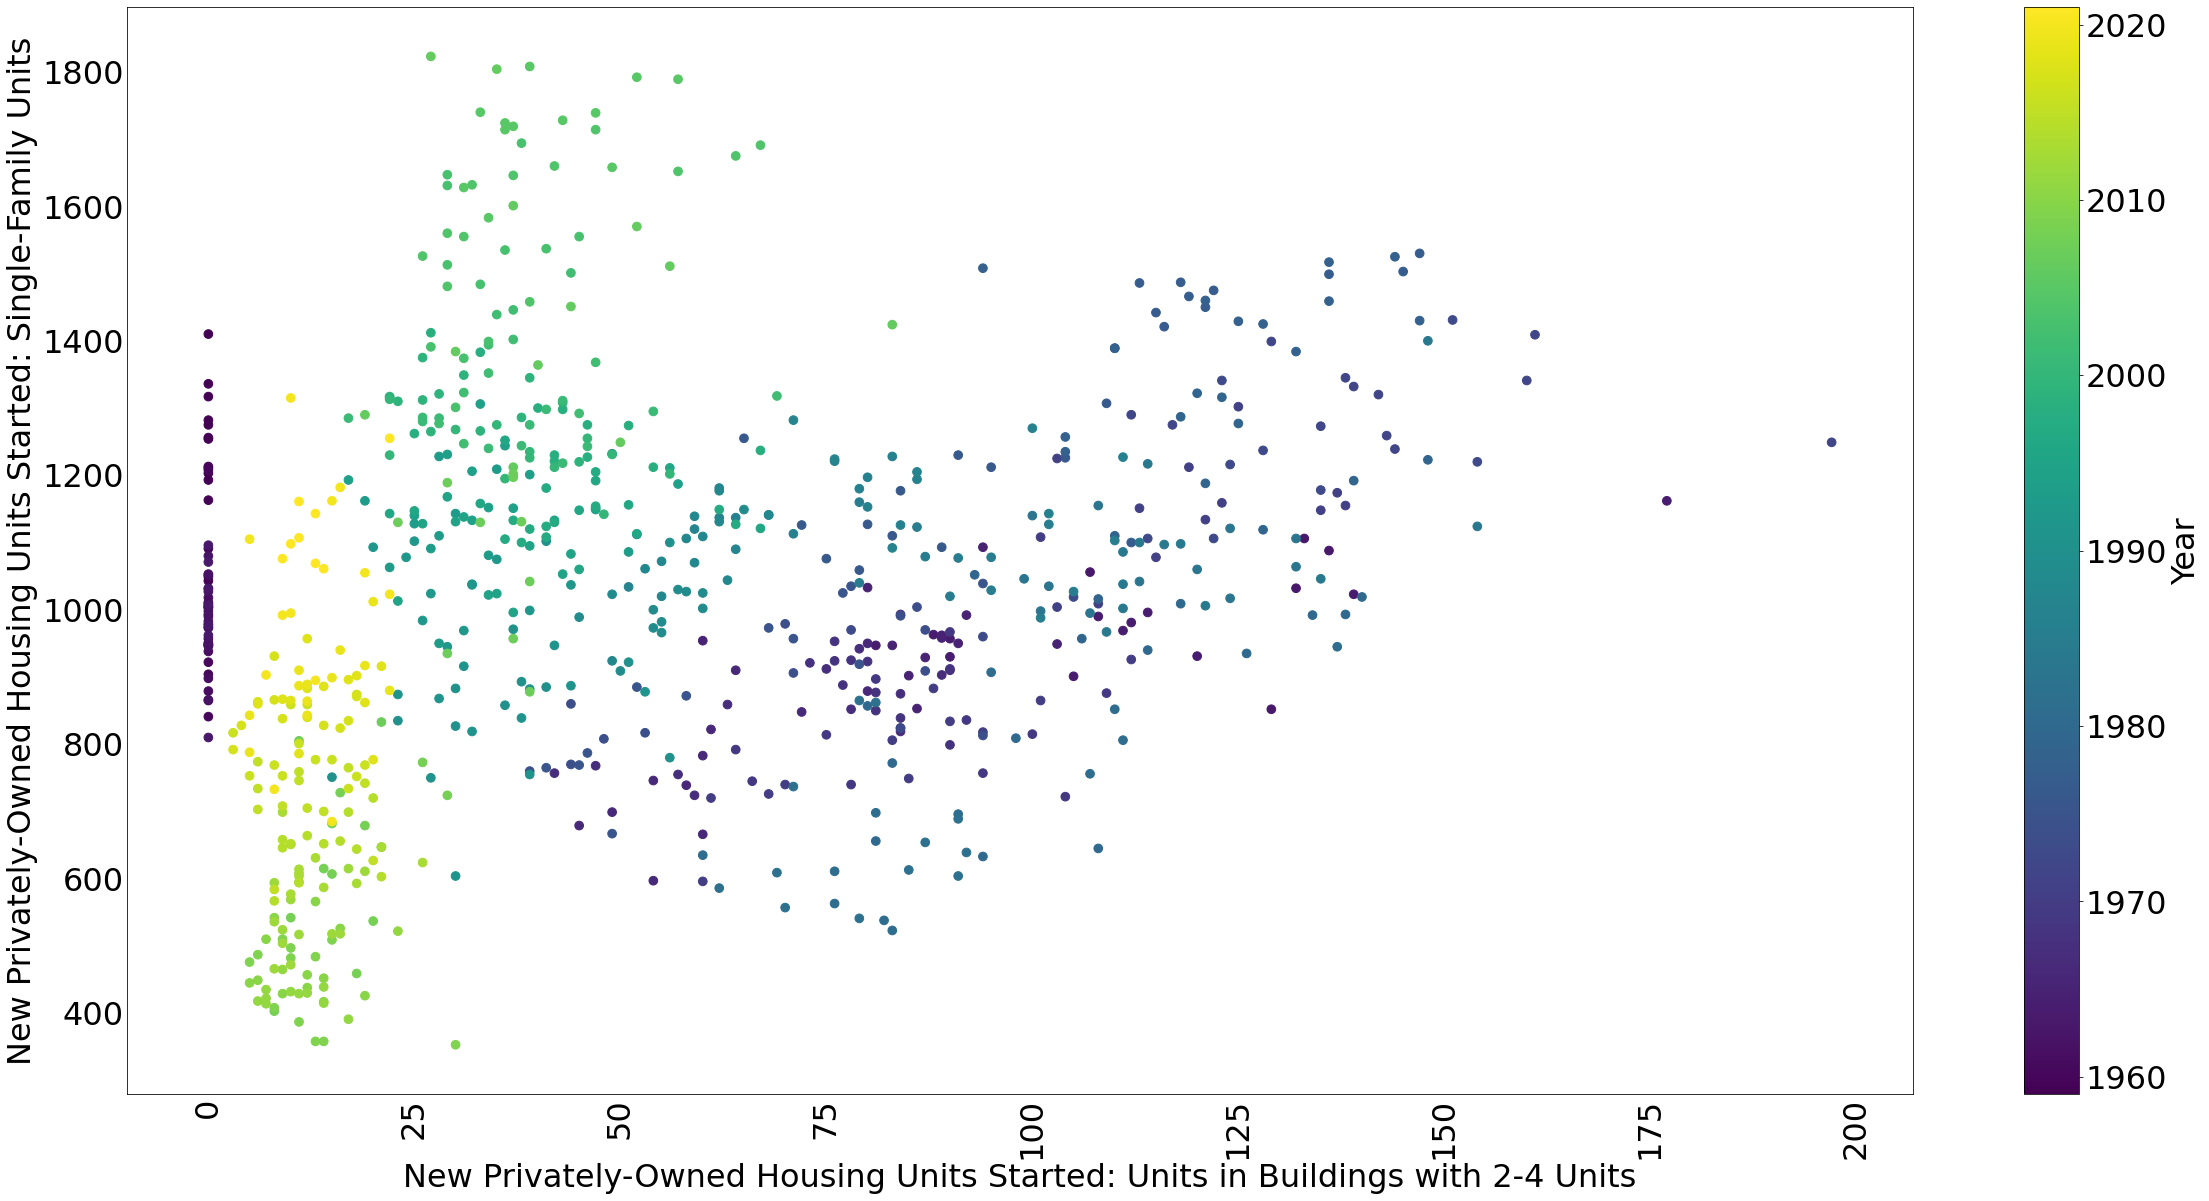

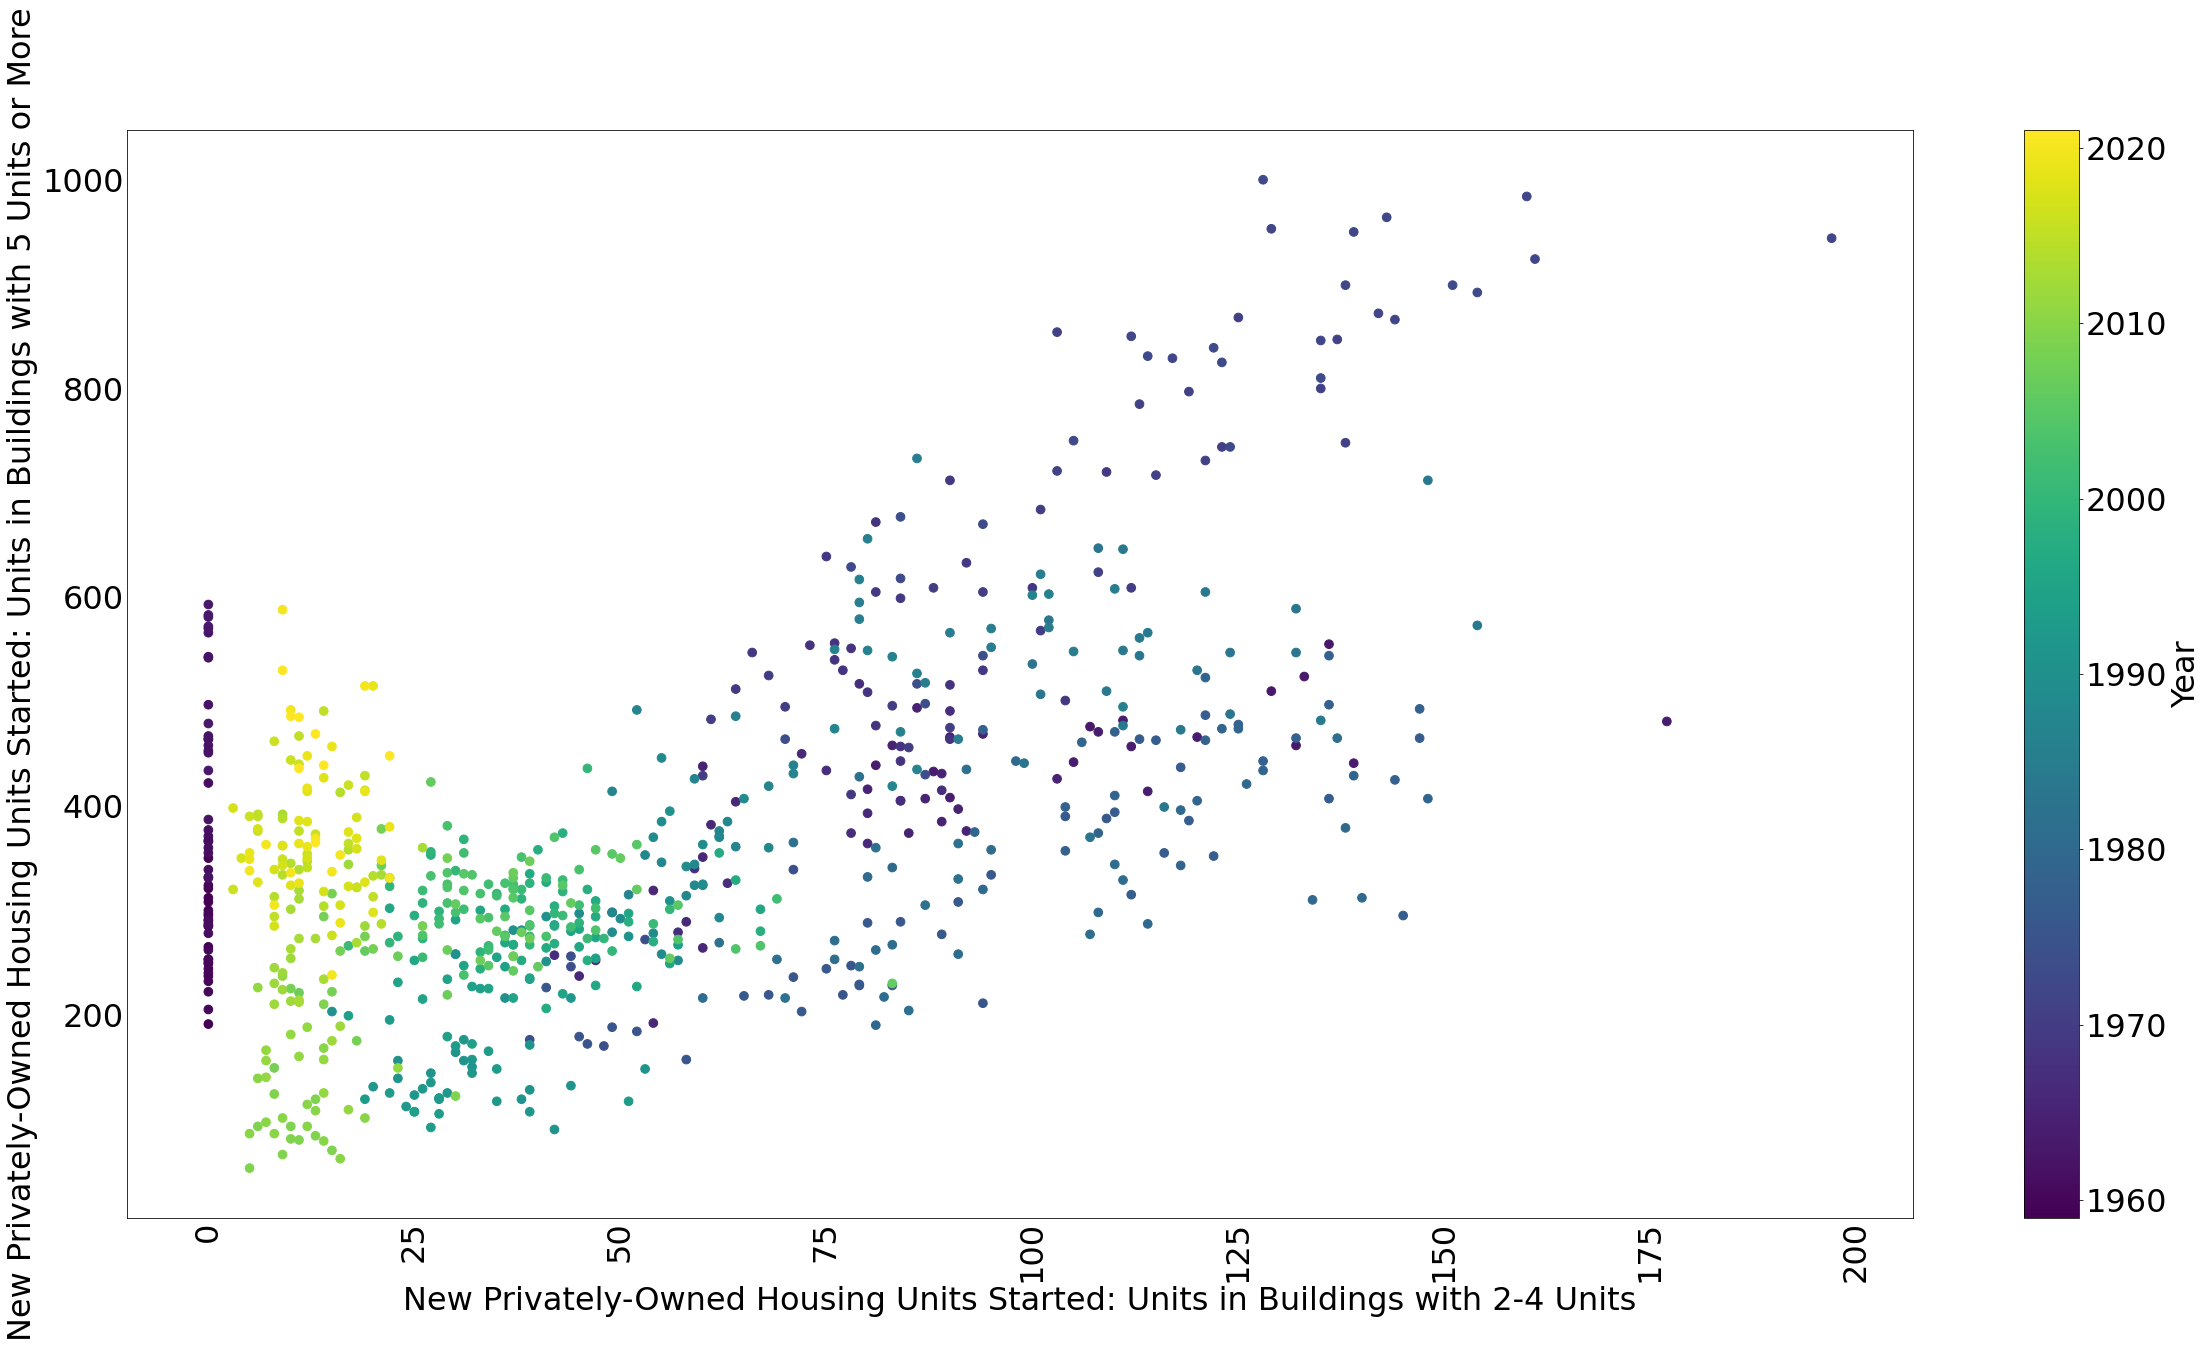

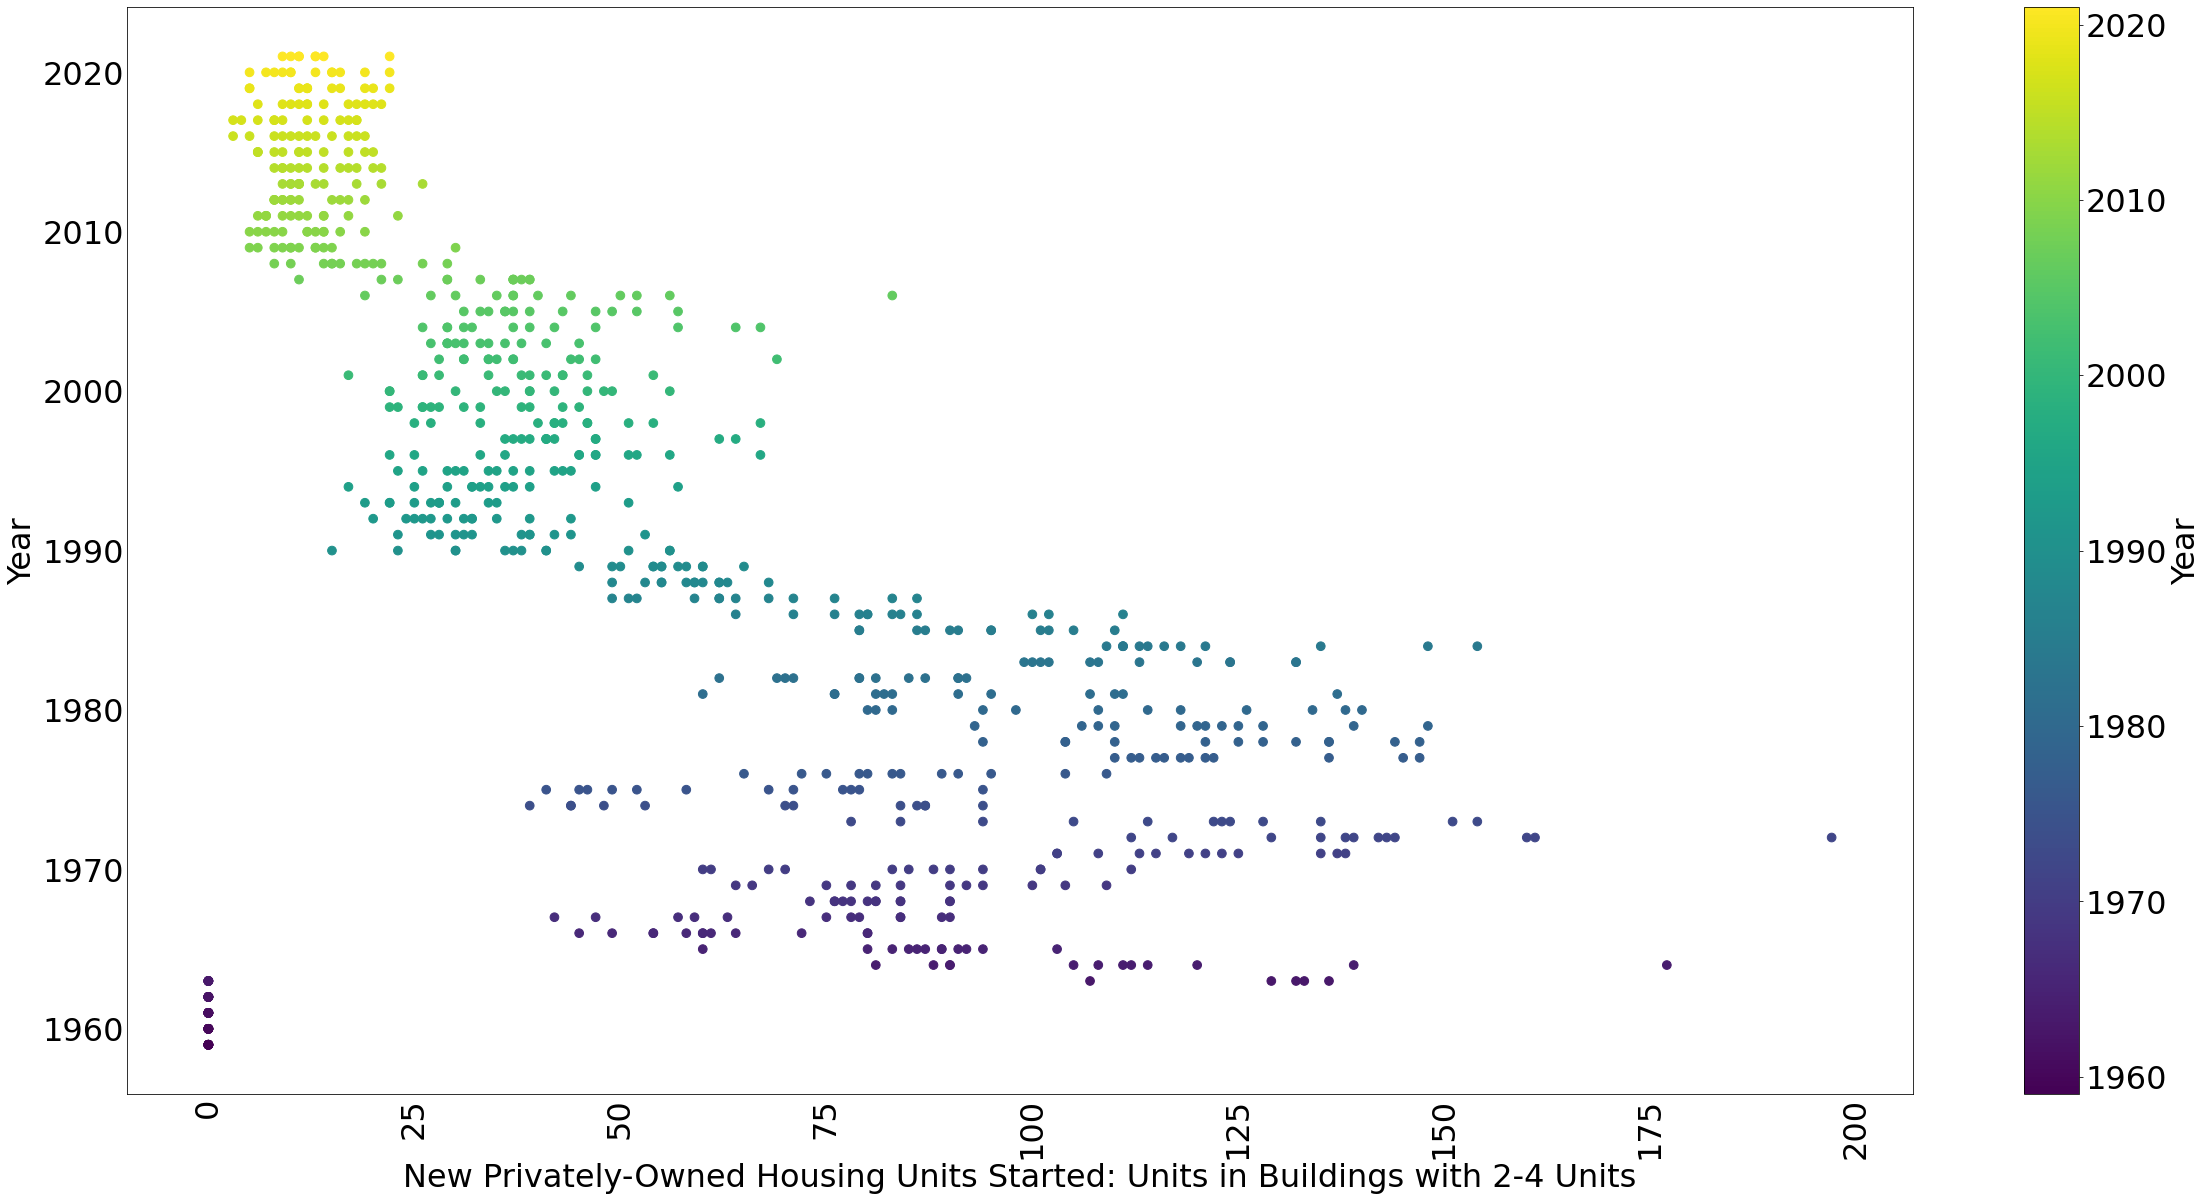

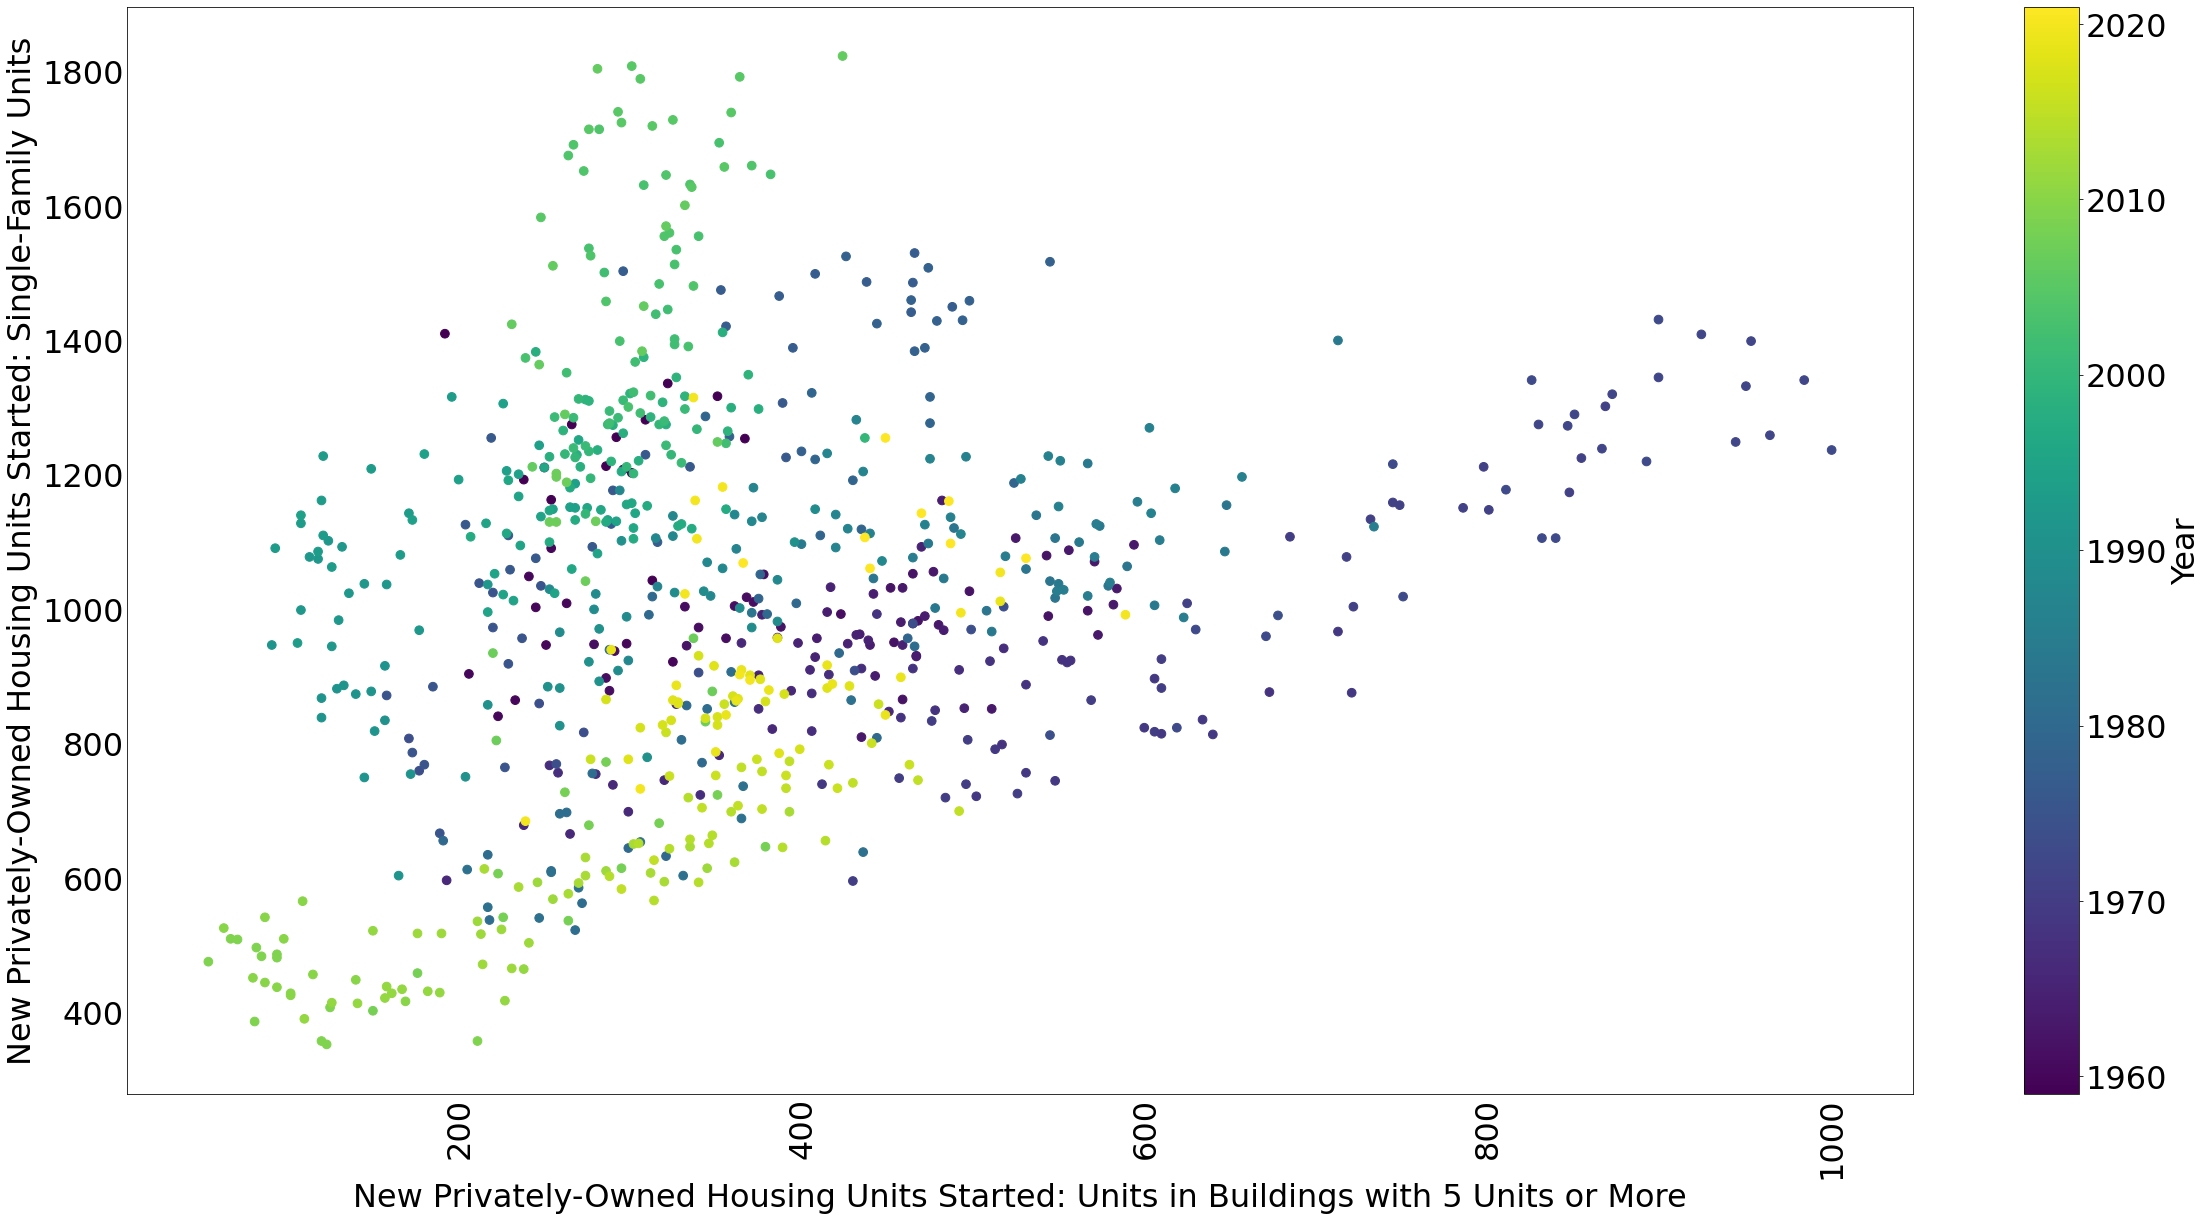

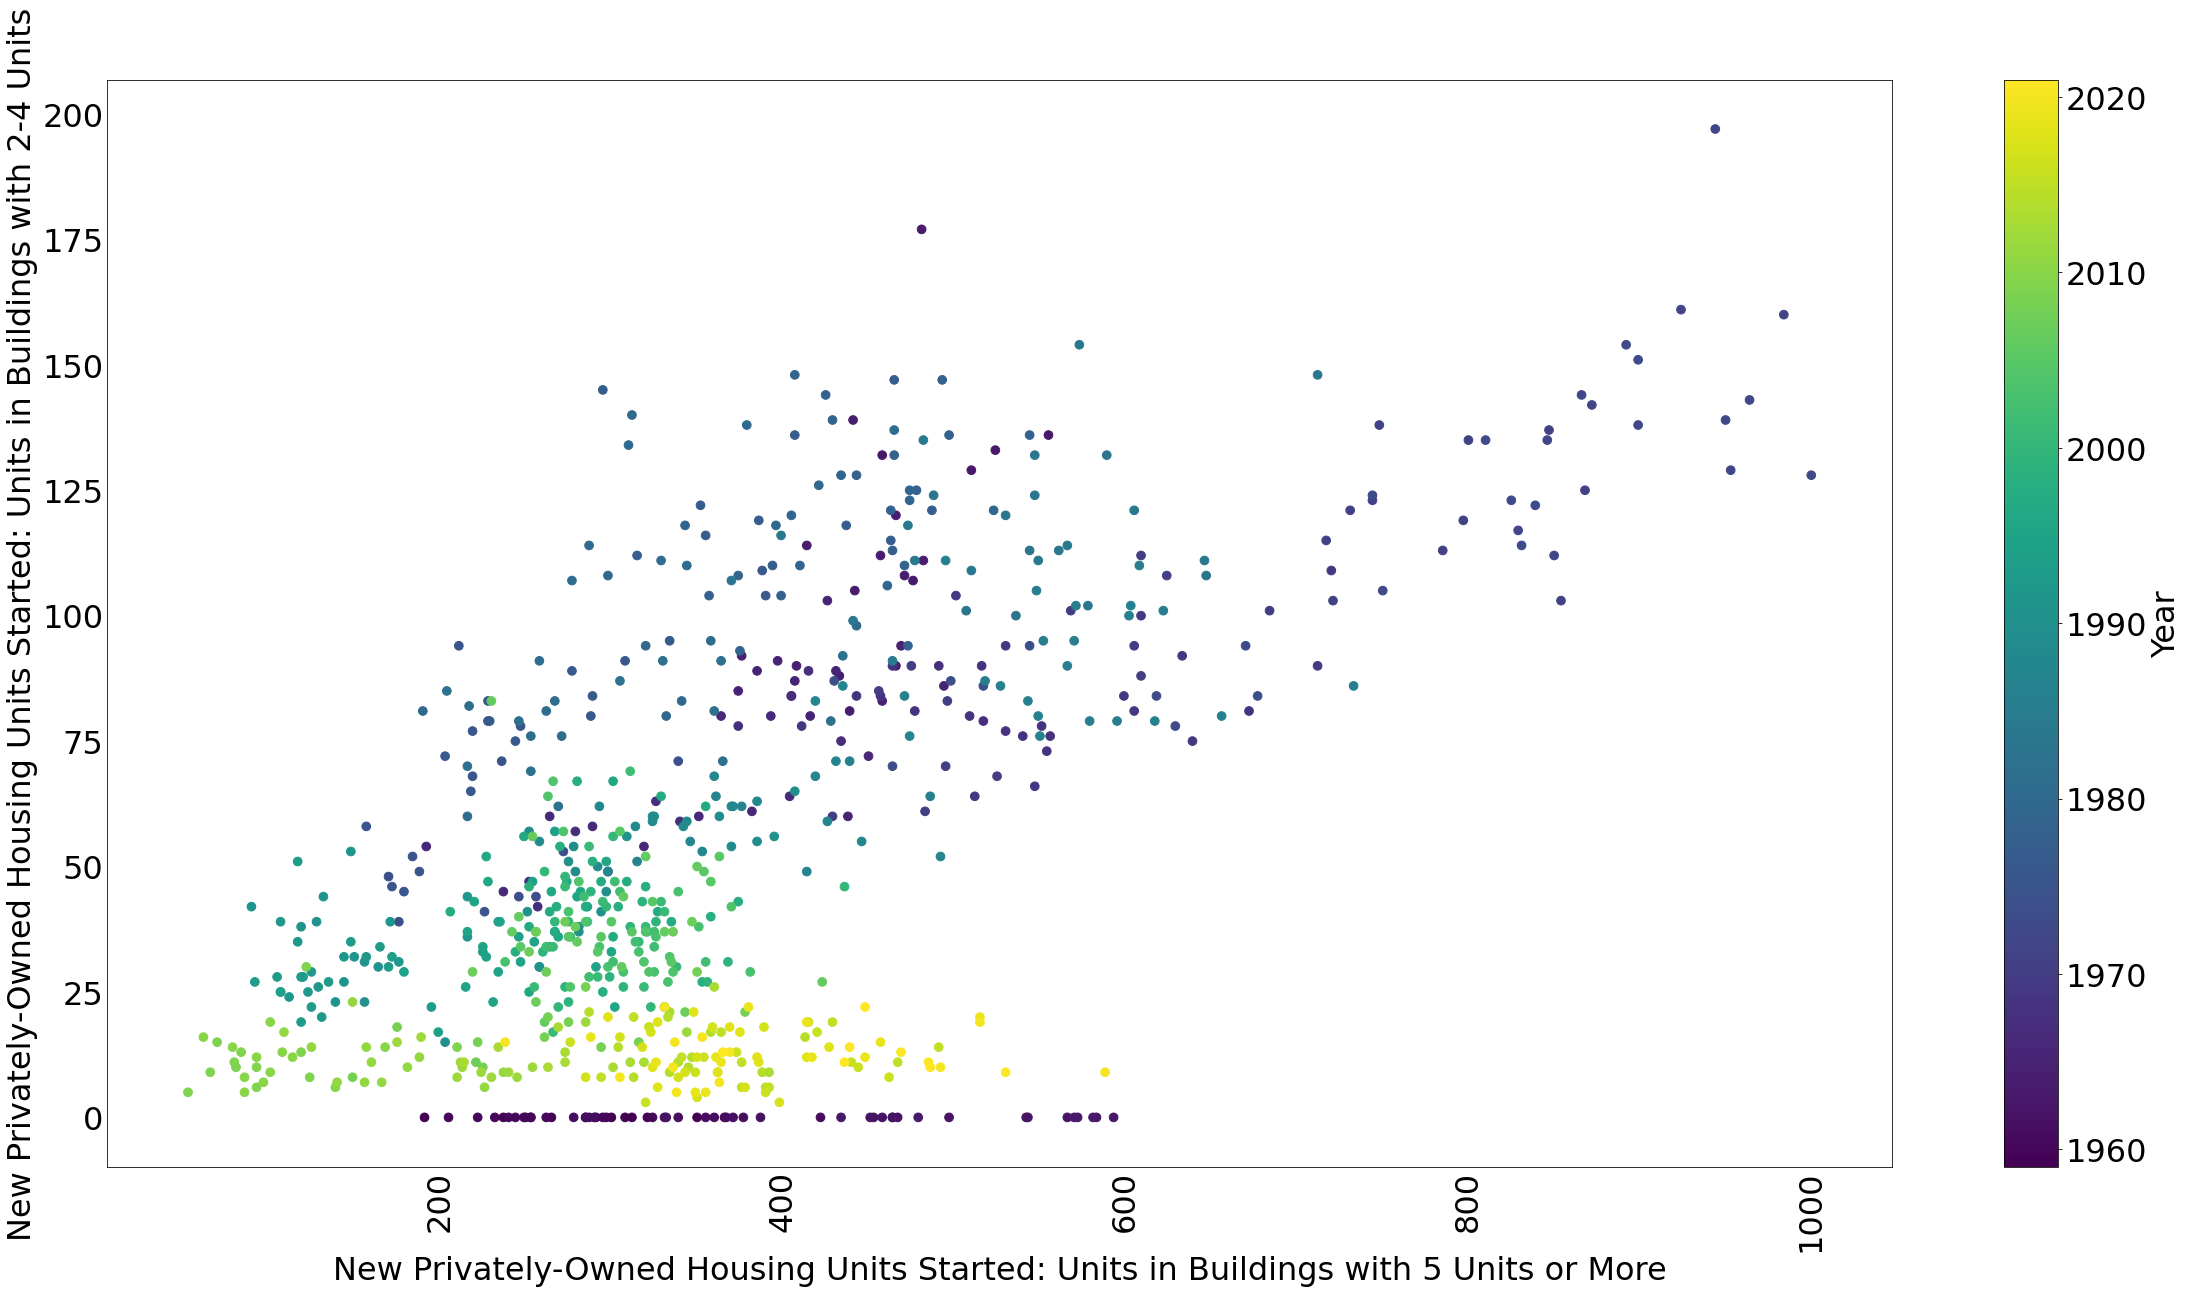

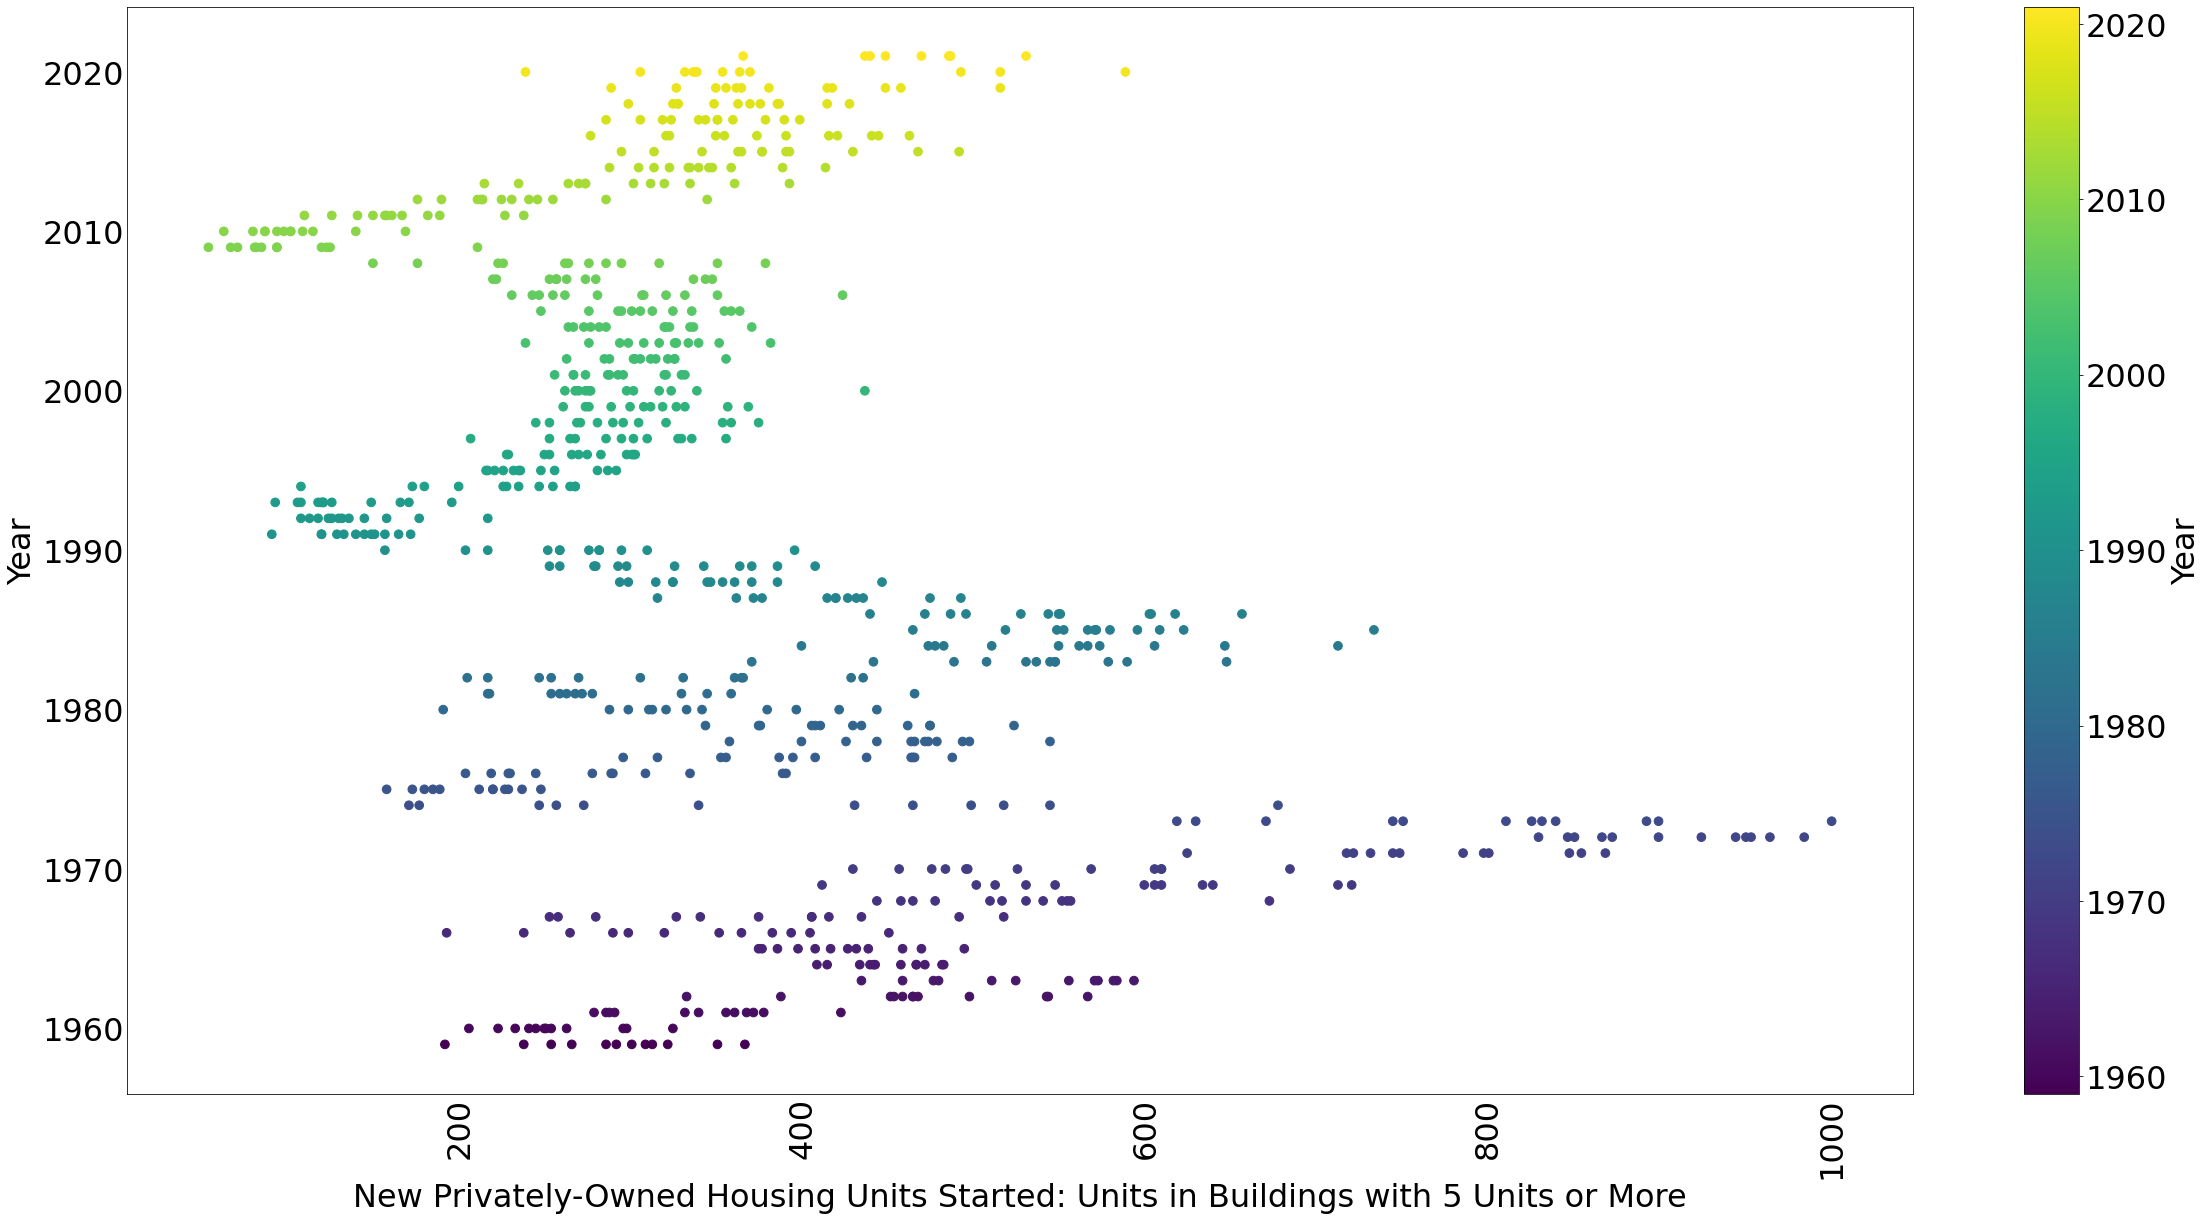

In [9]:
housing_params =['New Privately-Owned Housing Units Started: Single-Family Units',
               'New Privately-Owned Housing Units Started: Units in Buildings with 2-4 Units',
              'New Privately-Owned Housing Units Started: Units in Buildings with 5 Units or More']

plot_ts_scatter(data[housing_params])

Create a correlation matrix plot for quarterly observations of 
- Nominal GDP, 
- Real GDP, 
- the Price Level (CPI or GDP Deflator), 
- the quantity of currency in circulation and the 
- federal funds rate for as large of a date range as possible. 

Then, calculate the year-over-year percent change for each each variable and save the results as variables in the same dataframe. Create a correlation matrix for these new variables.


In [10]:
gdp_data = {
    "Nominal GDP": "NGDPPOT",
    "Real GDP":"GDPC1",
    "Price":"A191RI1Q225SBEA", # GDP: Implicit Price Deflator
    "Curr. in Cir.": "CURRCIR",  #Base: Currency in Circulation ($ Mil)
    "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
    "Federal Funds (Upper) Target":"DFEDTARU",
    "Fed. Funds Rate":"DFF",   #Effective Federal Funds Rate
    "Interest on Excess Reserves":"IOER"
}  

In [11]:
# Select start and end dates
start = datetime.datetime(1950, 1, 1)
end = datetime.datetime.today()

gdp_df = gather_data(
        data_codes = gdp_data,
        start = start,
        end = end,
        freq= "Q")

# Write dataframe to file
gdp_df.to_csv('../data/gdp_data.csv')

### YoY % Change

#### How has the correlation between each variable changed? Why do you think the correlation changes after calculate the year-over-year percent change?

I assume the question refers to comparisons in the corrleation of the original values and the correlation to the yearly percent change. First, when you examine year-over-year percentages, you're examining a ratio, rather than the individual numbers; that will of course reflect the reasoning behind the change. Second, you're dealing with a time series shift, which will have some influence over the correlation values.

In [12]:
#Create seperate dataframe for the YoY % Change
pct_chg_df = gdp_df.pct_change(periods=4)
pct_chg_df.columns = ["YoY % Change Nominal GDP", 
                      "YoY % Change Real GDP", 
                      "YoY % Change Price", 
                      "YoY % Change Currency in Circ.", 
                      "YoY % Change Fed Funds Pre-crisis",
                      "YoY % Change Fed Funds Upper Tgt",
                      "YoY % Change Fed Funds Rate",
                     "YoY % Change Intrest on Excess Reserve"]

#Join the new columns to the existing dataset
gdp_df = gdp_df.join(pct_chg_df)

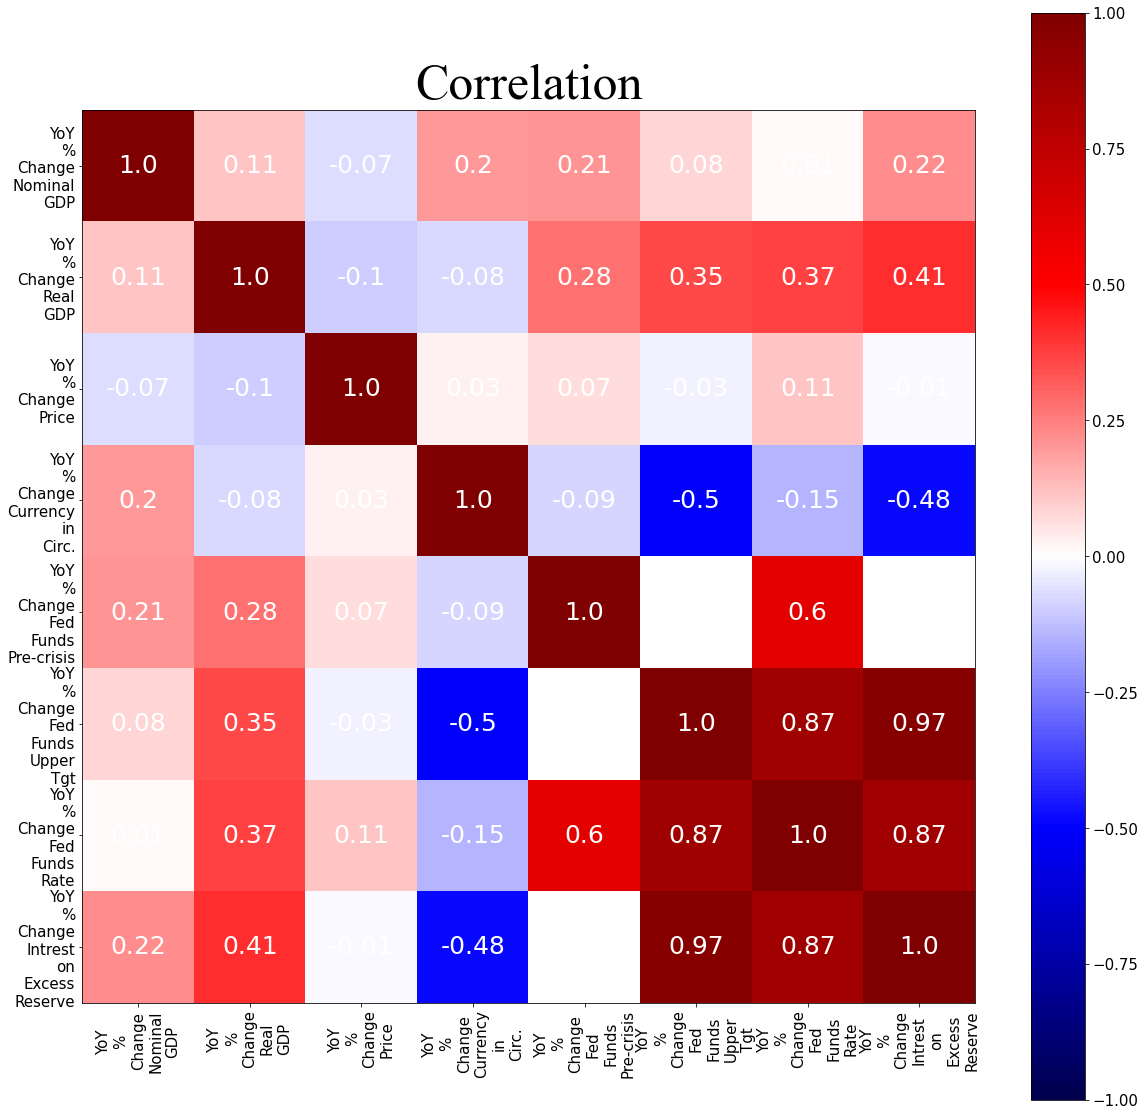

In [13]:
# Show correlation matrix using only the last 8 columns from the dataframe:
corr_matrix_heatmap(gdp_df.iloc[:,8:].corr(), pp=False)


### ECON 611 Only




### U.S. Treasuries (Constant Maturity Rate)
- 1 Year
- 2 Year
- 5 Year
- 10 Year
- 30 Year

In [14]:
treasuries = {
    "1 M (%)":"DGS1MO",
    "3 M (%)":"DGS3MO",
    "6 M (%)":"DGS6MO",
    "1 Y (%)":"DGS1",
    "2 Y (%)":"DGS2",
    "5 Y (%)":"DGS5",
    "10 Y (%)":"DGS10",
    "20 Y (%)":"DGS20",
    "30 Y (%)":"DGS30"
}

start = datetime.datetime(2020, 1, 1)
end = datetime.datetime.today()

treas_df = gather_data(
        data_codes = treasuries,
        start = start,
        end = end,
        freq= "M")

# Write dataframe to file
treas_df.to_csv('../data/treasuries_data.csv')

### I can't get the plots to write to a PDF. I've spent hours trying to troubleshoot why... I simply give up for now out of self-preservation.
Create a plot for every date and save each plot with the date marked in a single pdf.

C:\Users\SAND8464\Repos\ECON611\Homework\library\plot_functions.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([label_format.format(x) for x in vals])
C:\Users\SAND8464\Repos\ECON611\Homework\library\plot_functions.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([label_format.format(x) for x in vals])
C:\Users\SAND8464\Repos\ECON611\Homework\library\plot_functions.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([label_format.format(x) for x in vals])
C:\Users\SAND8464\Repos\ECON611\Homework\library\plot_functions.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([label_format.format(x) for x in vals])
C:\Users\SAND8464\Repos\ECON611\Homework\library\plot_functions.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([labe

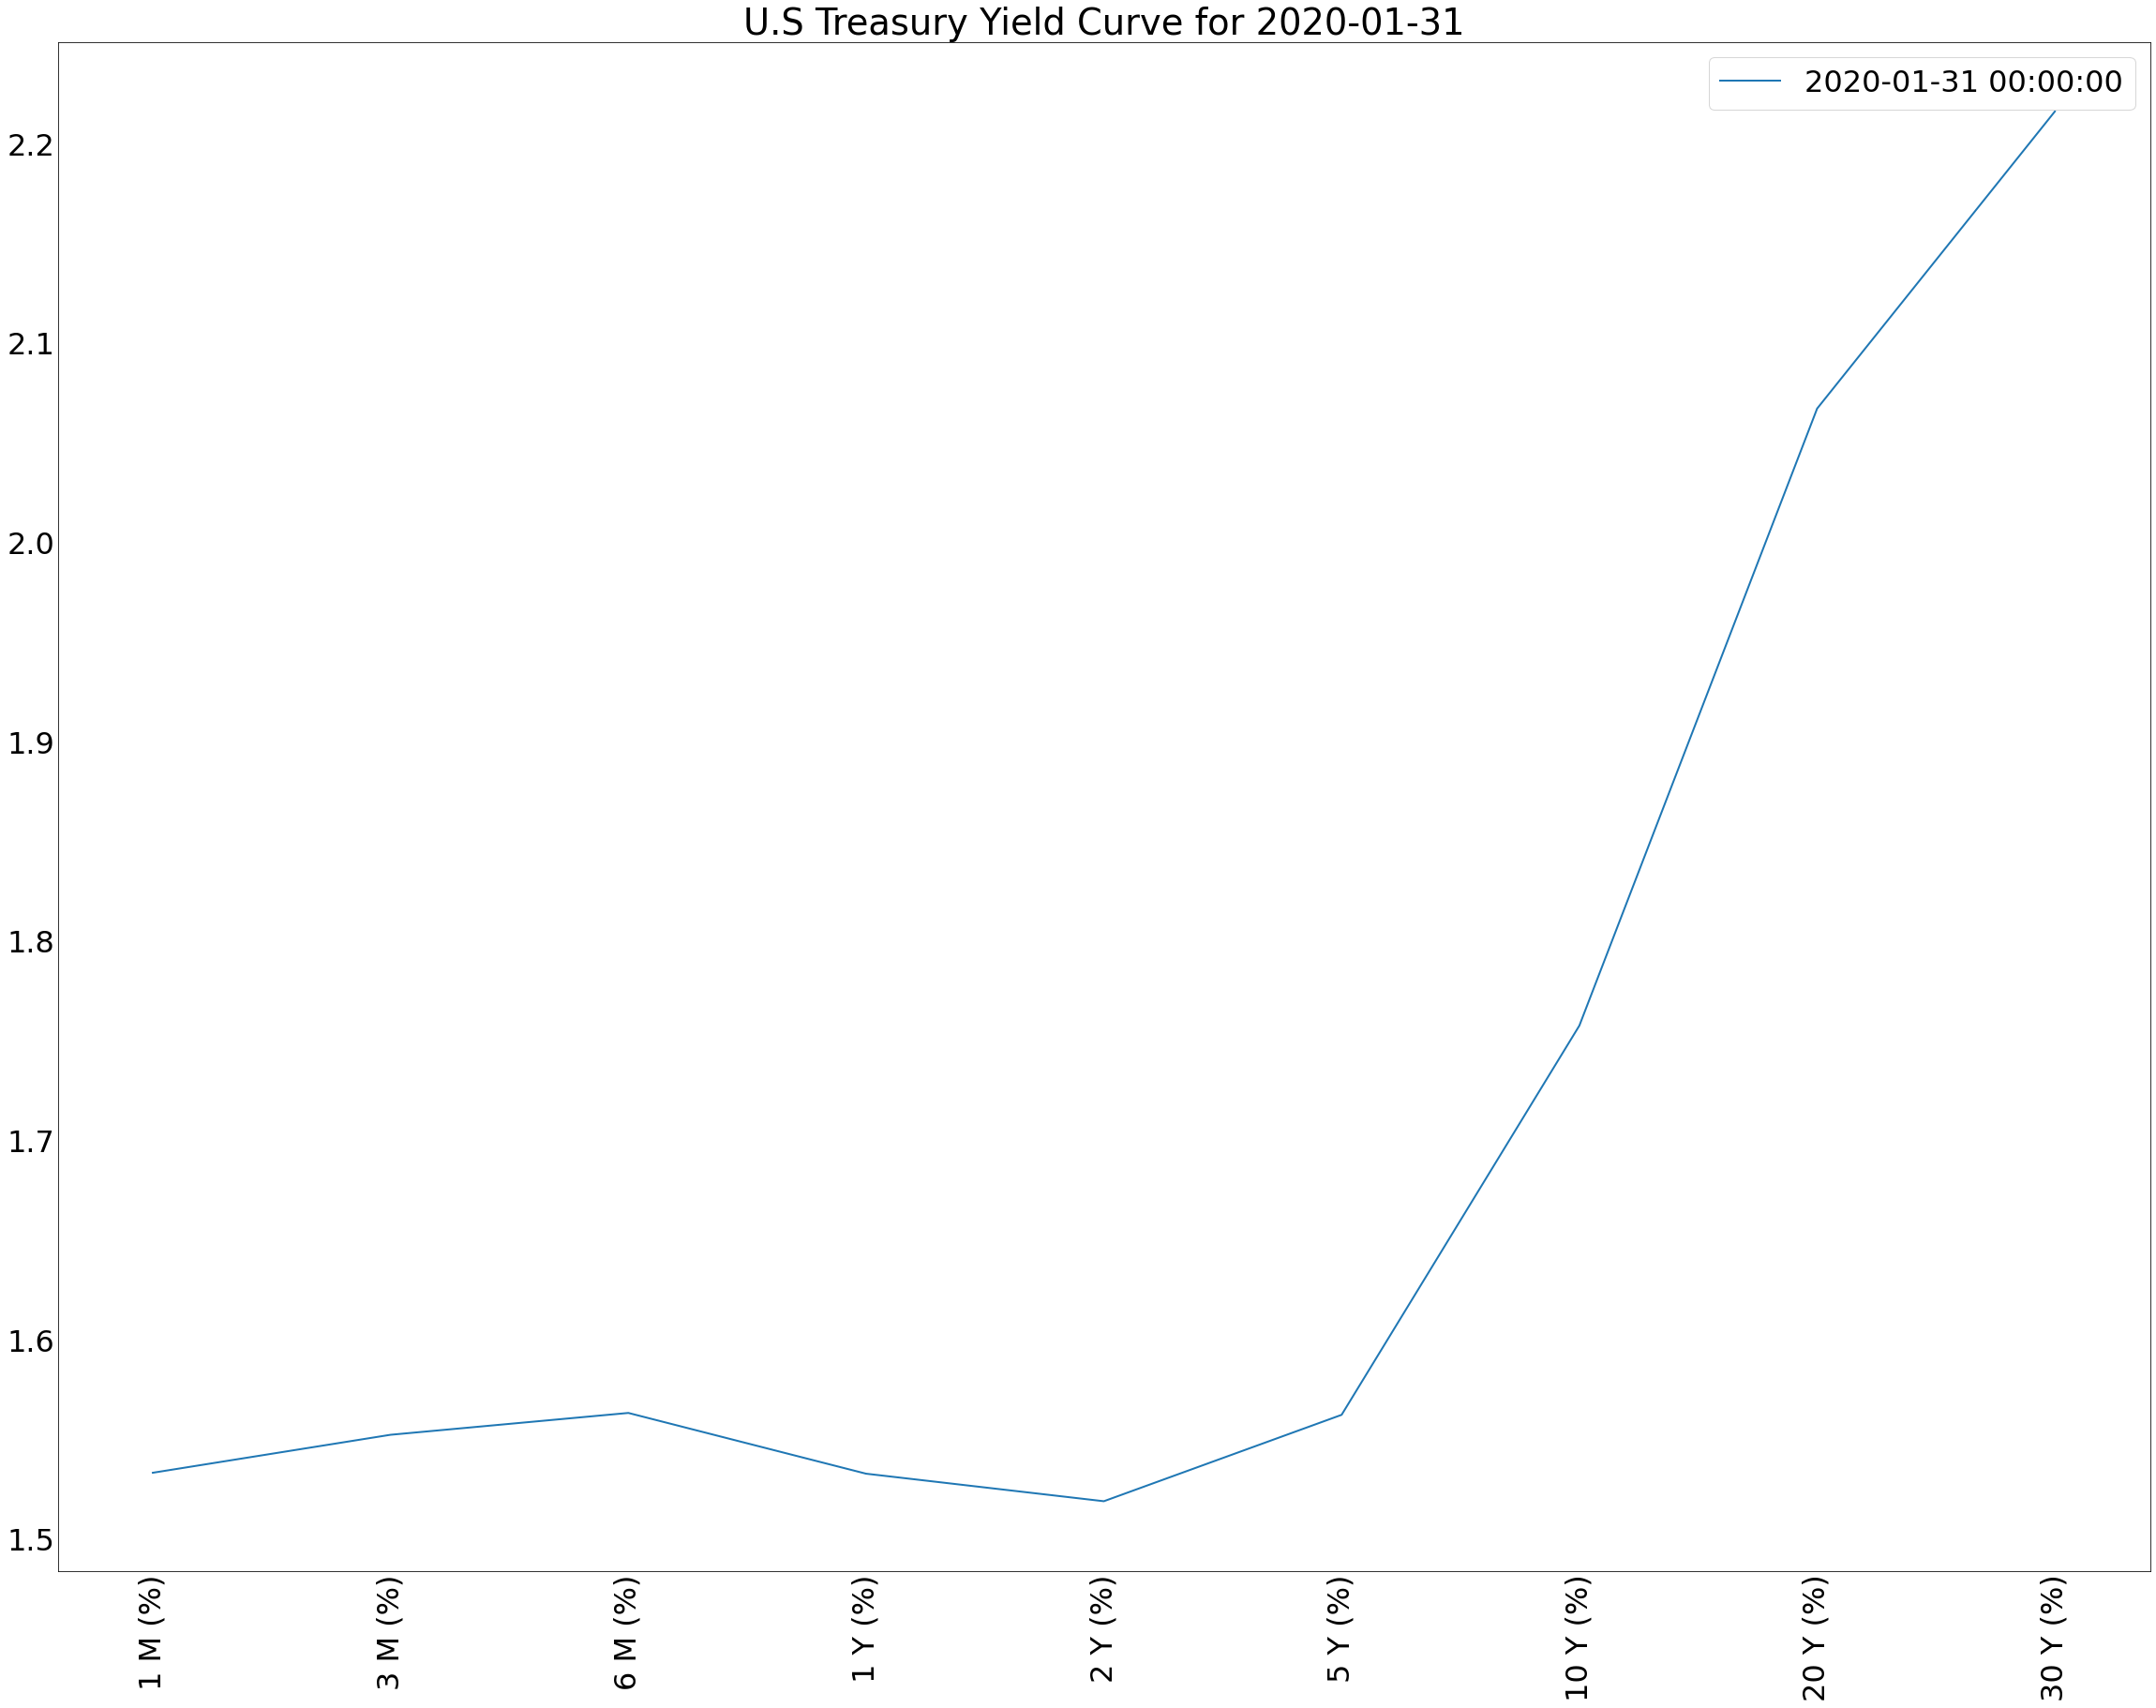

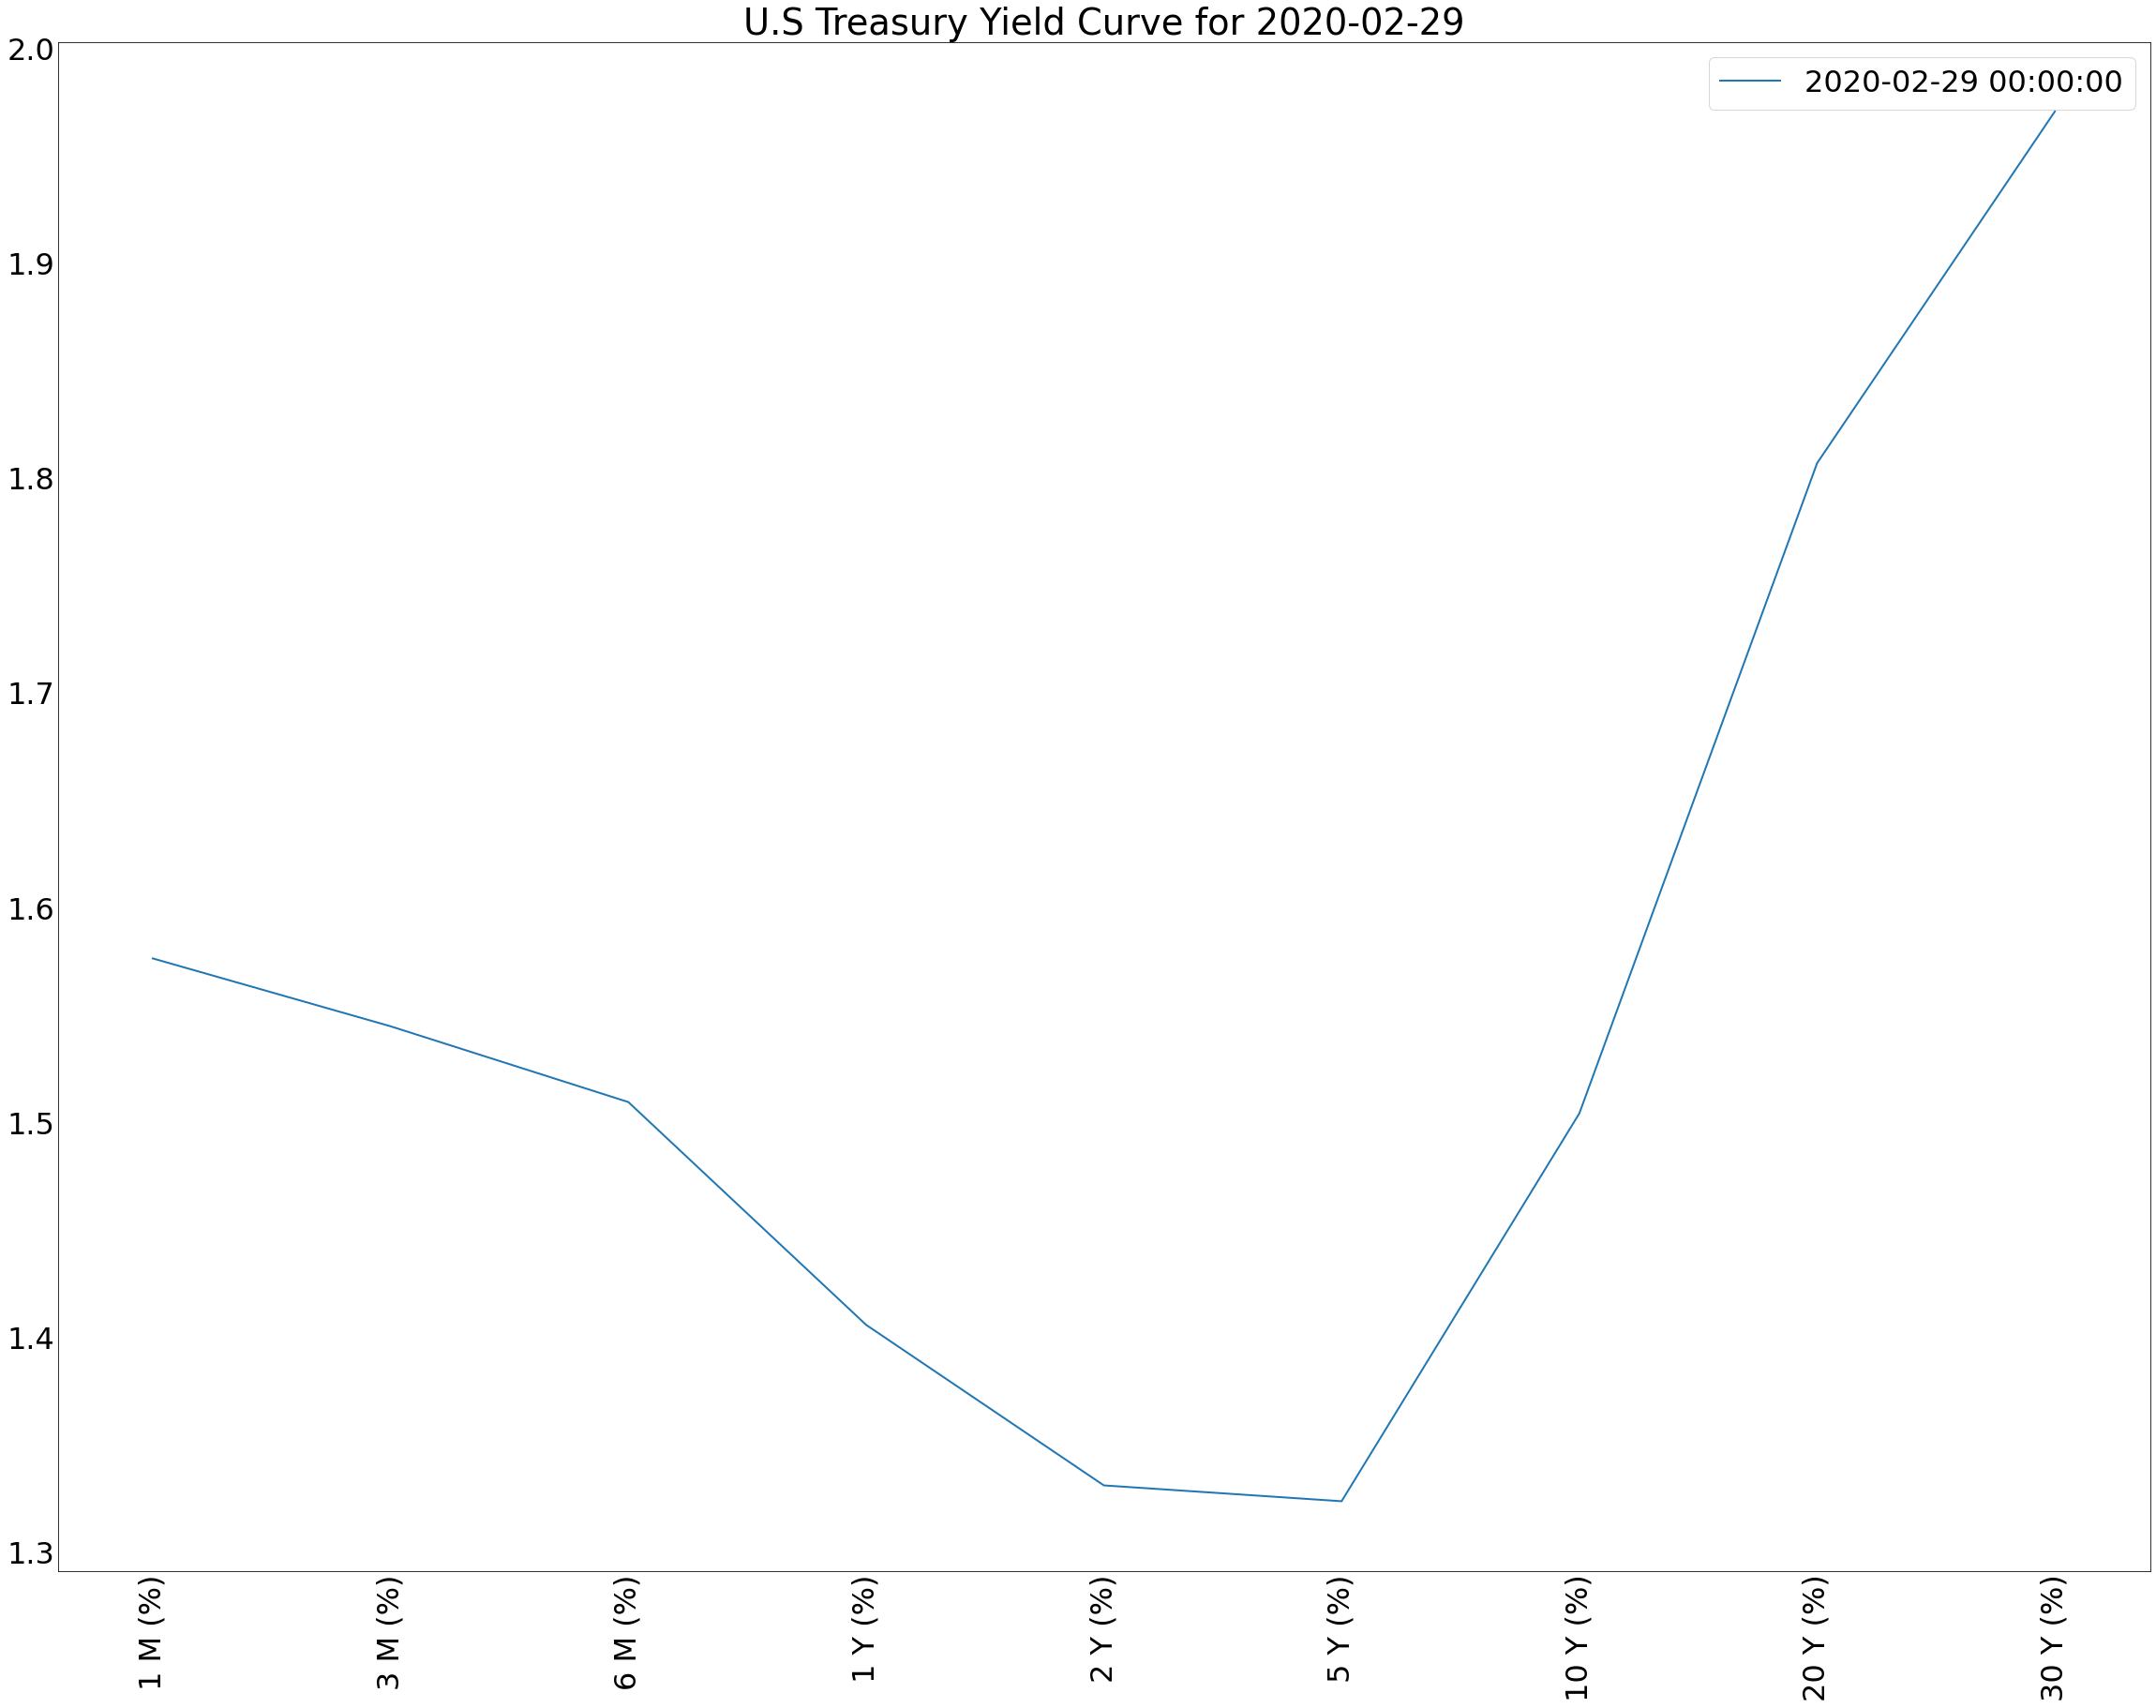

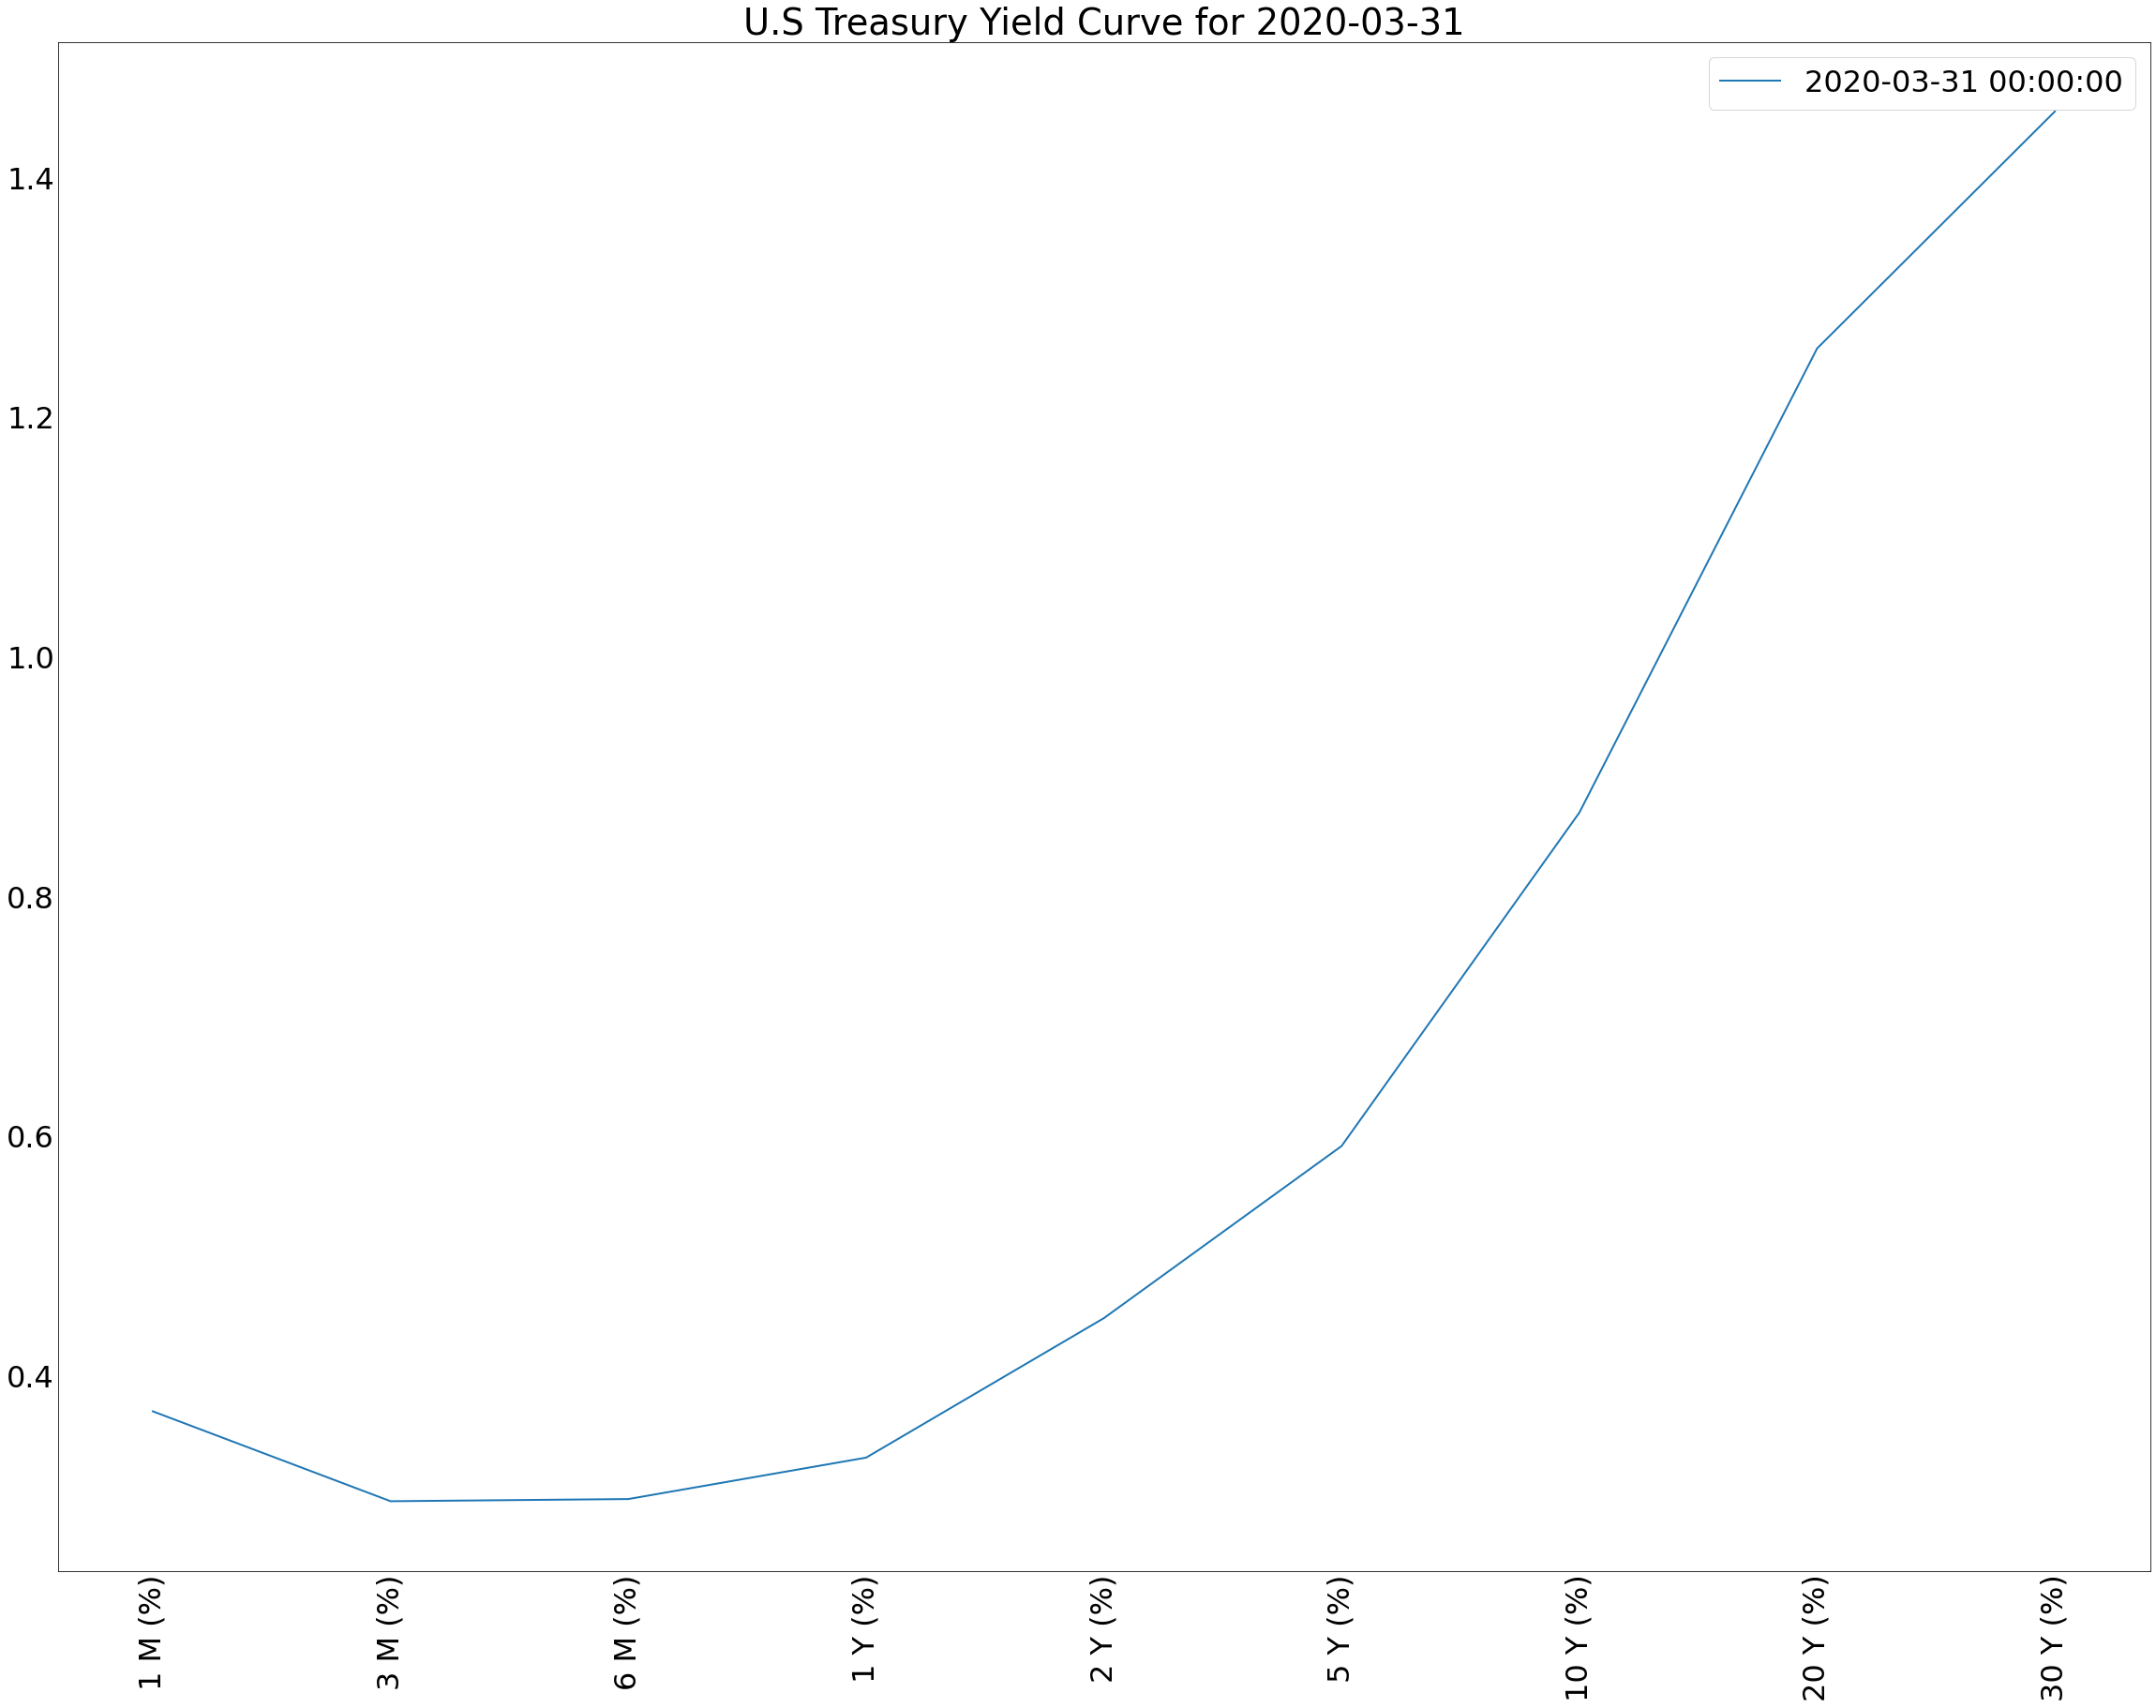

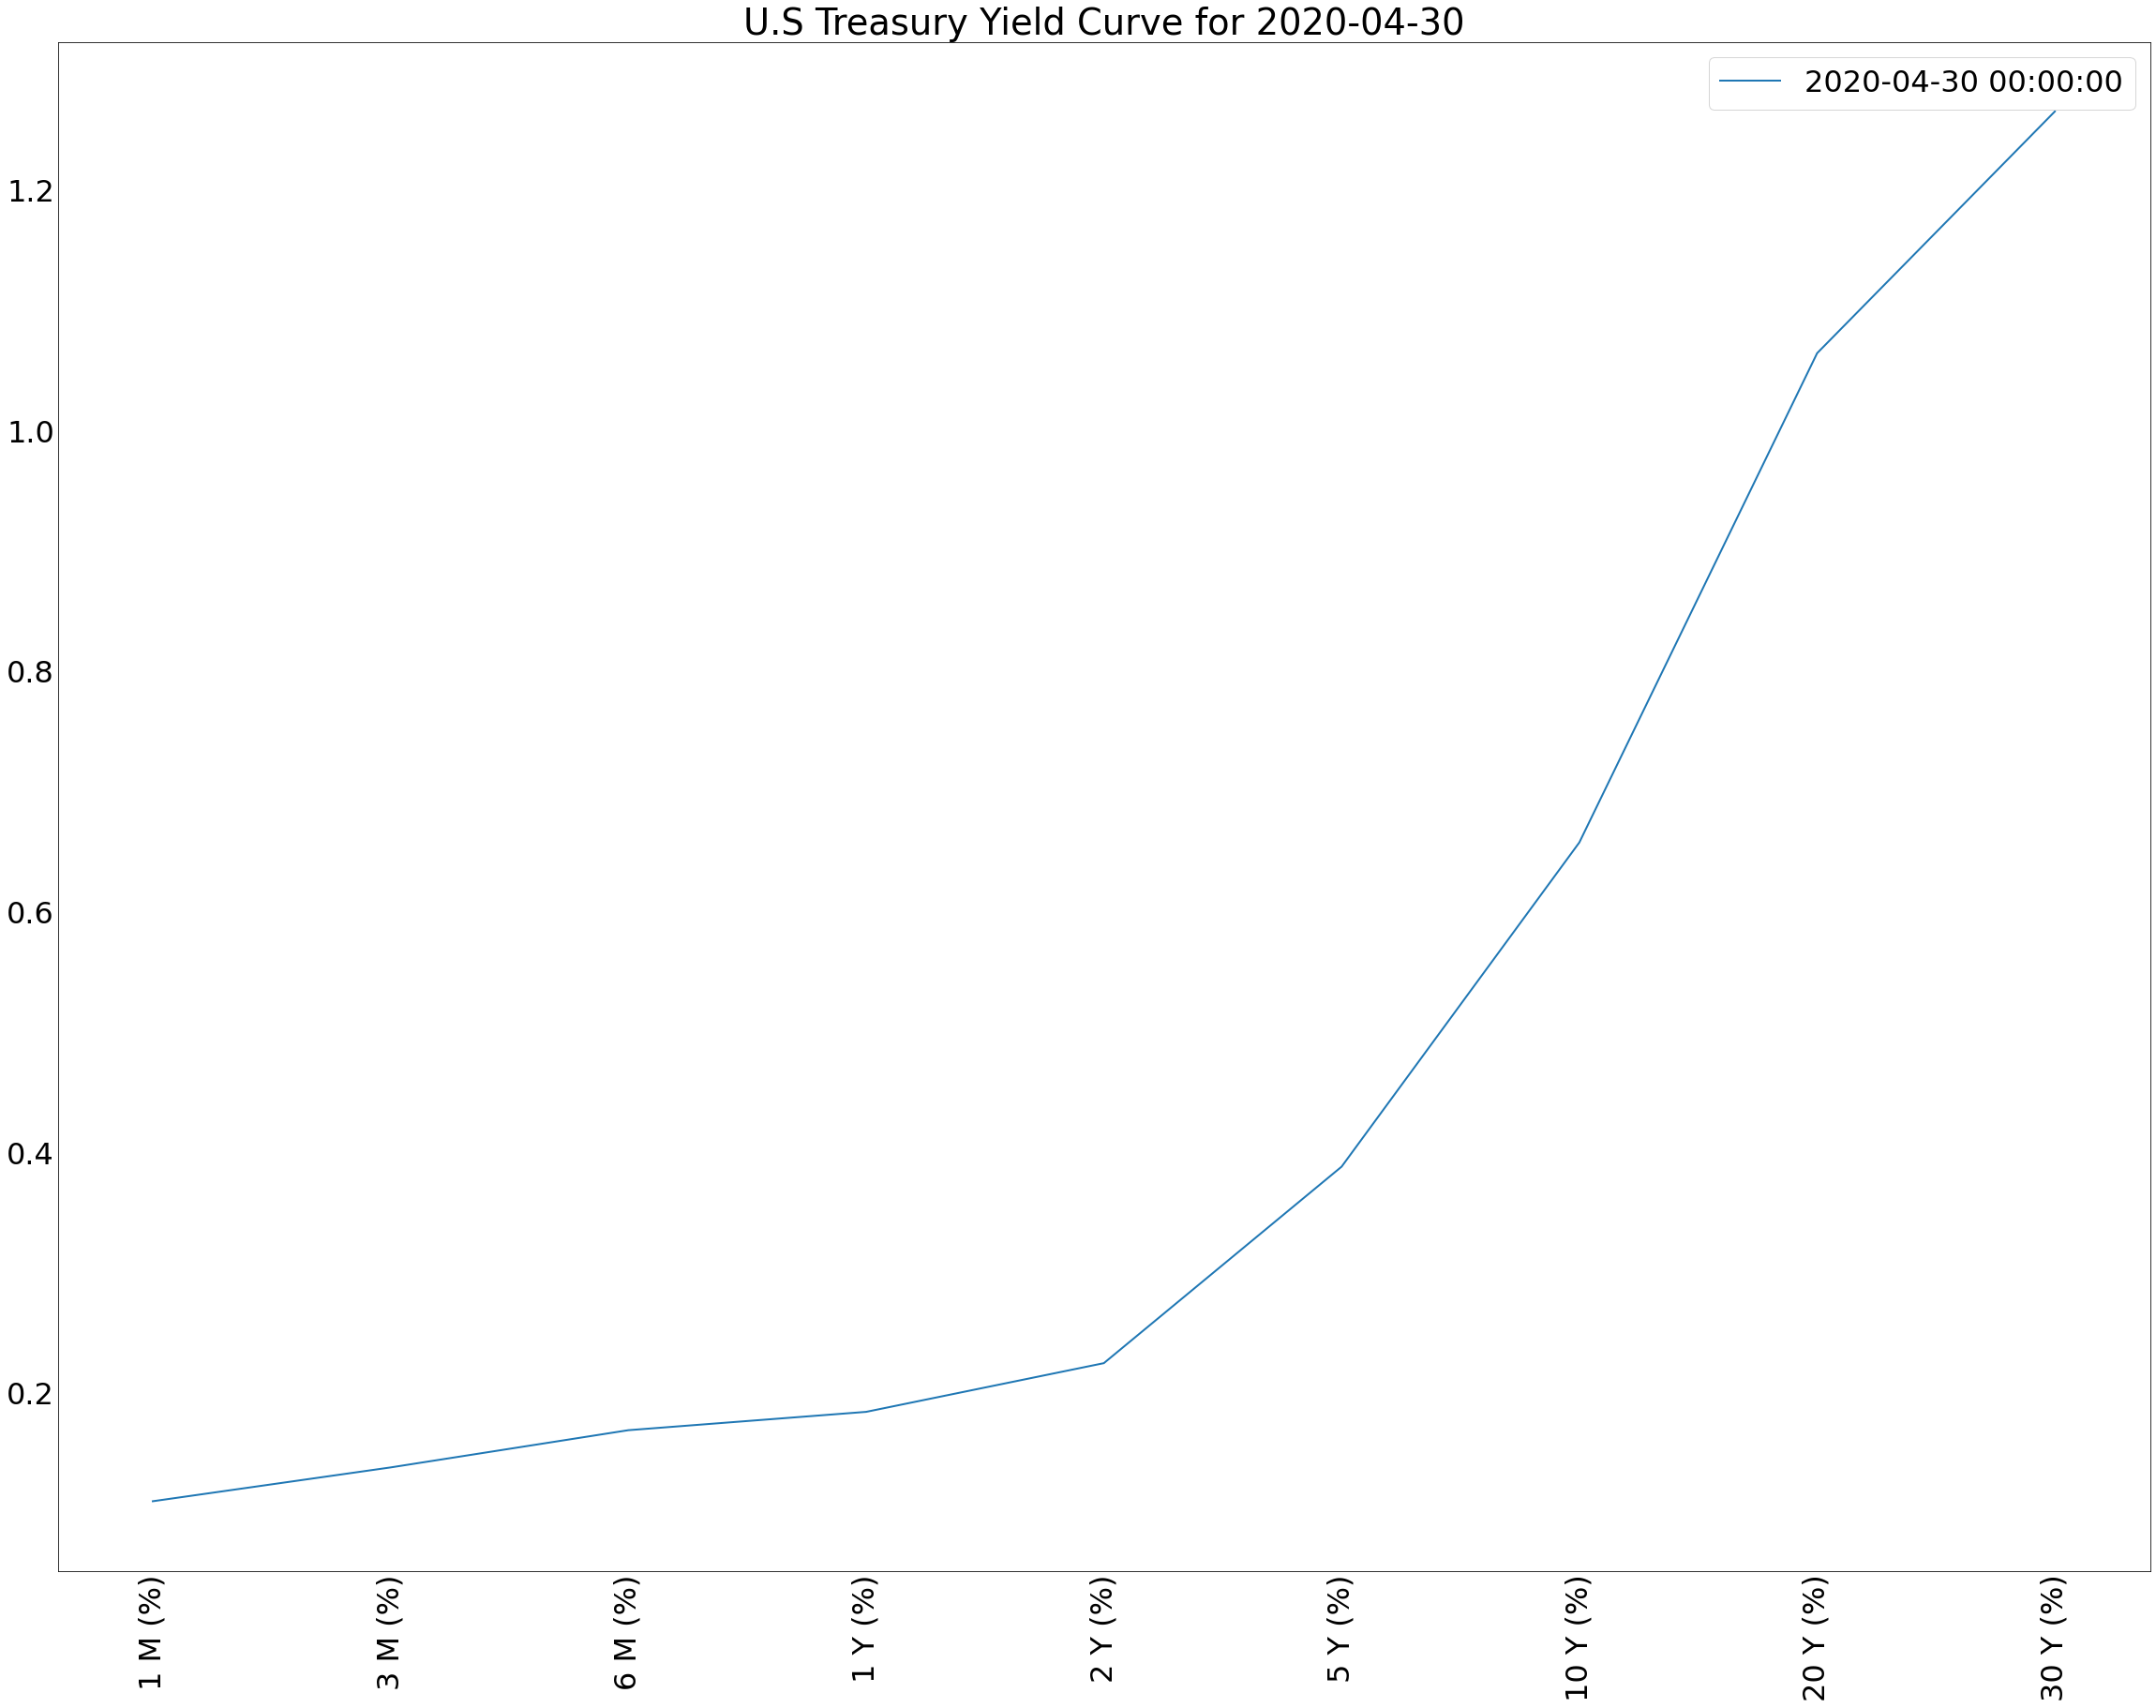

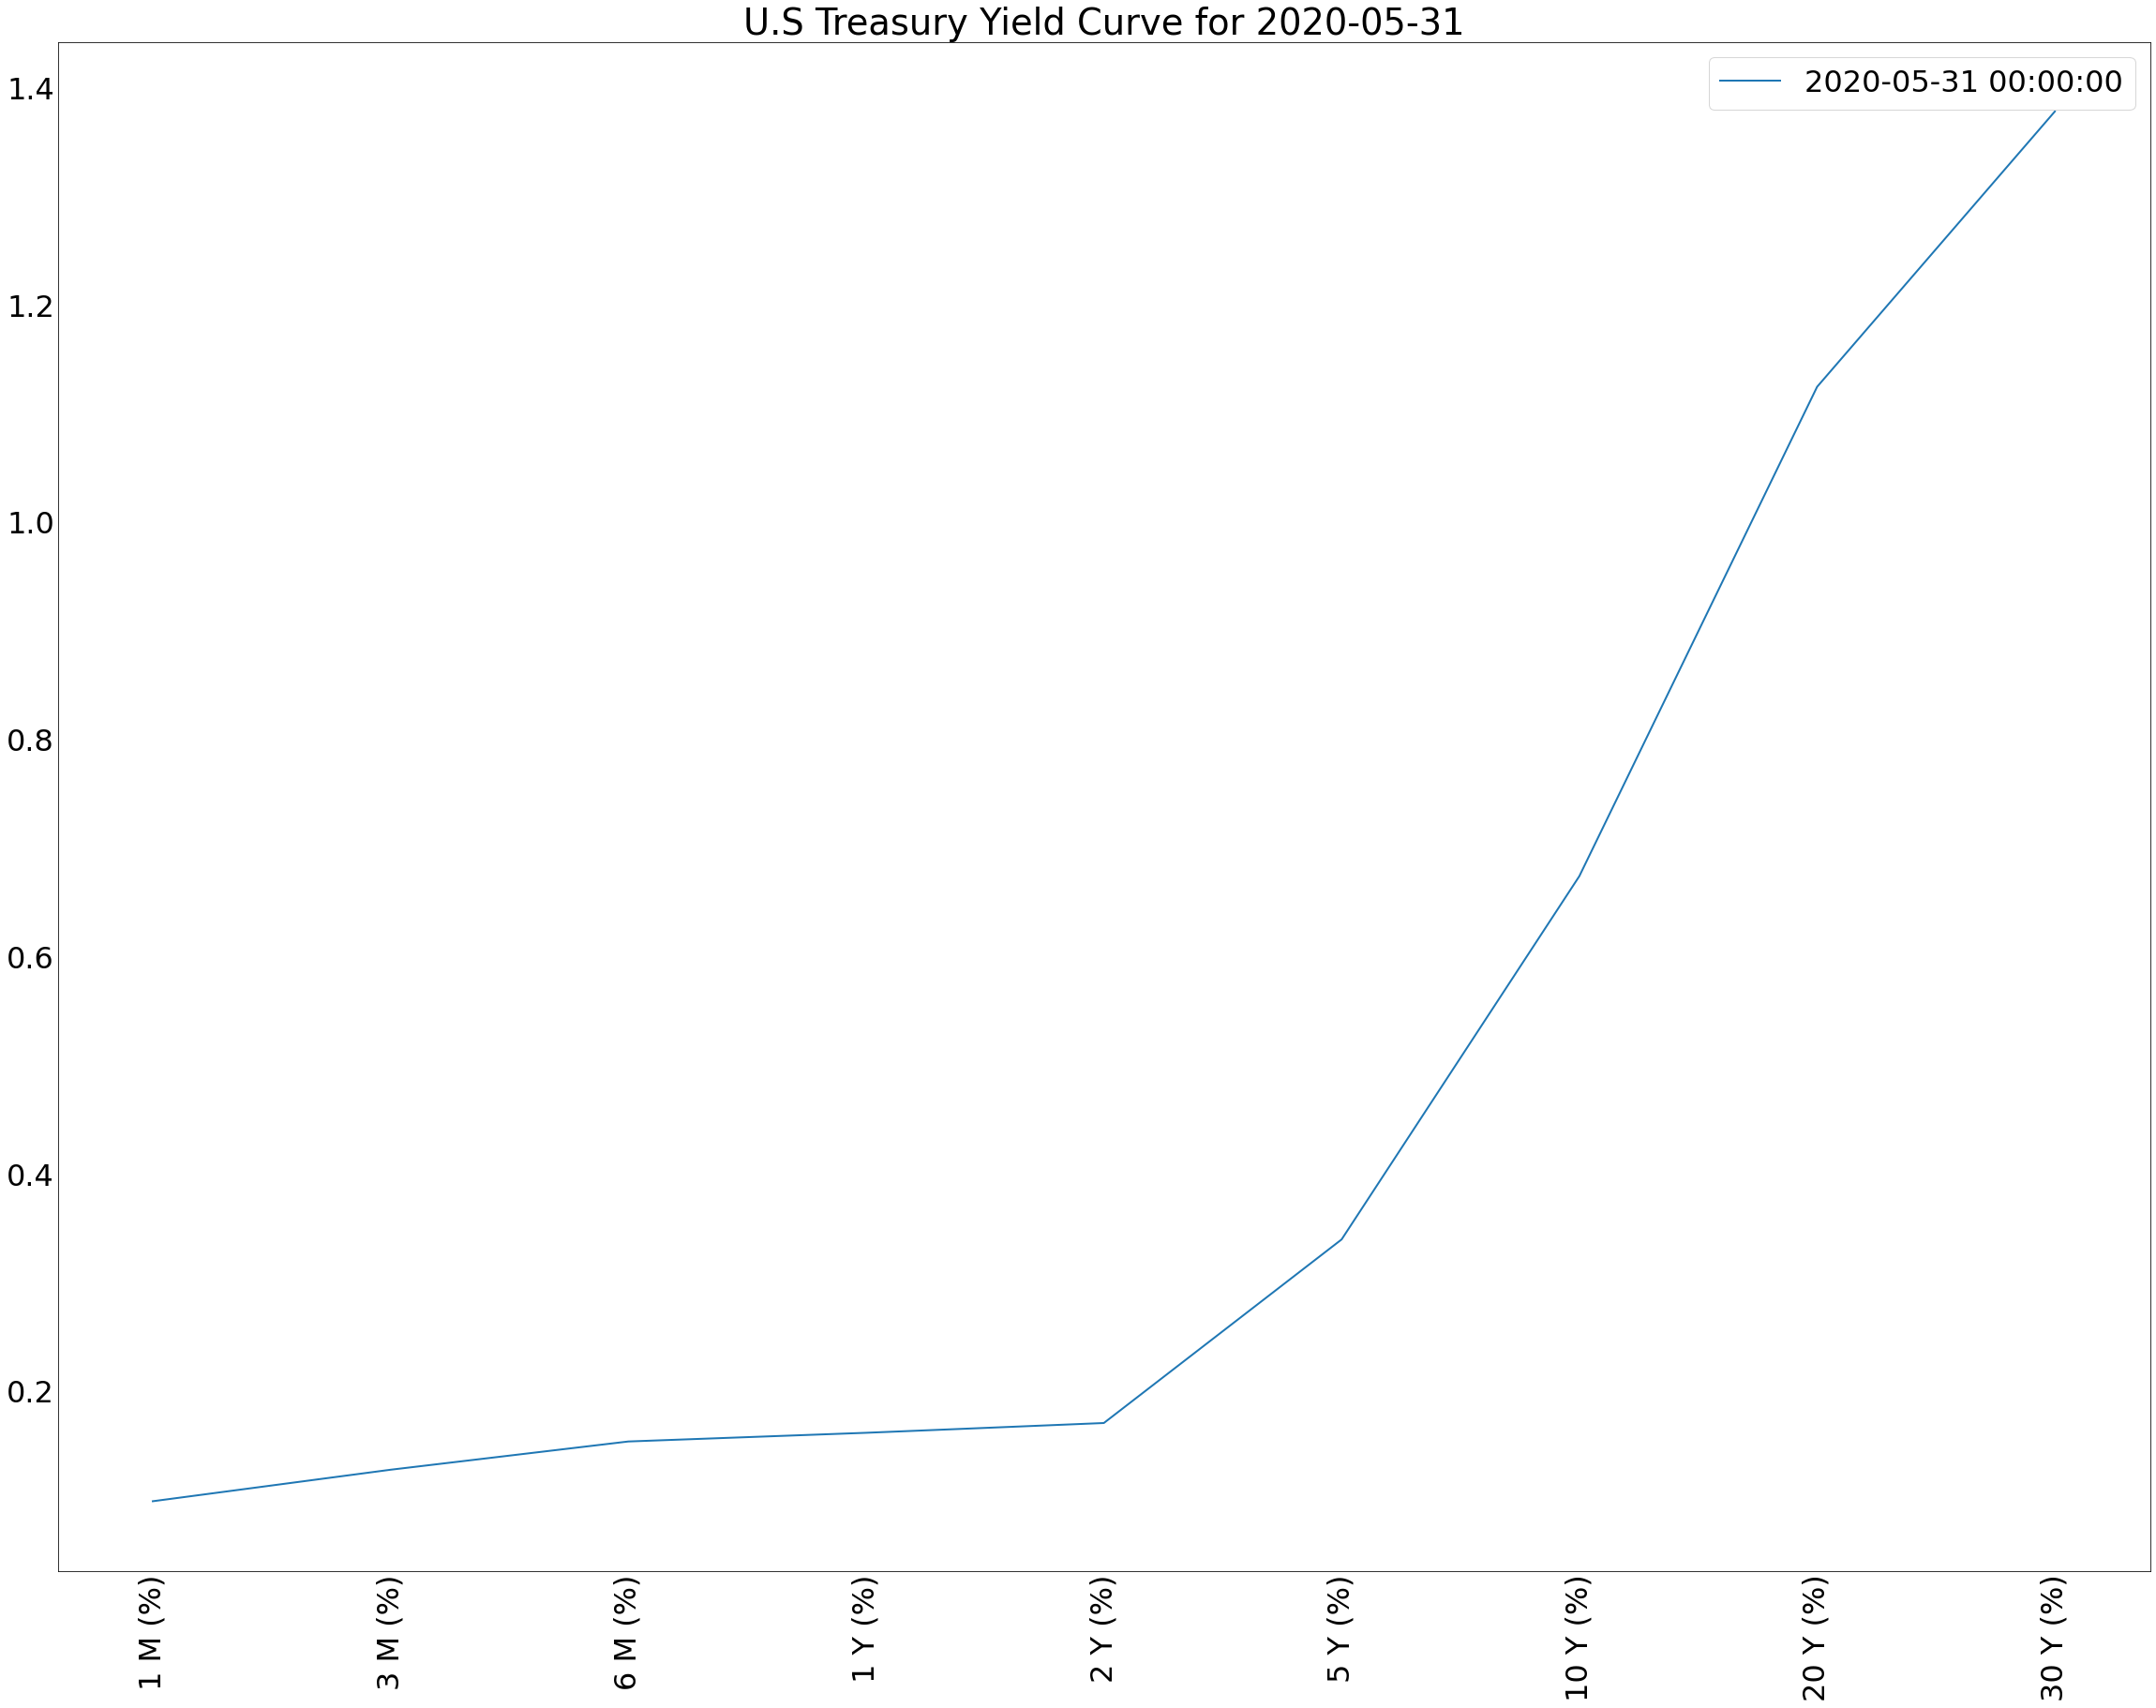

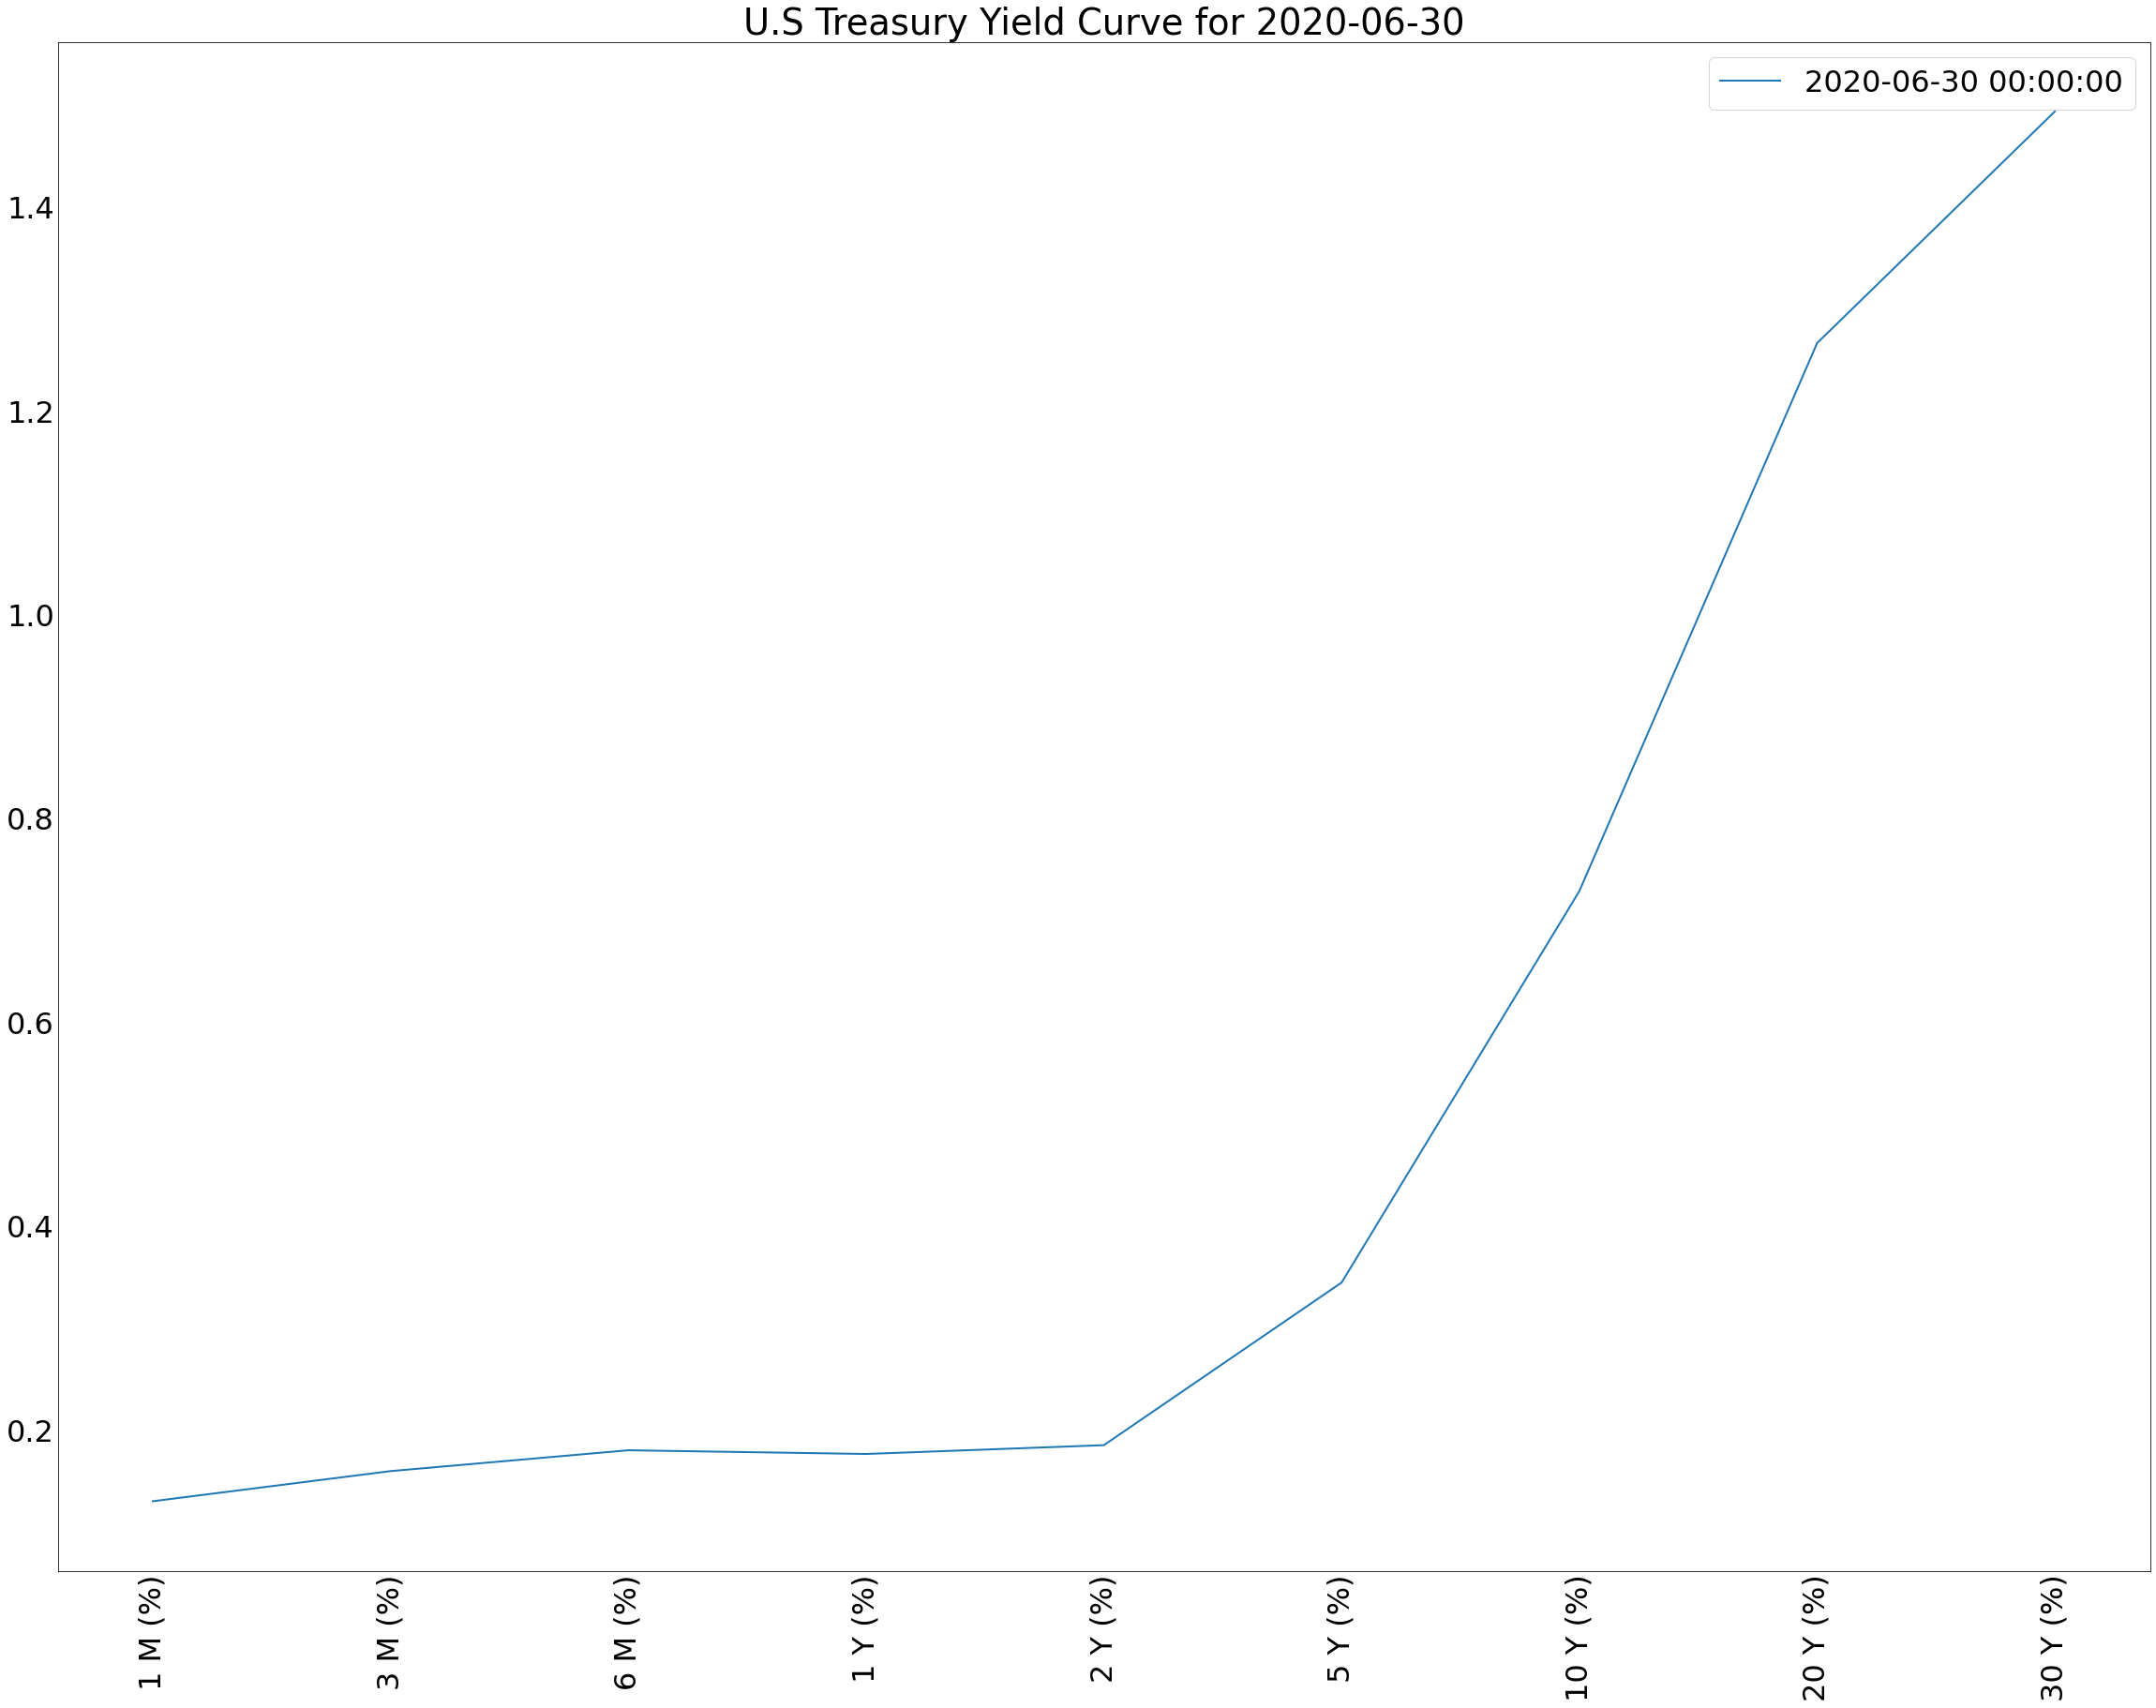

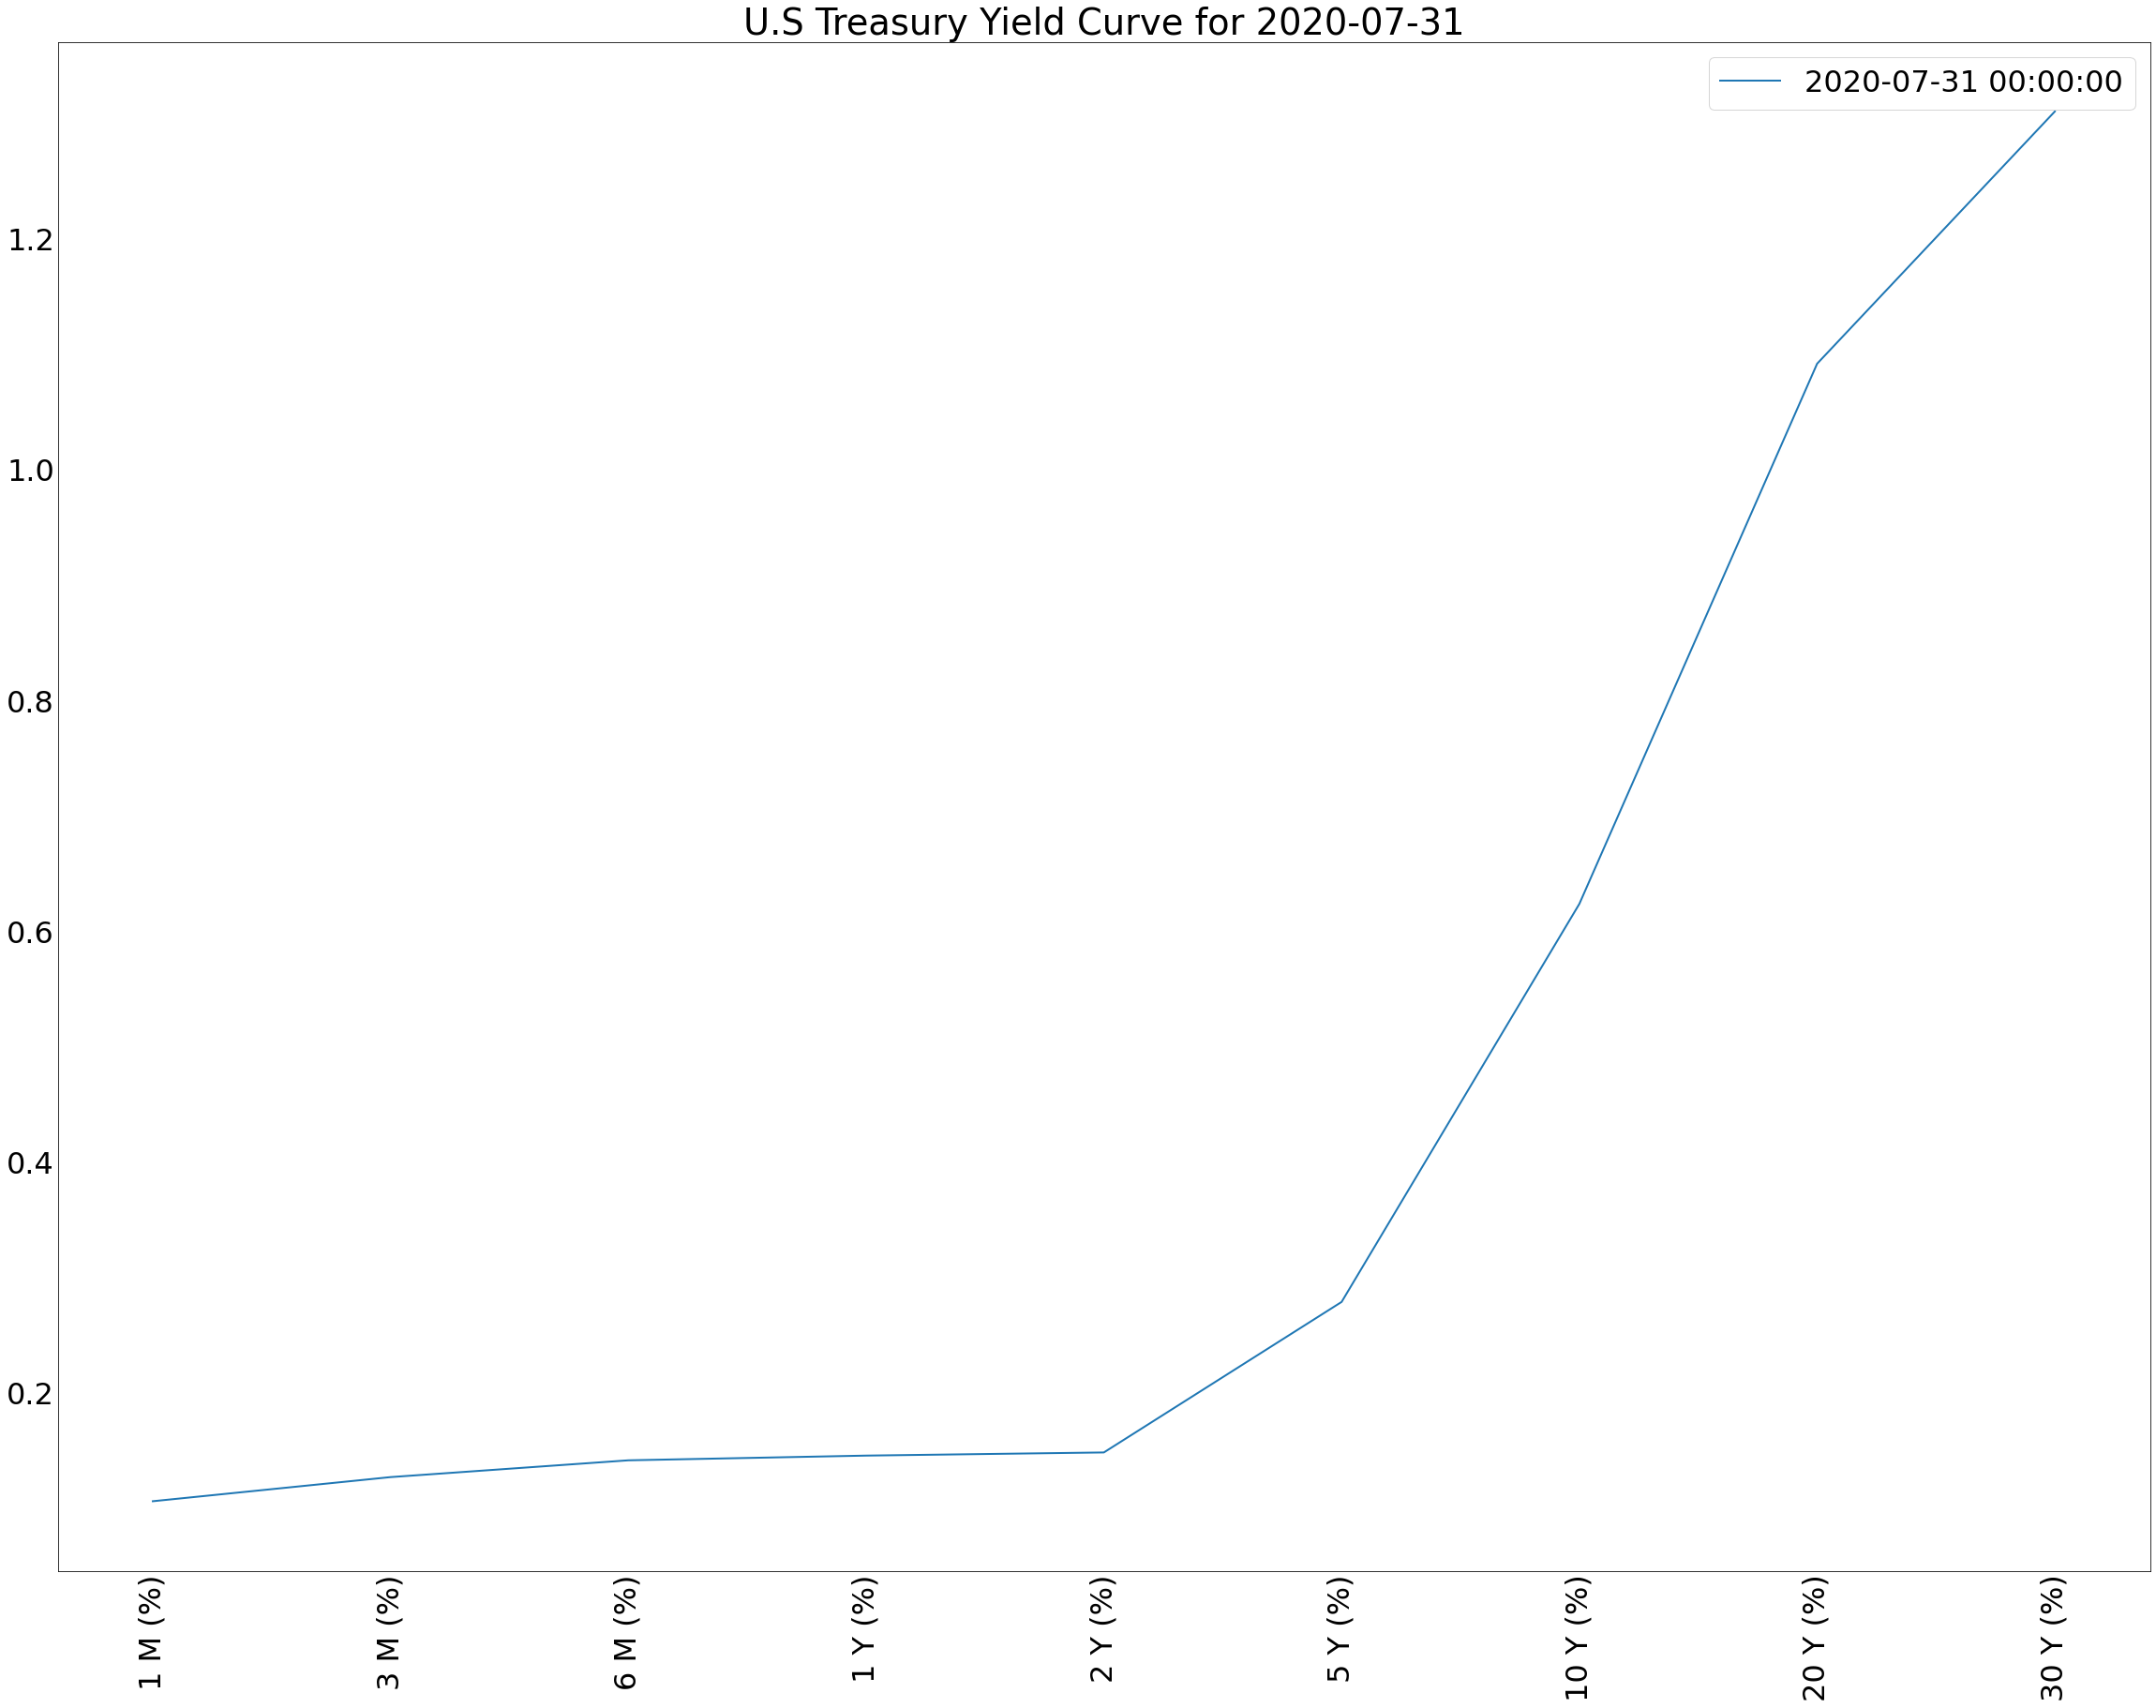

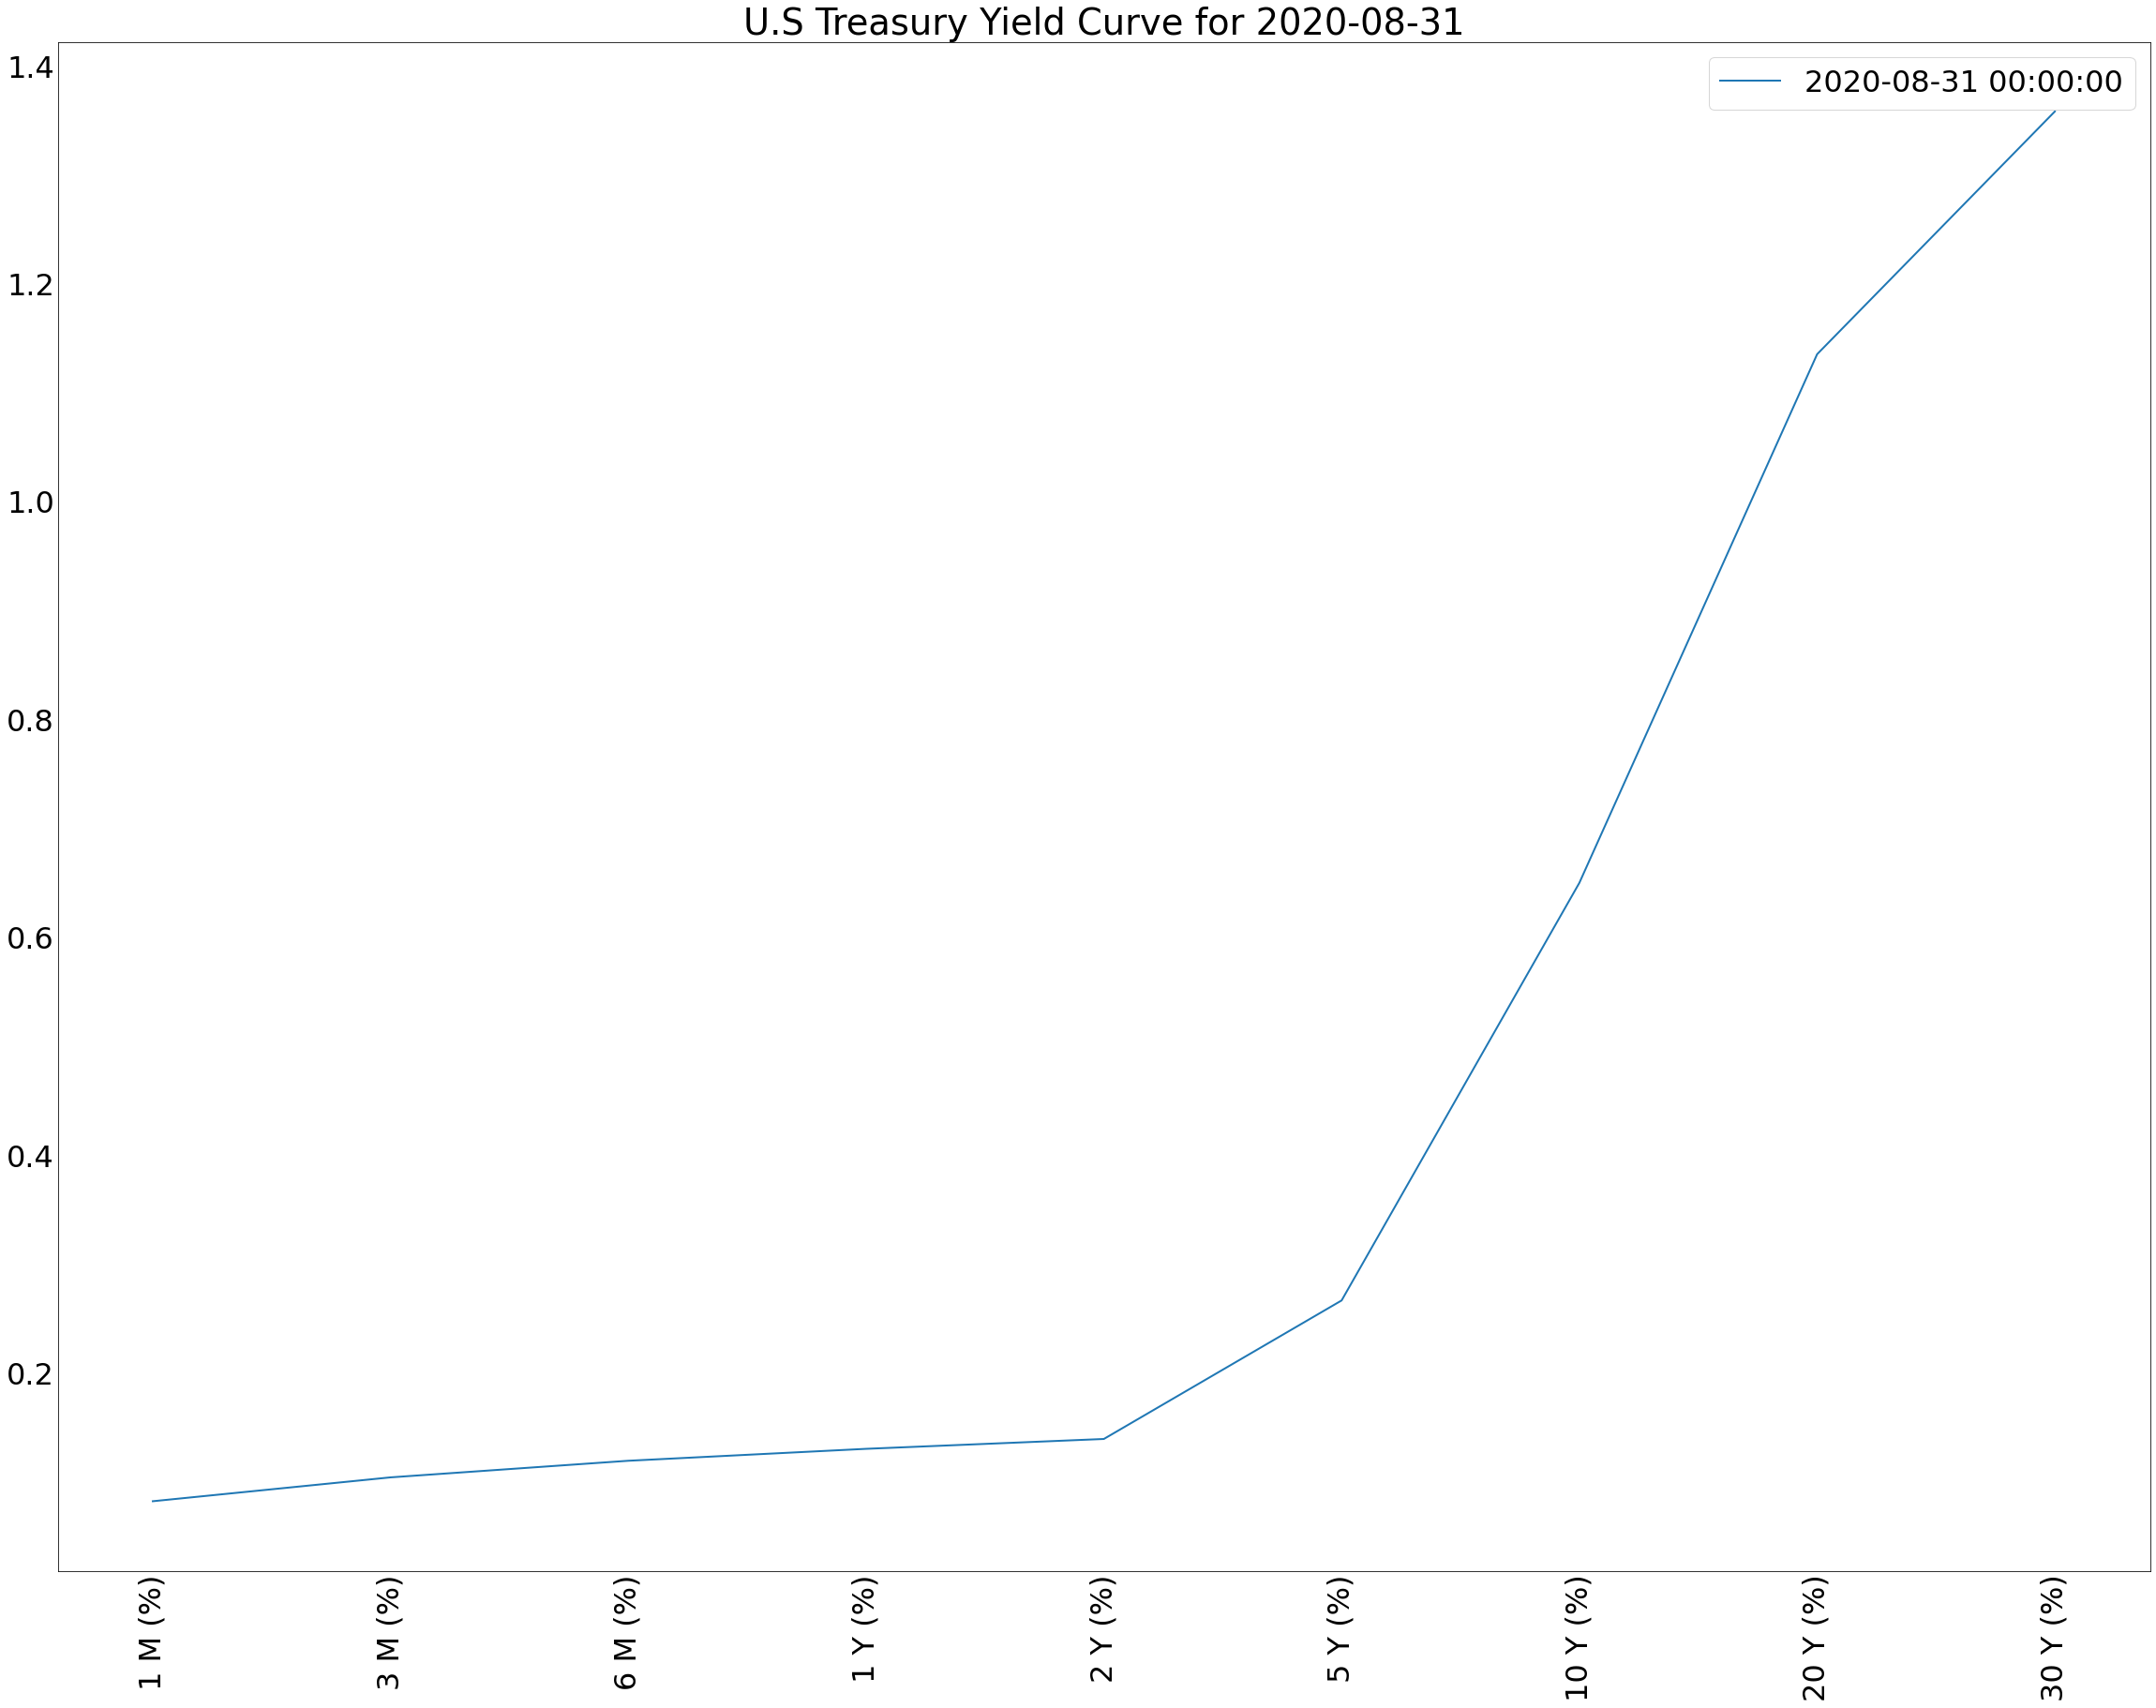

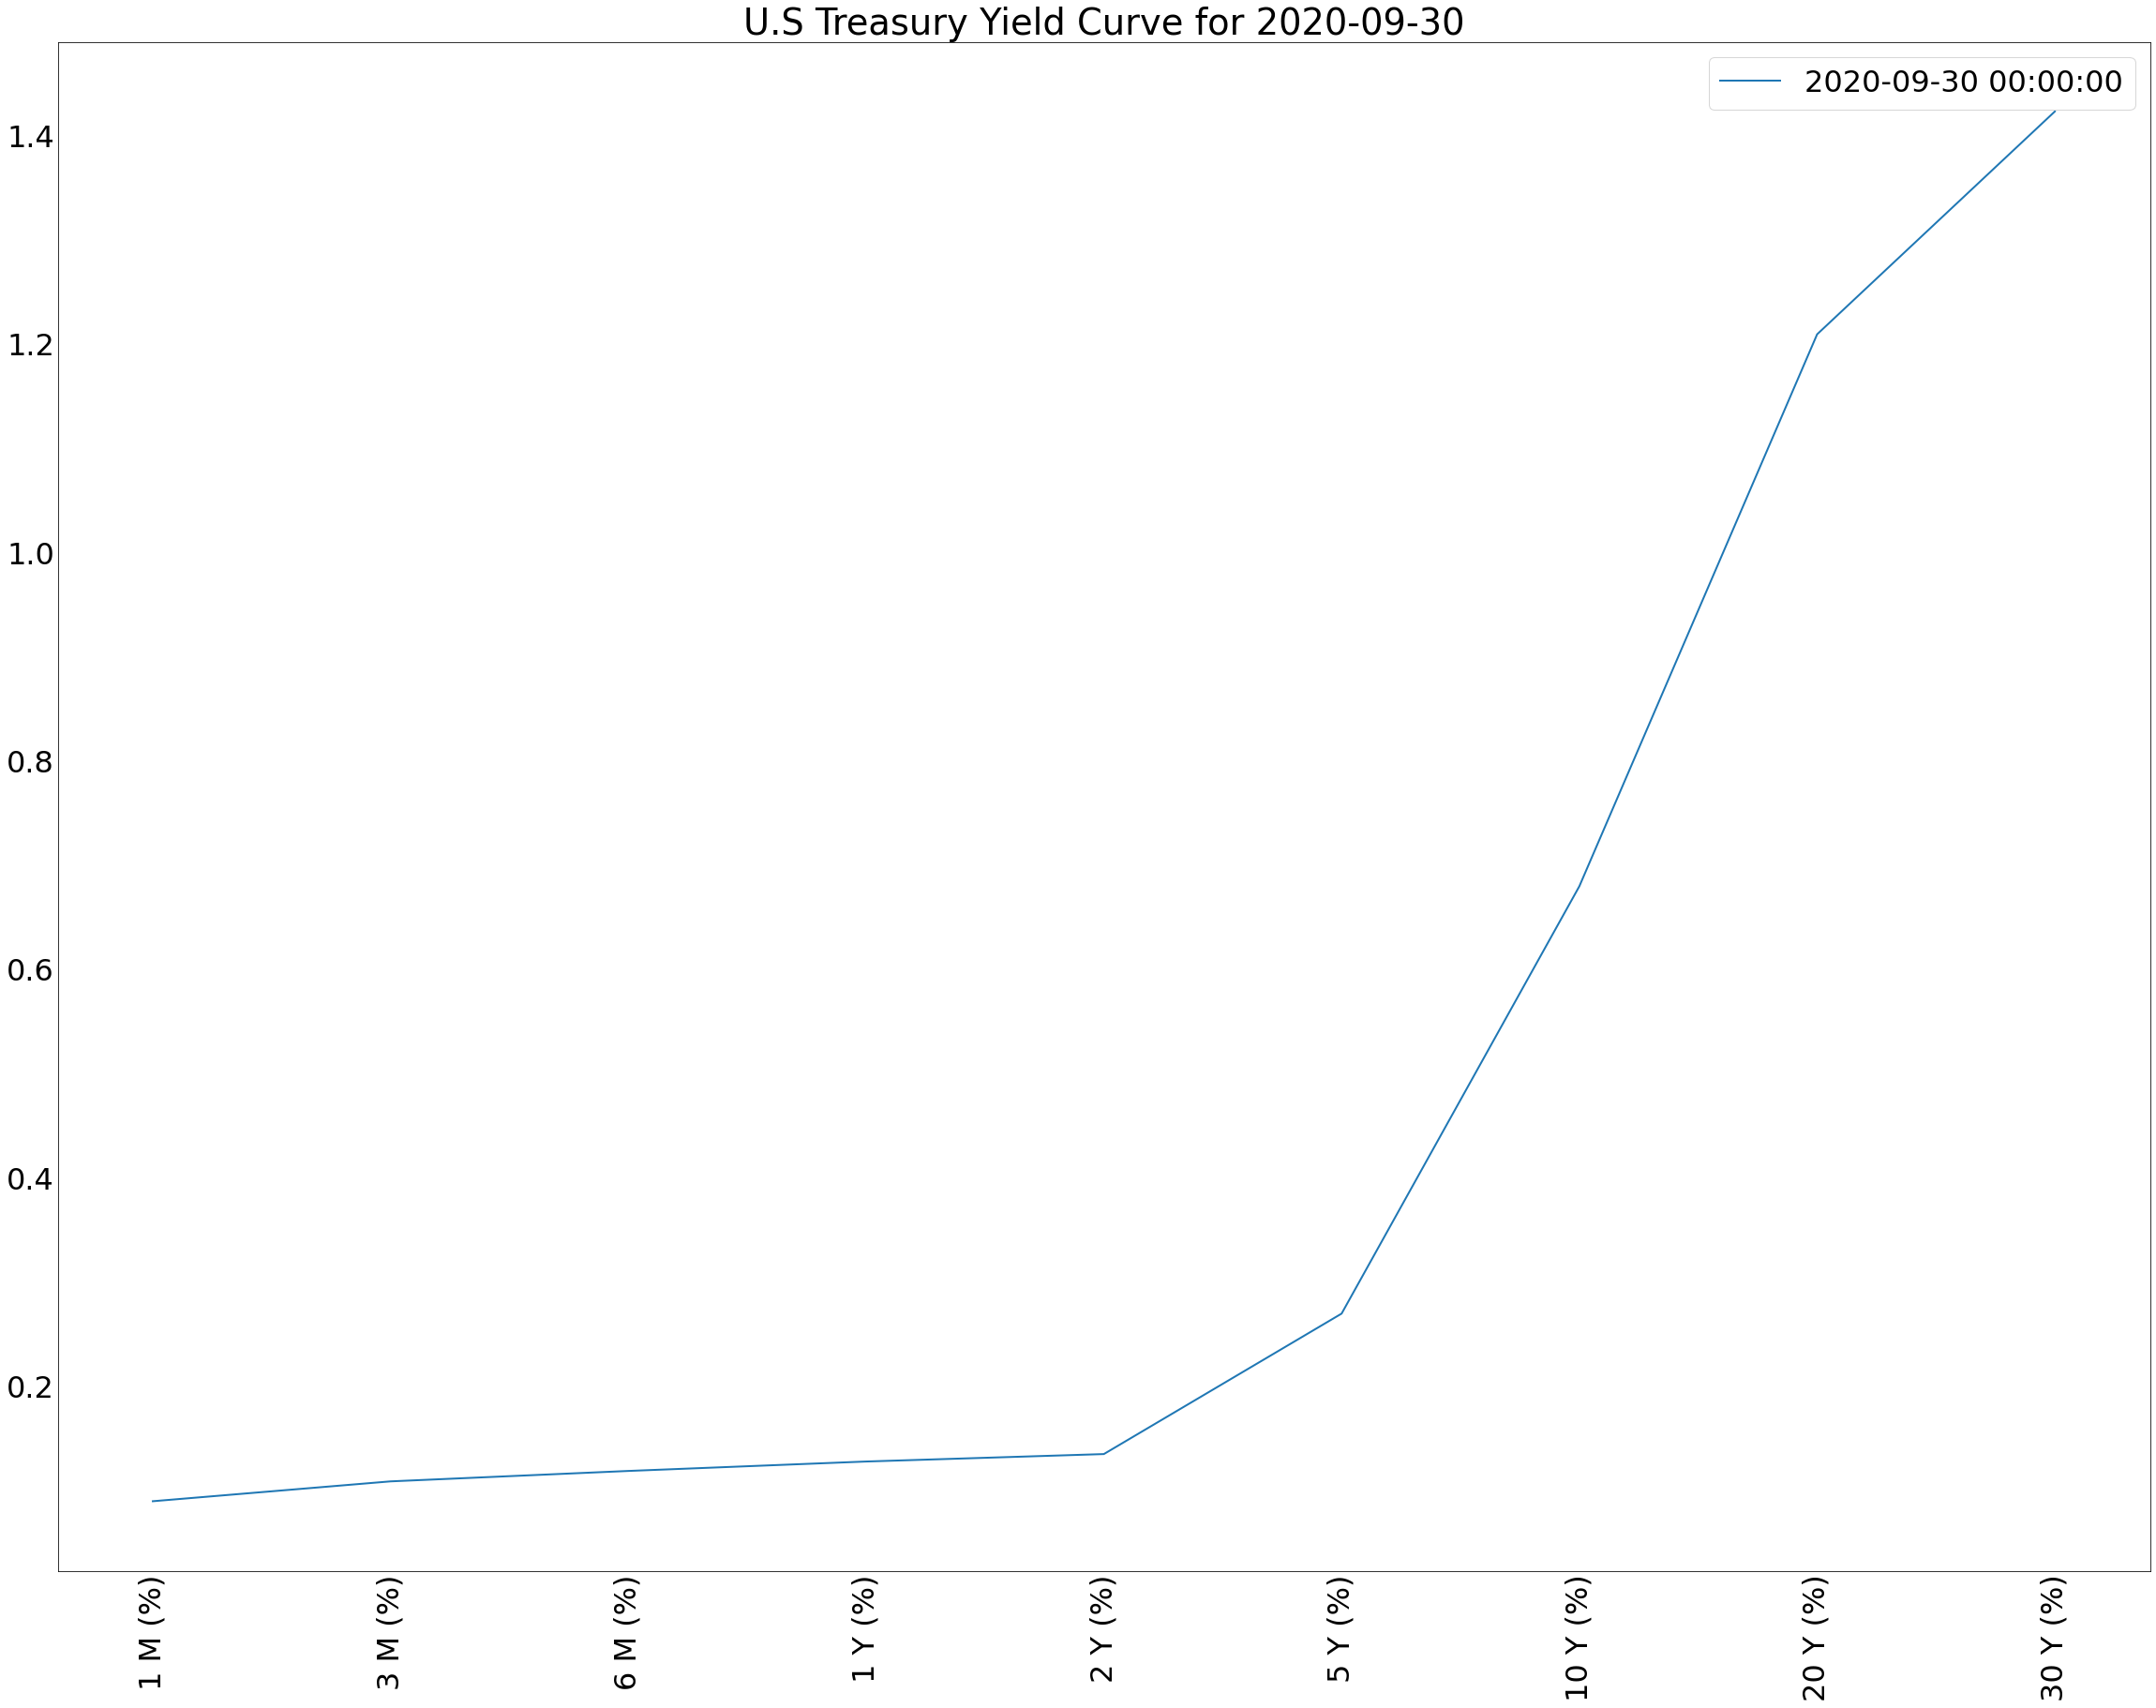

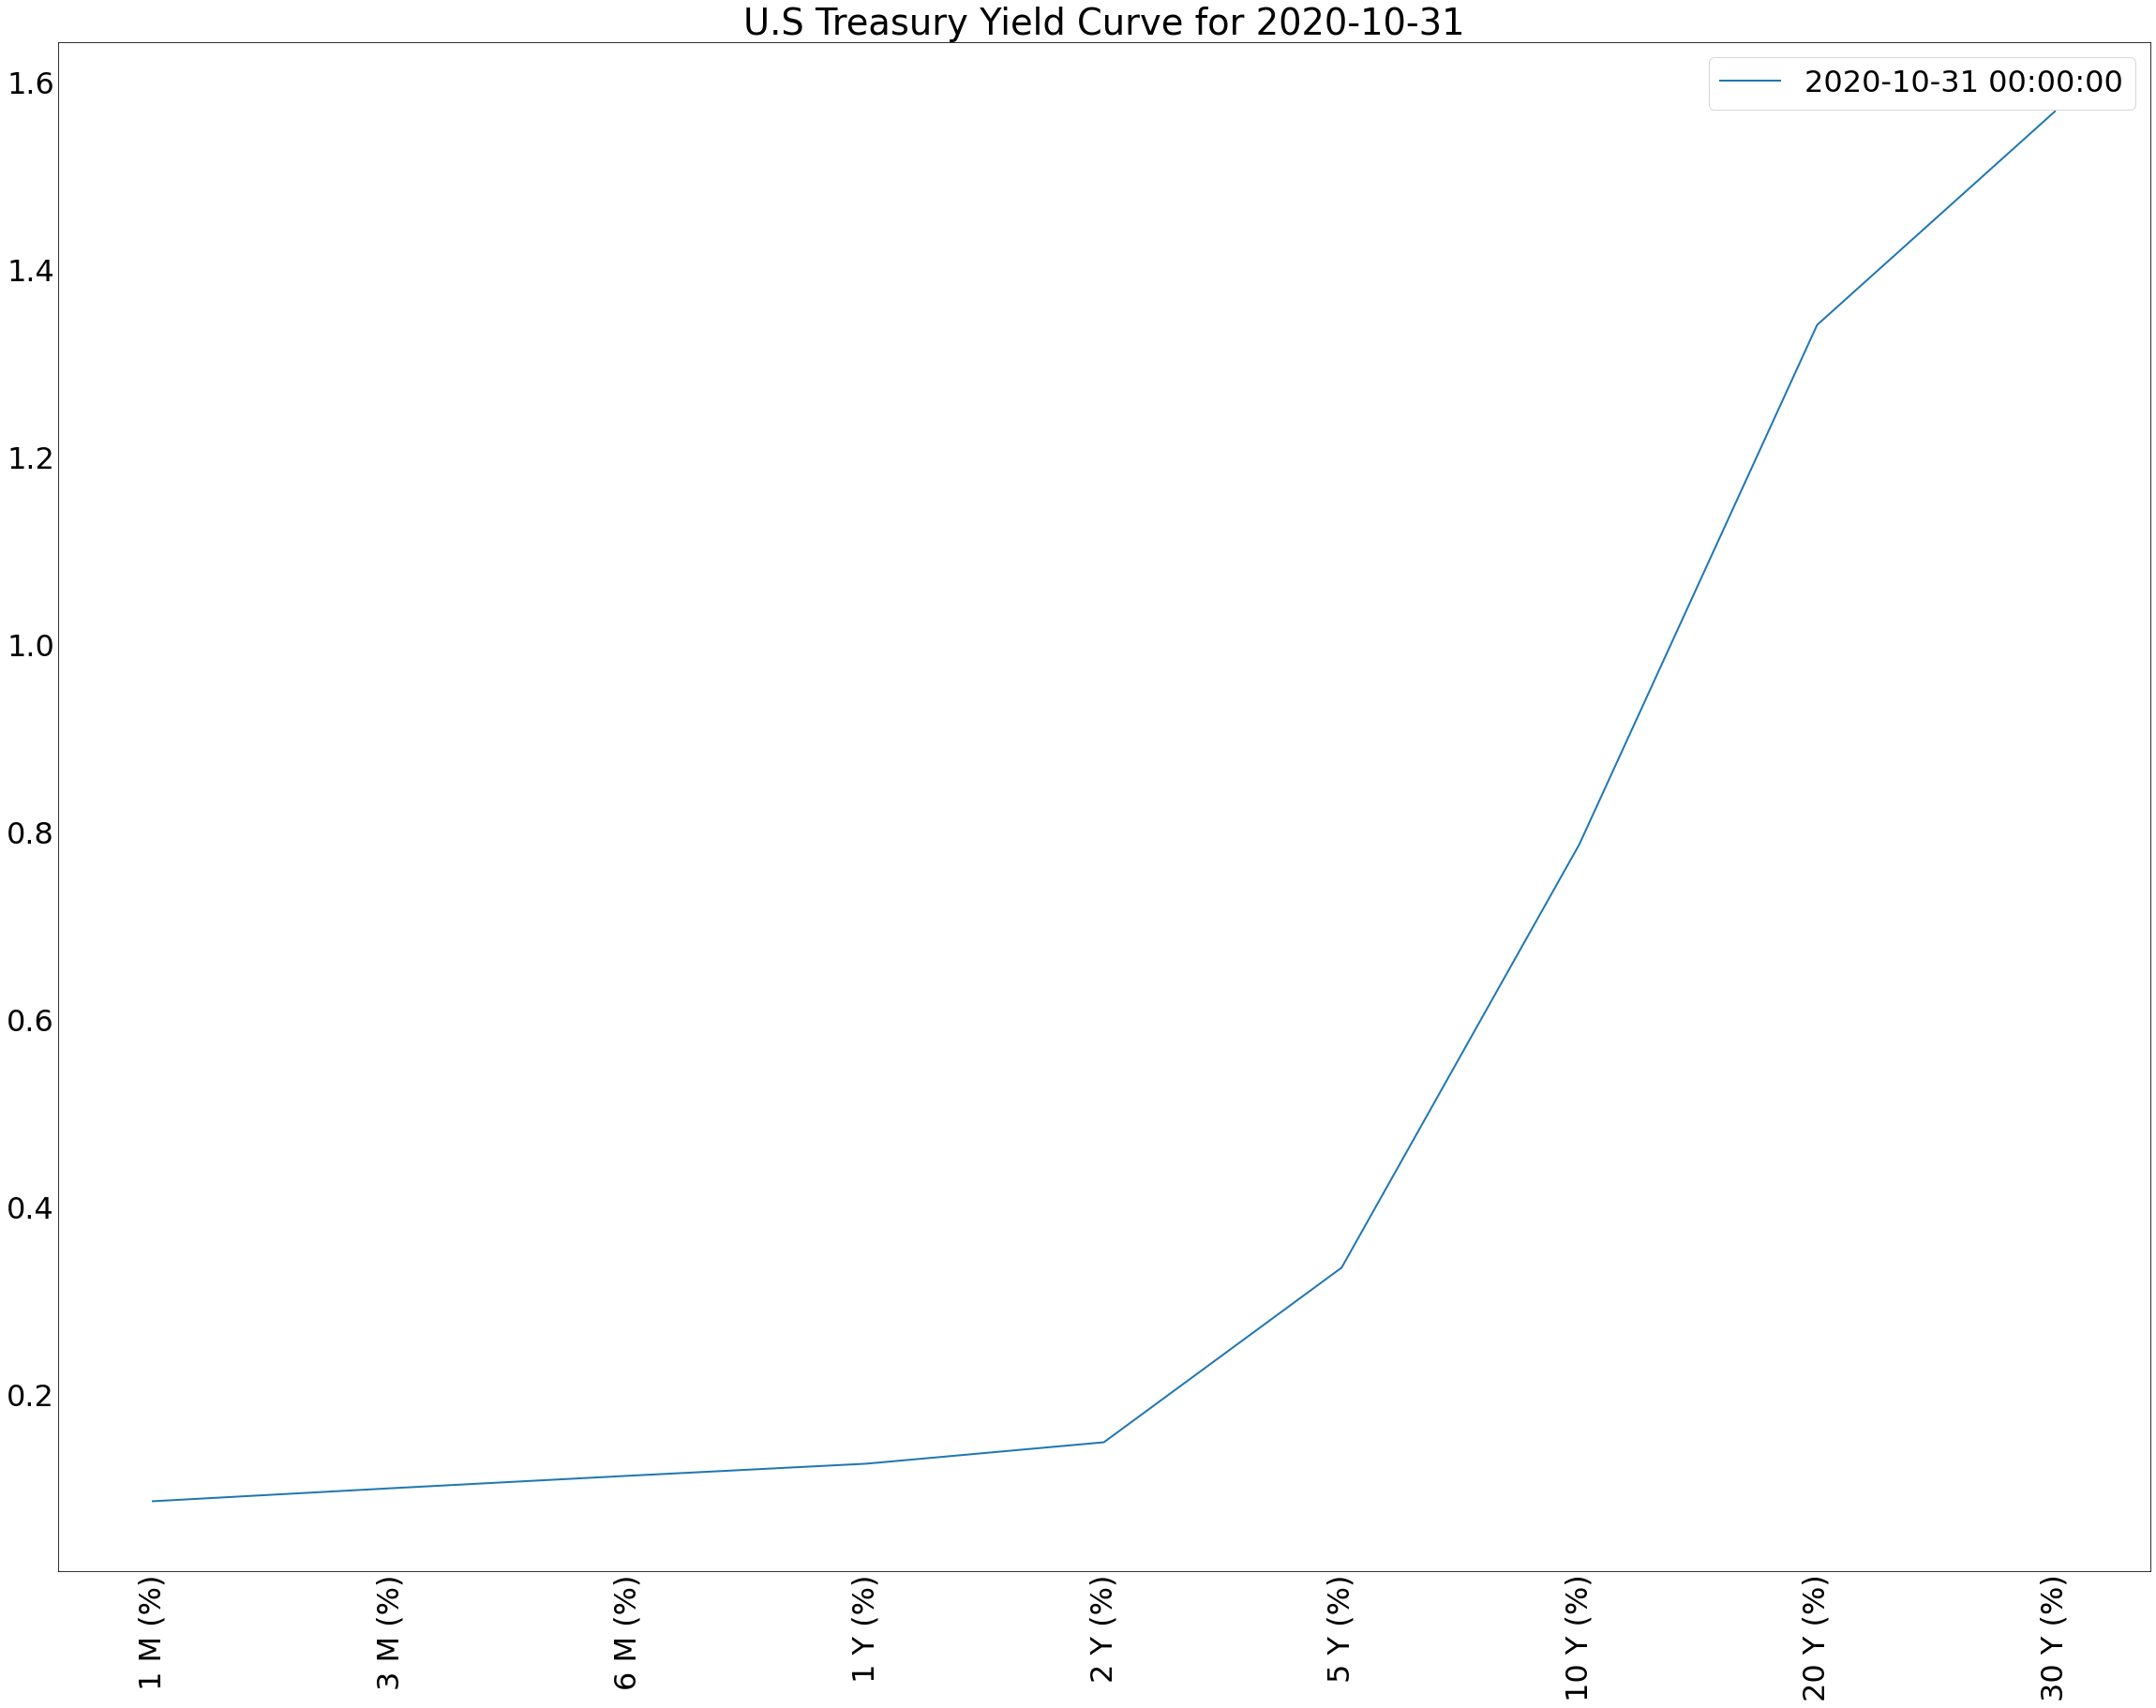

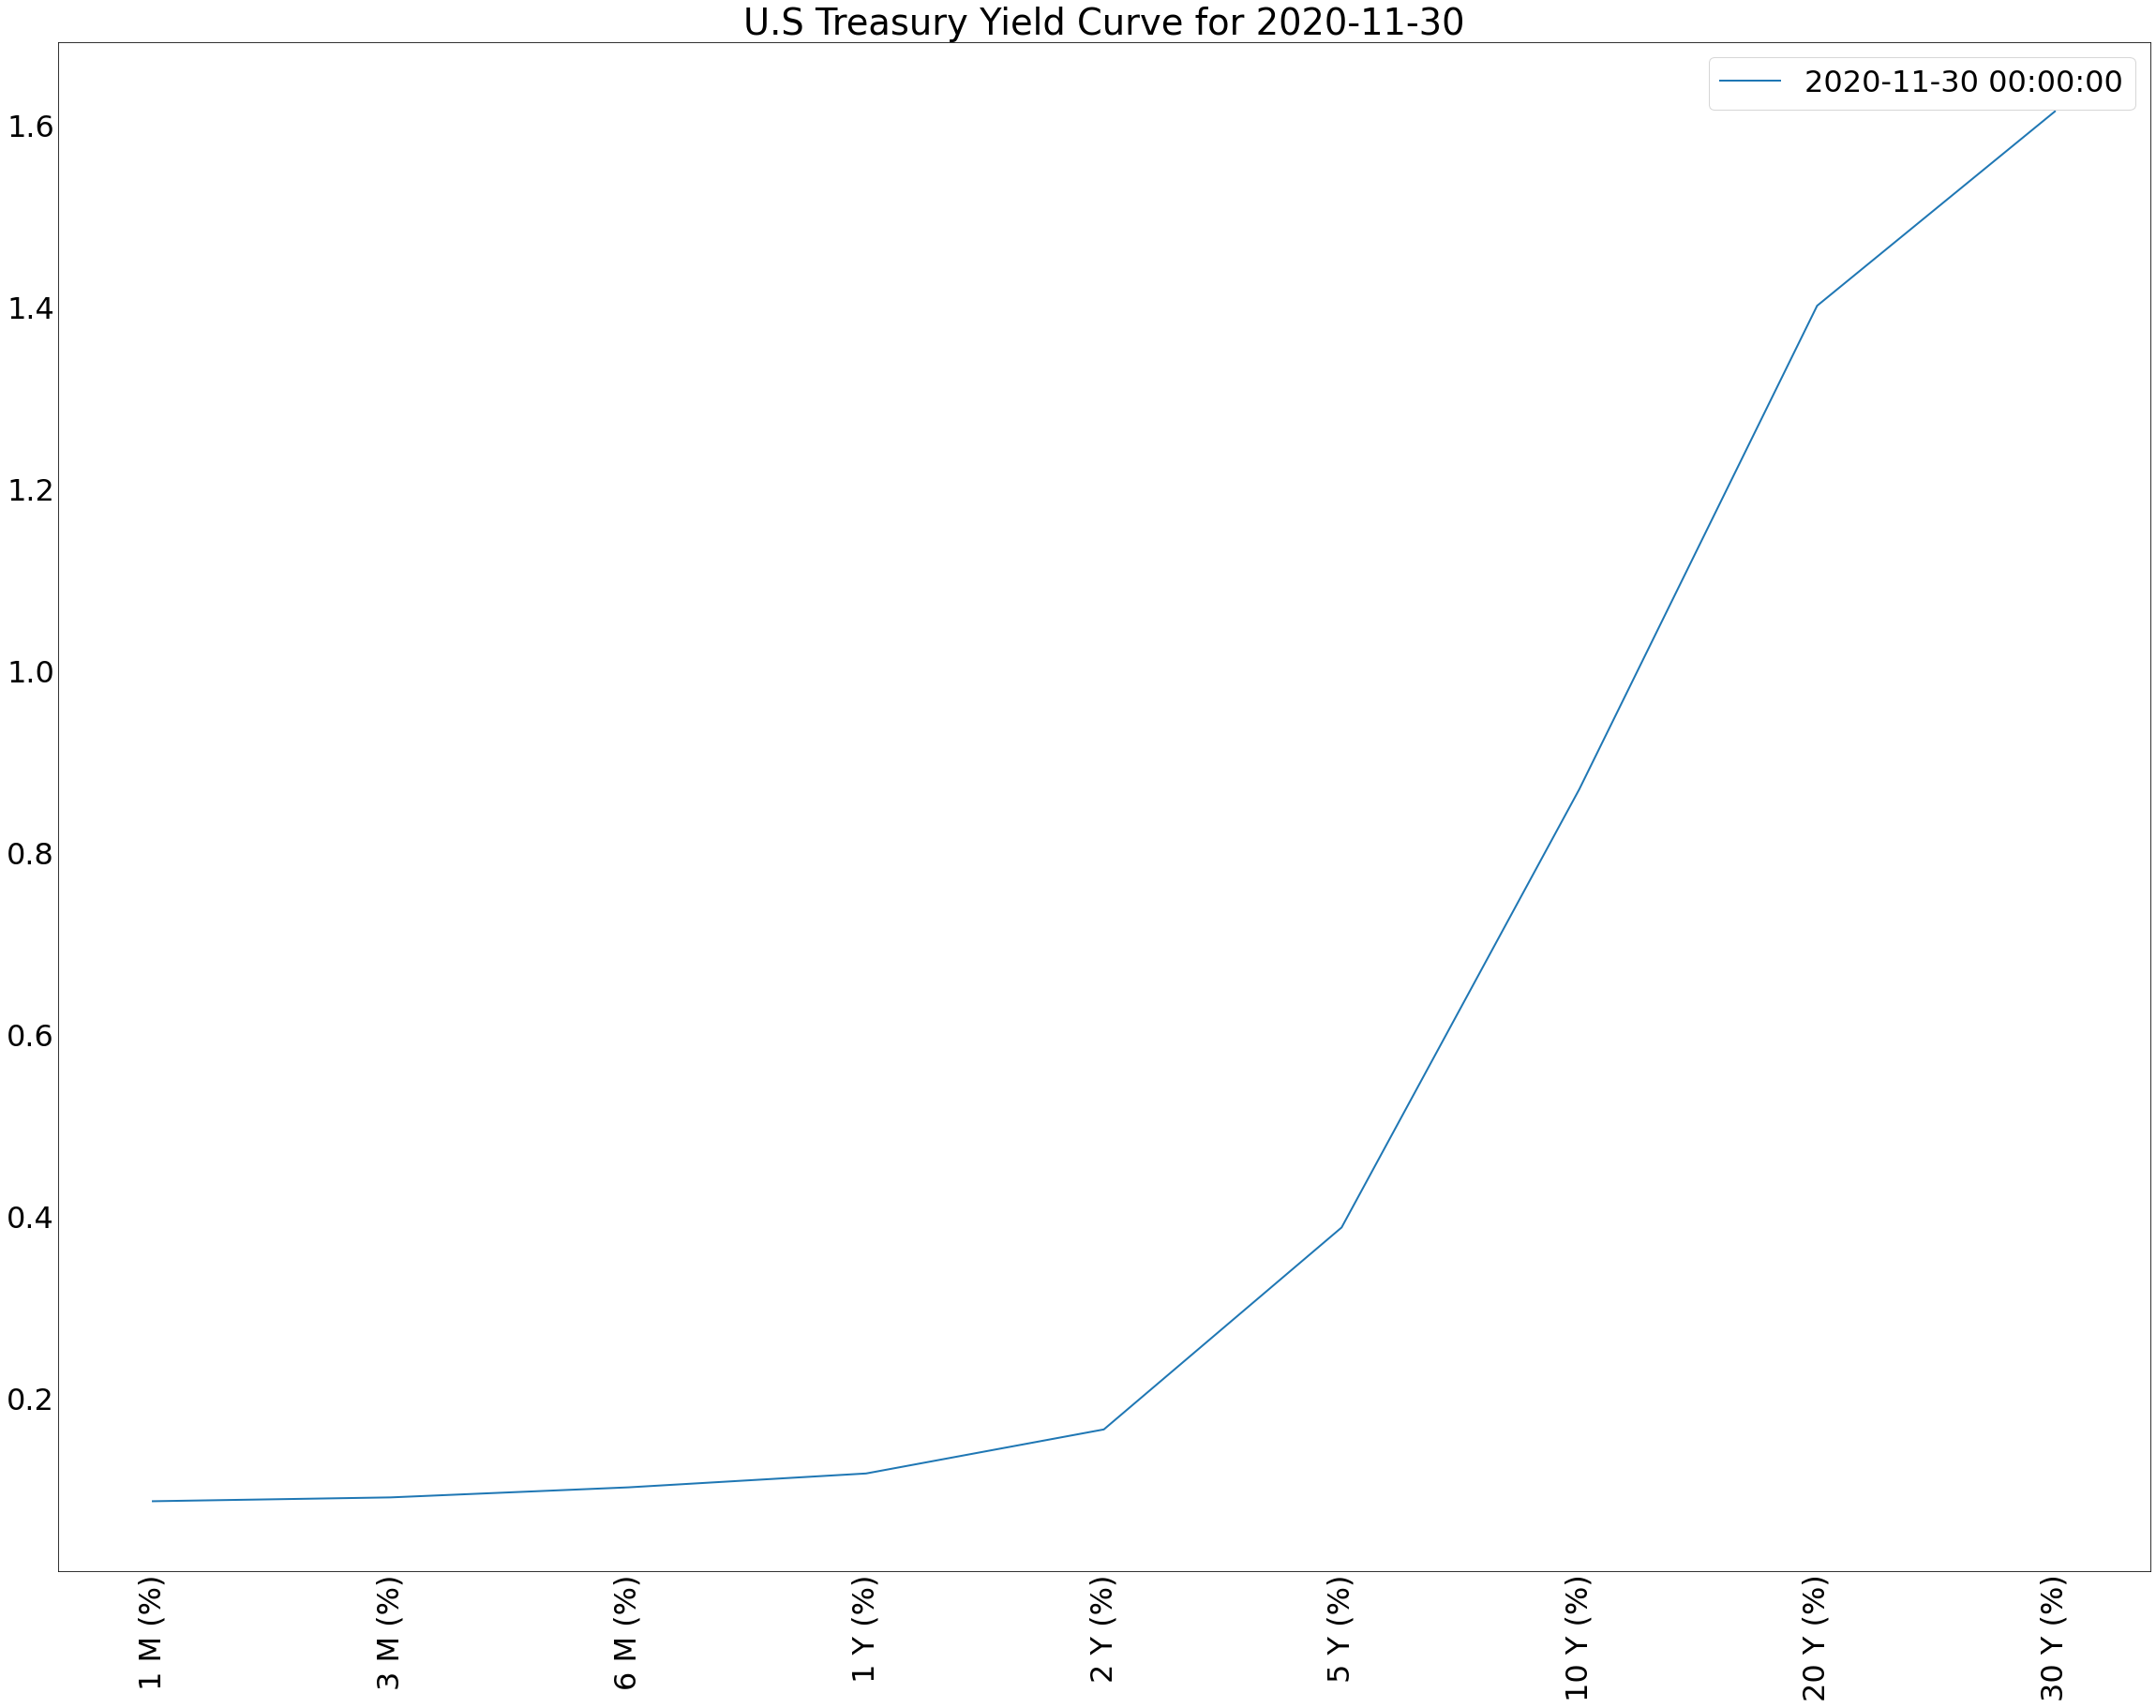

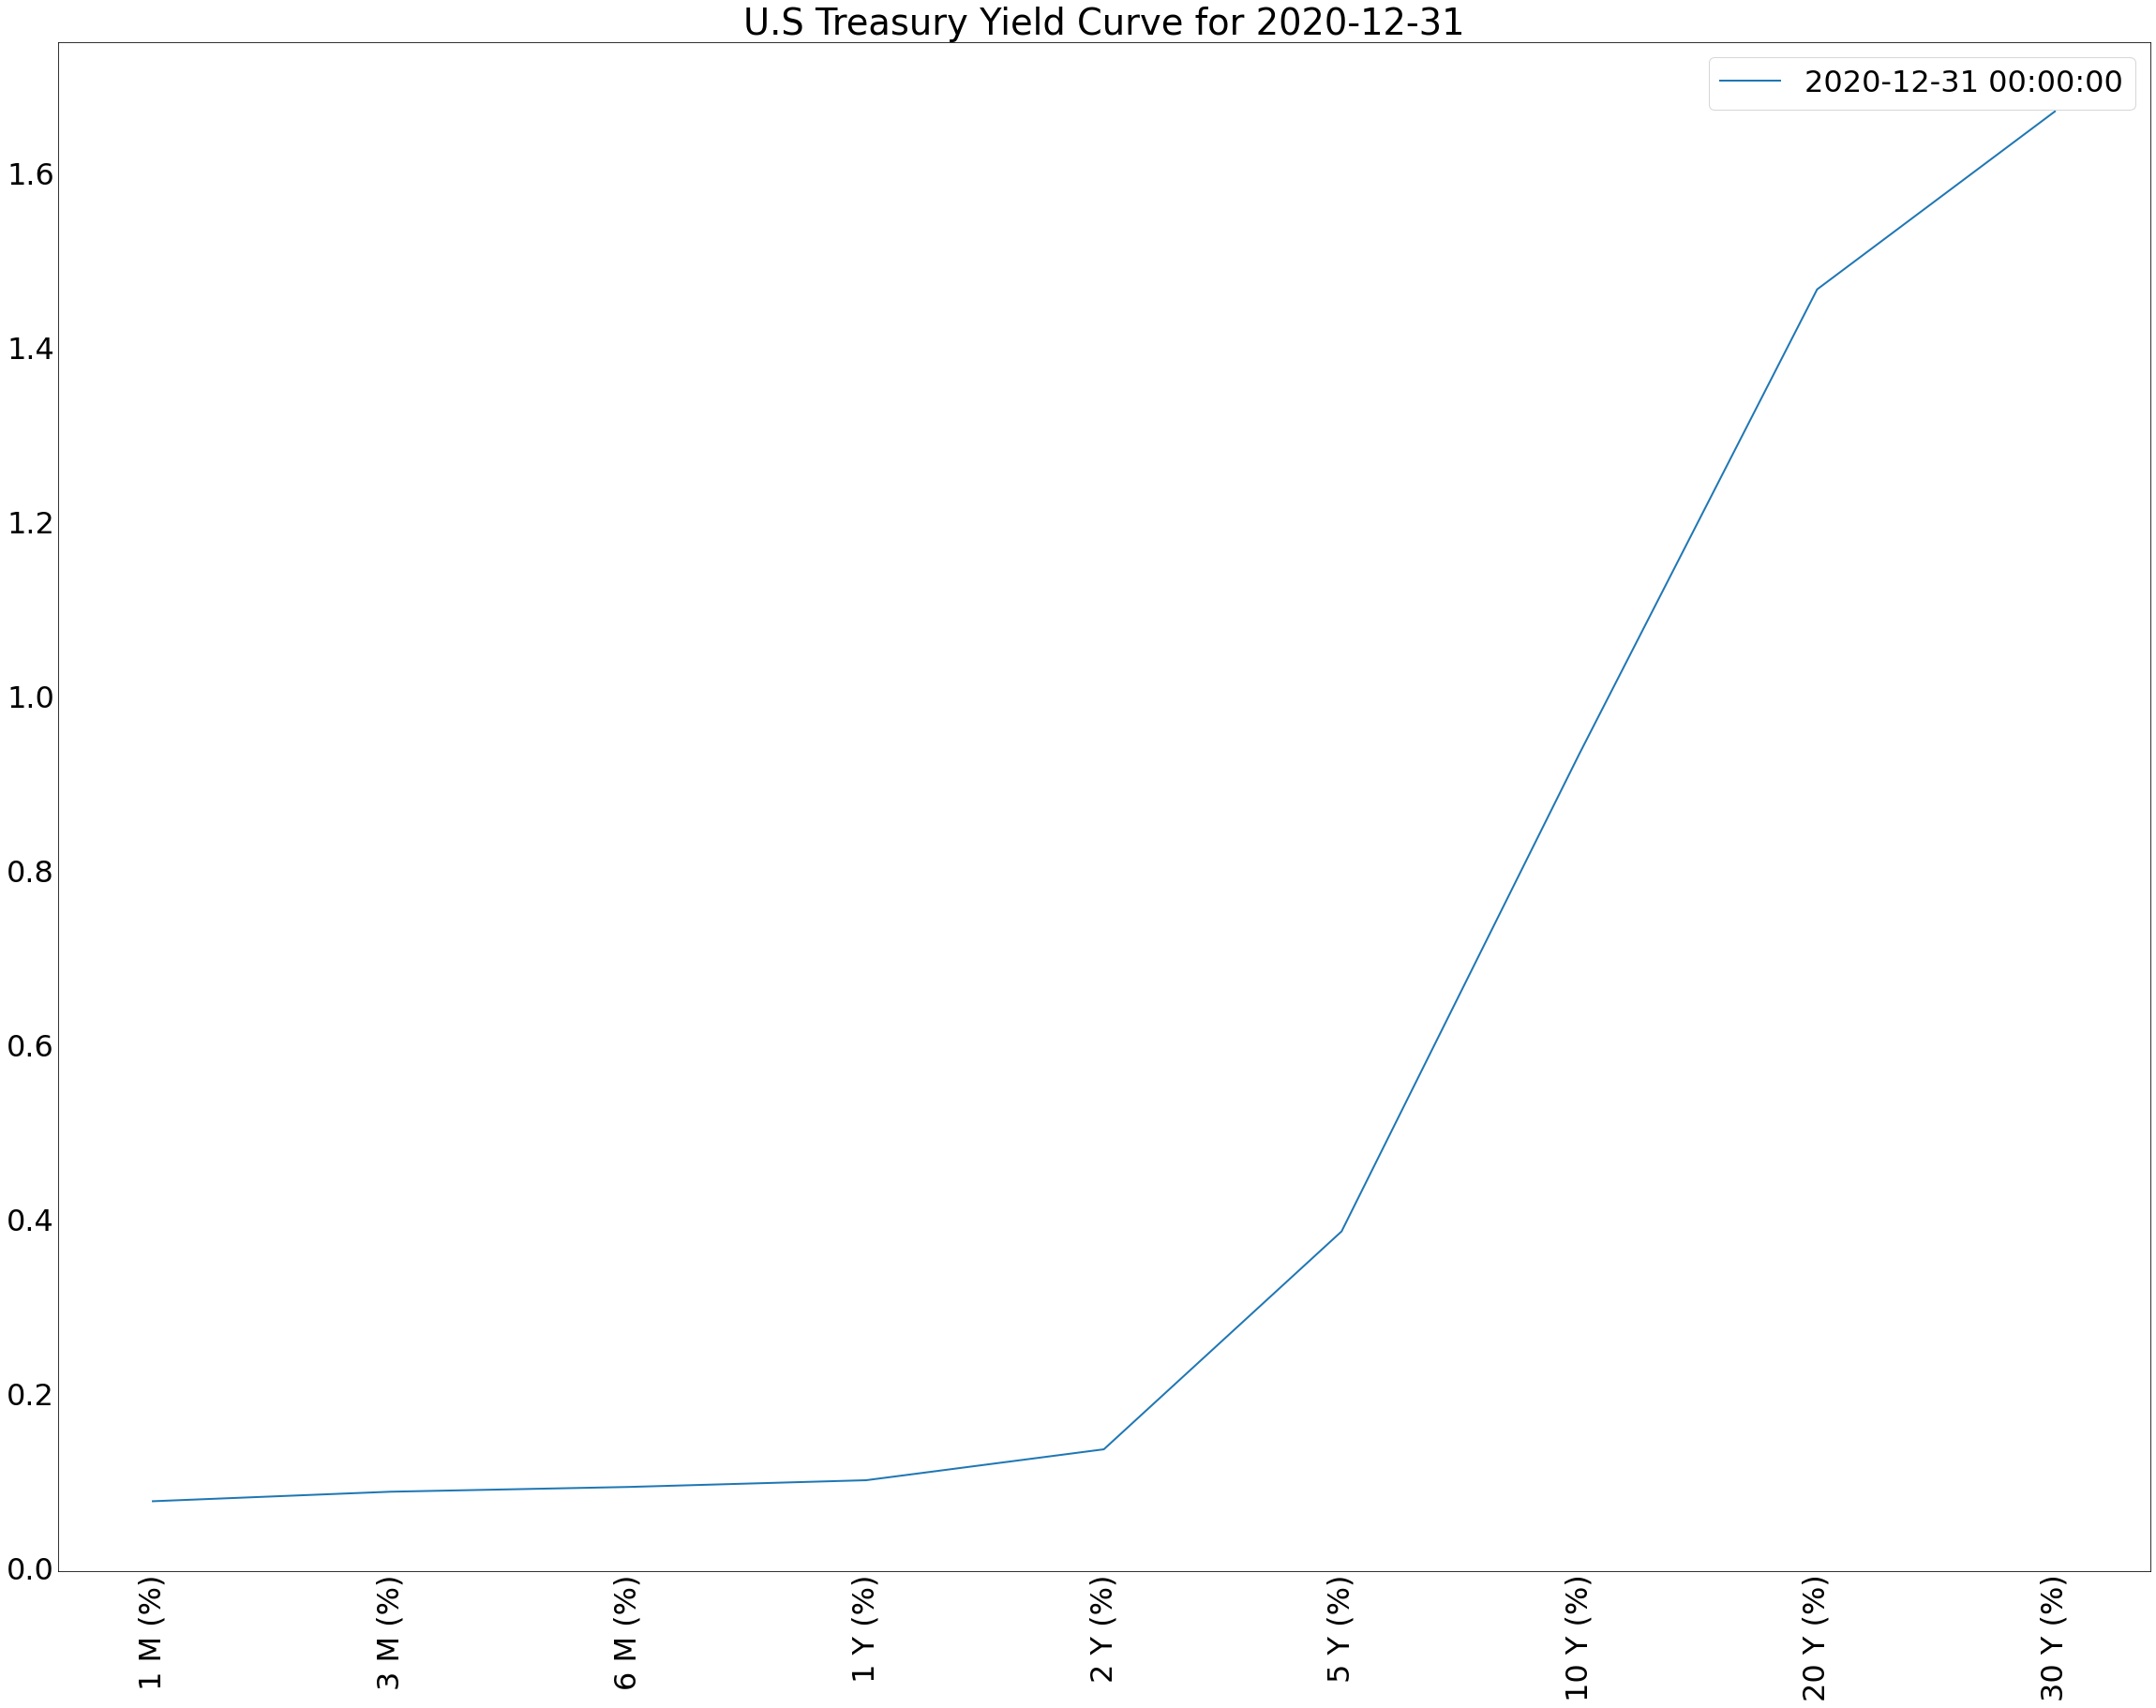

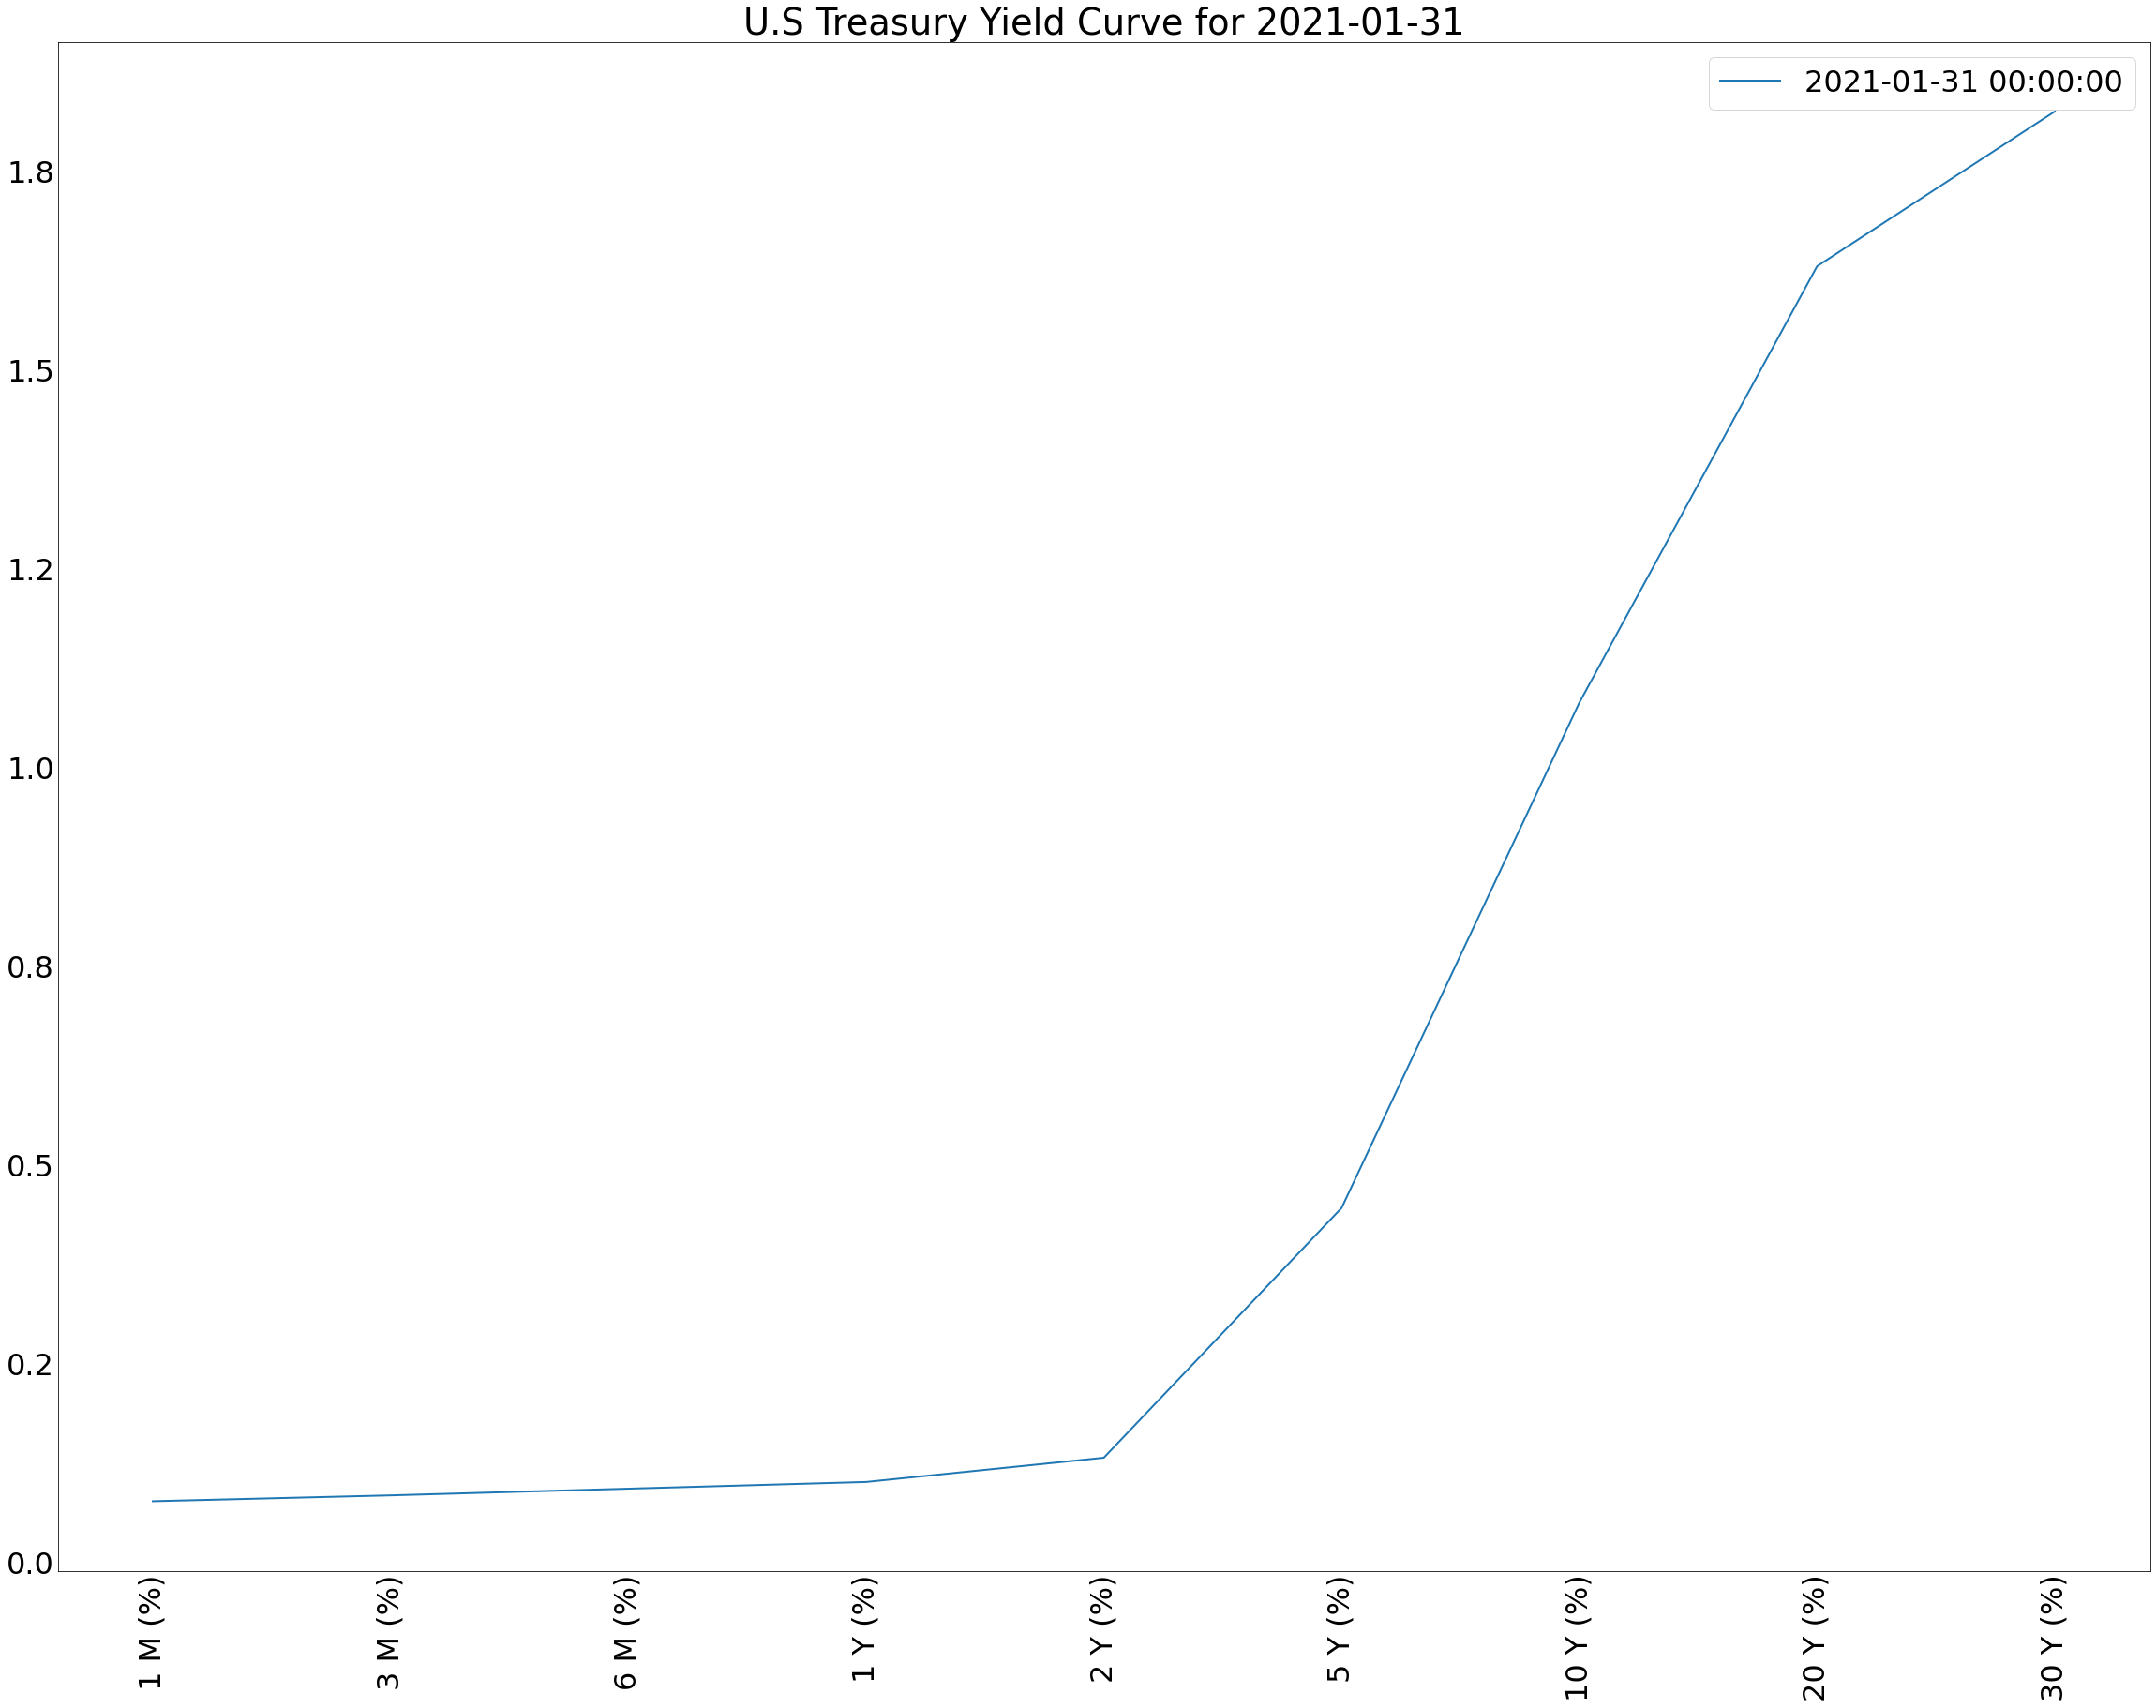

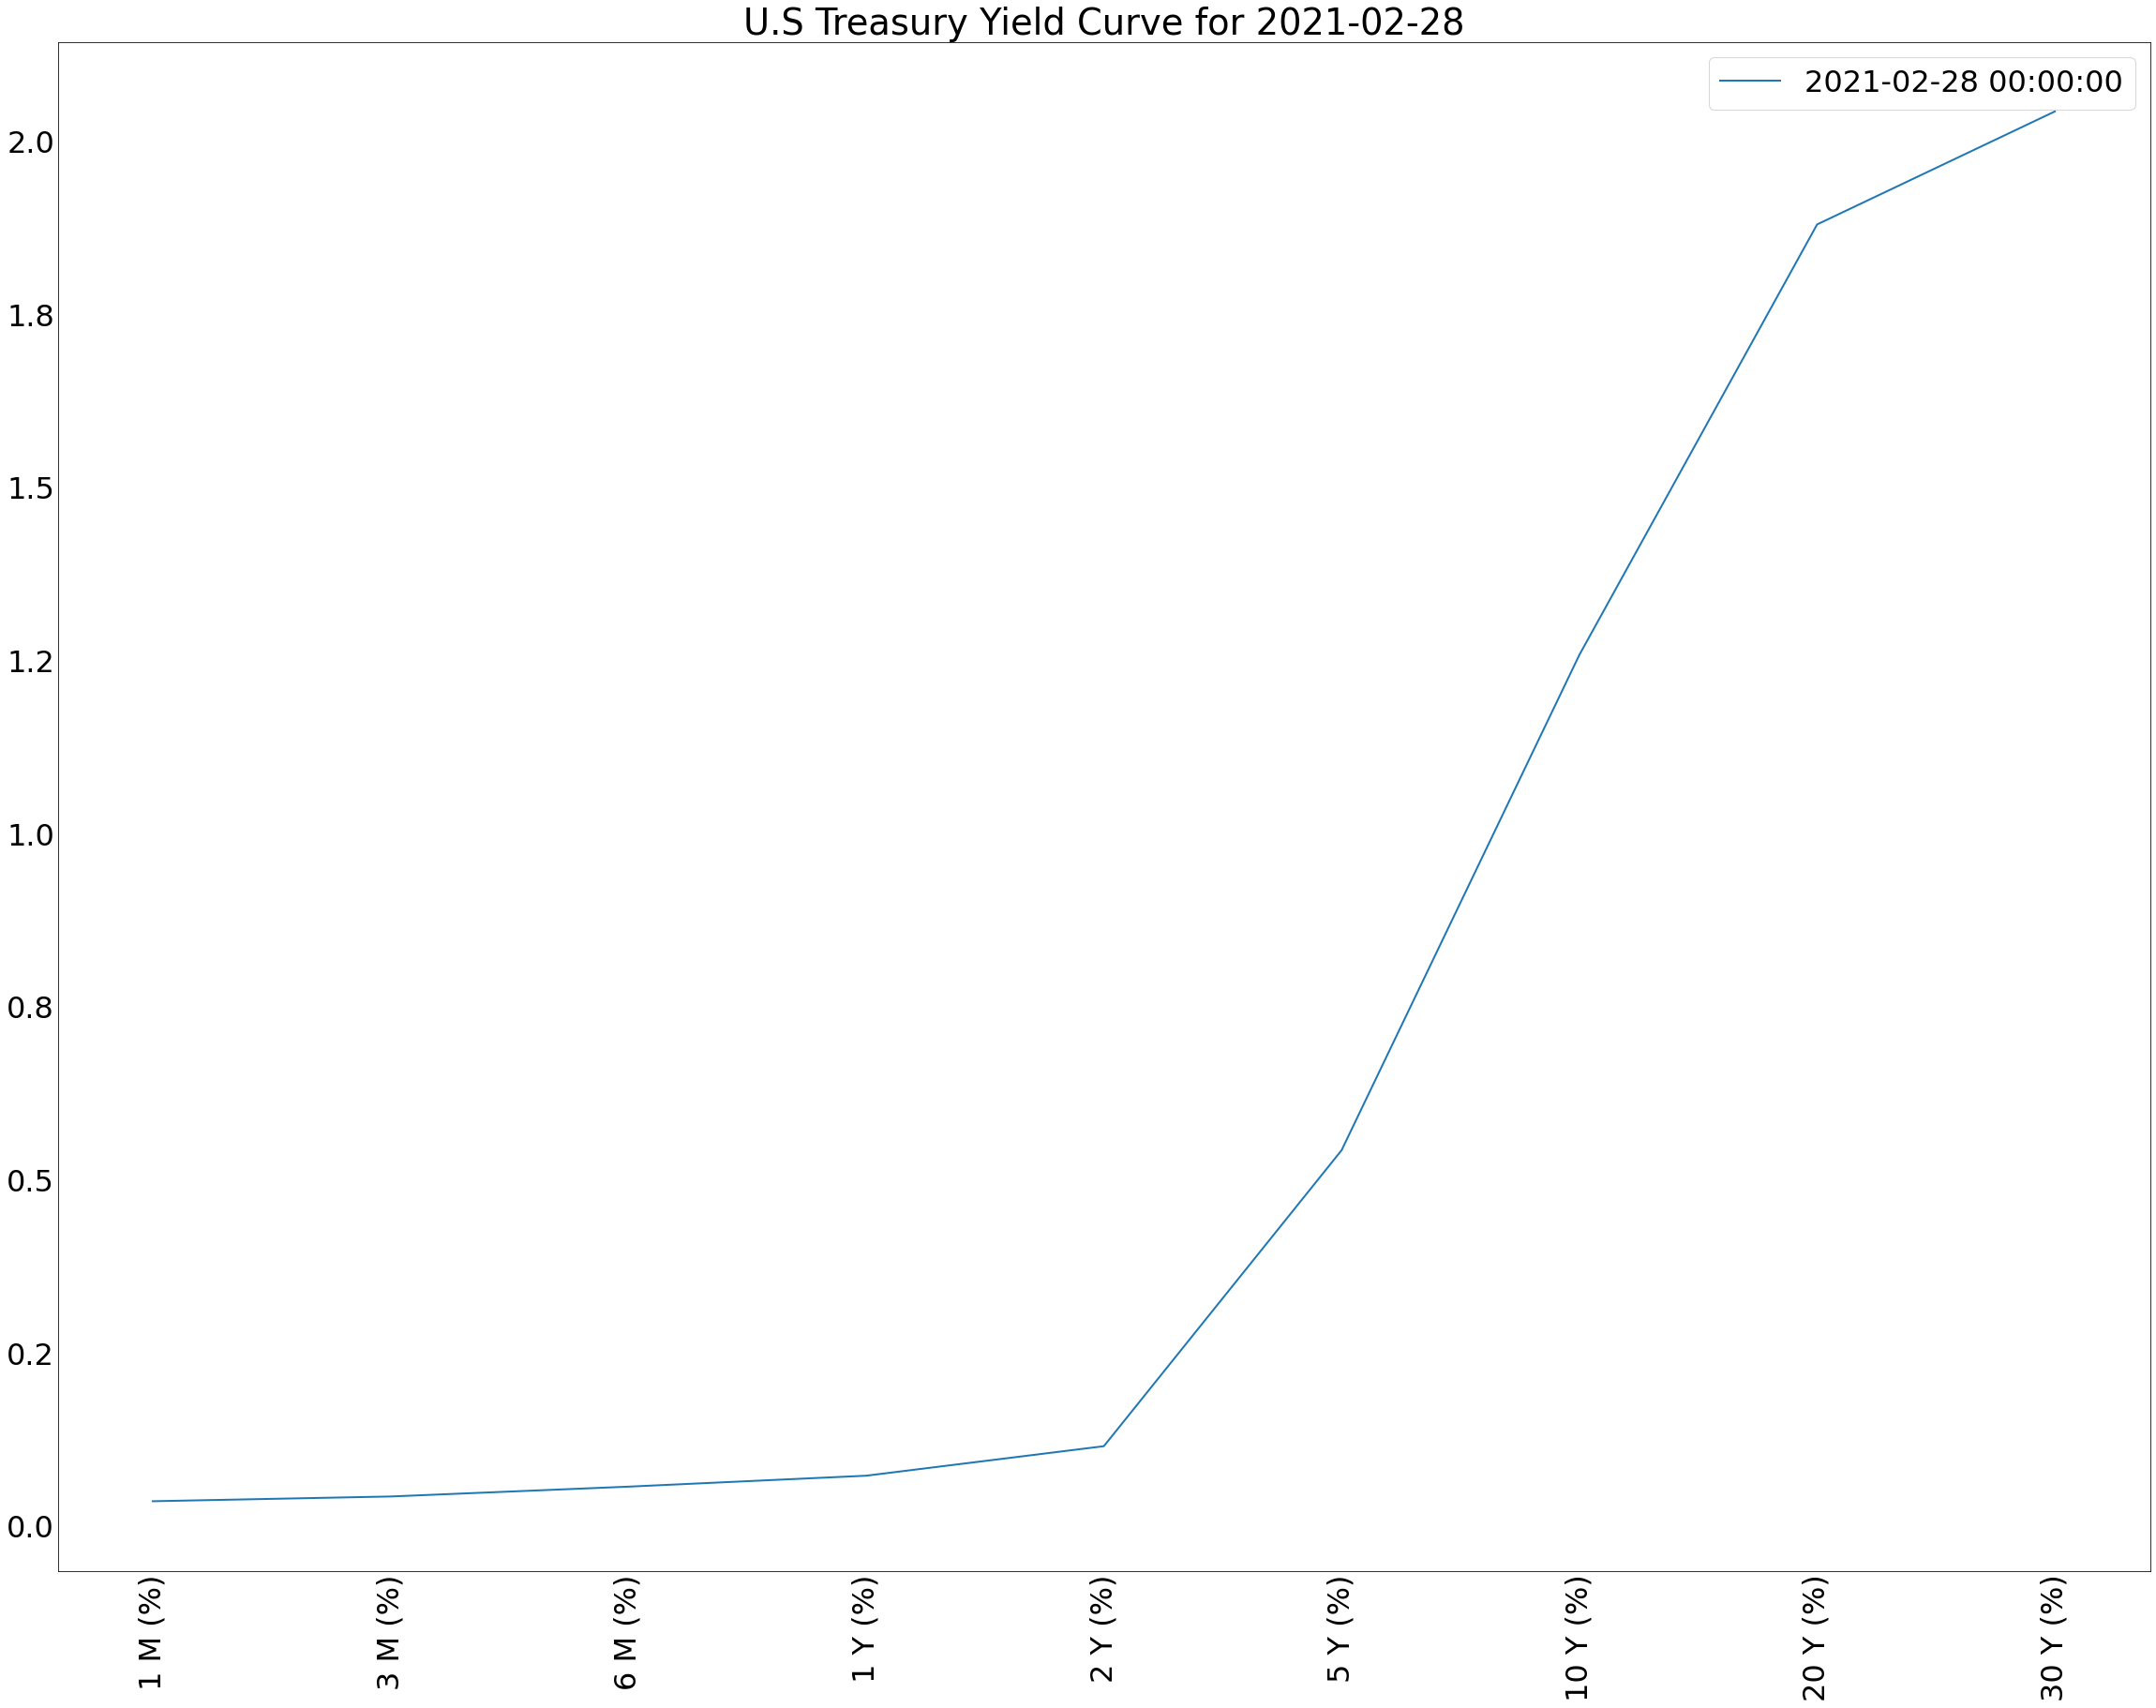

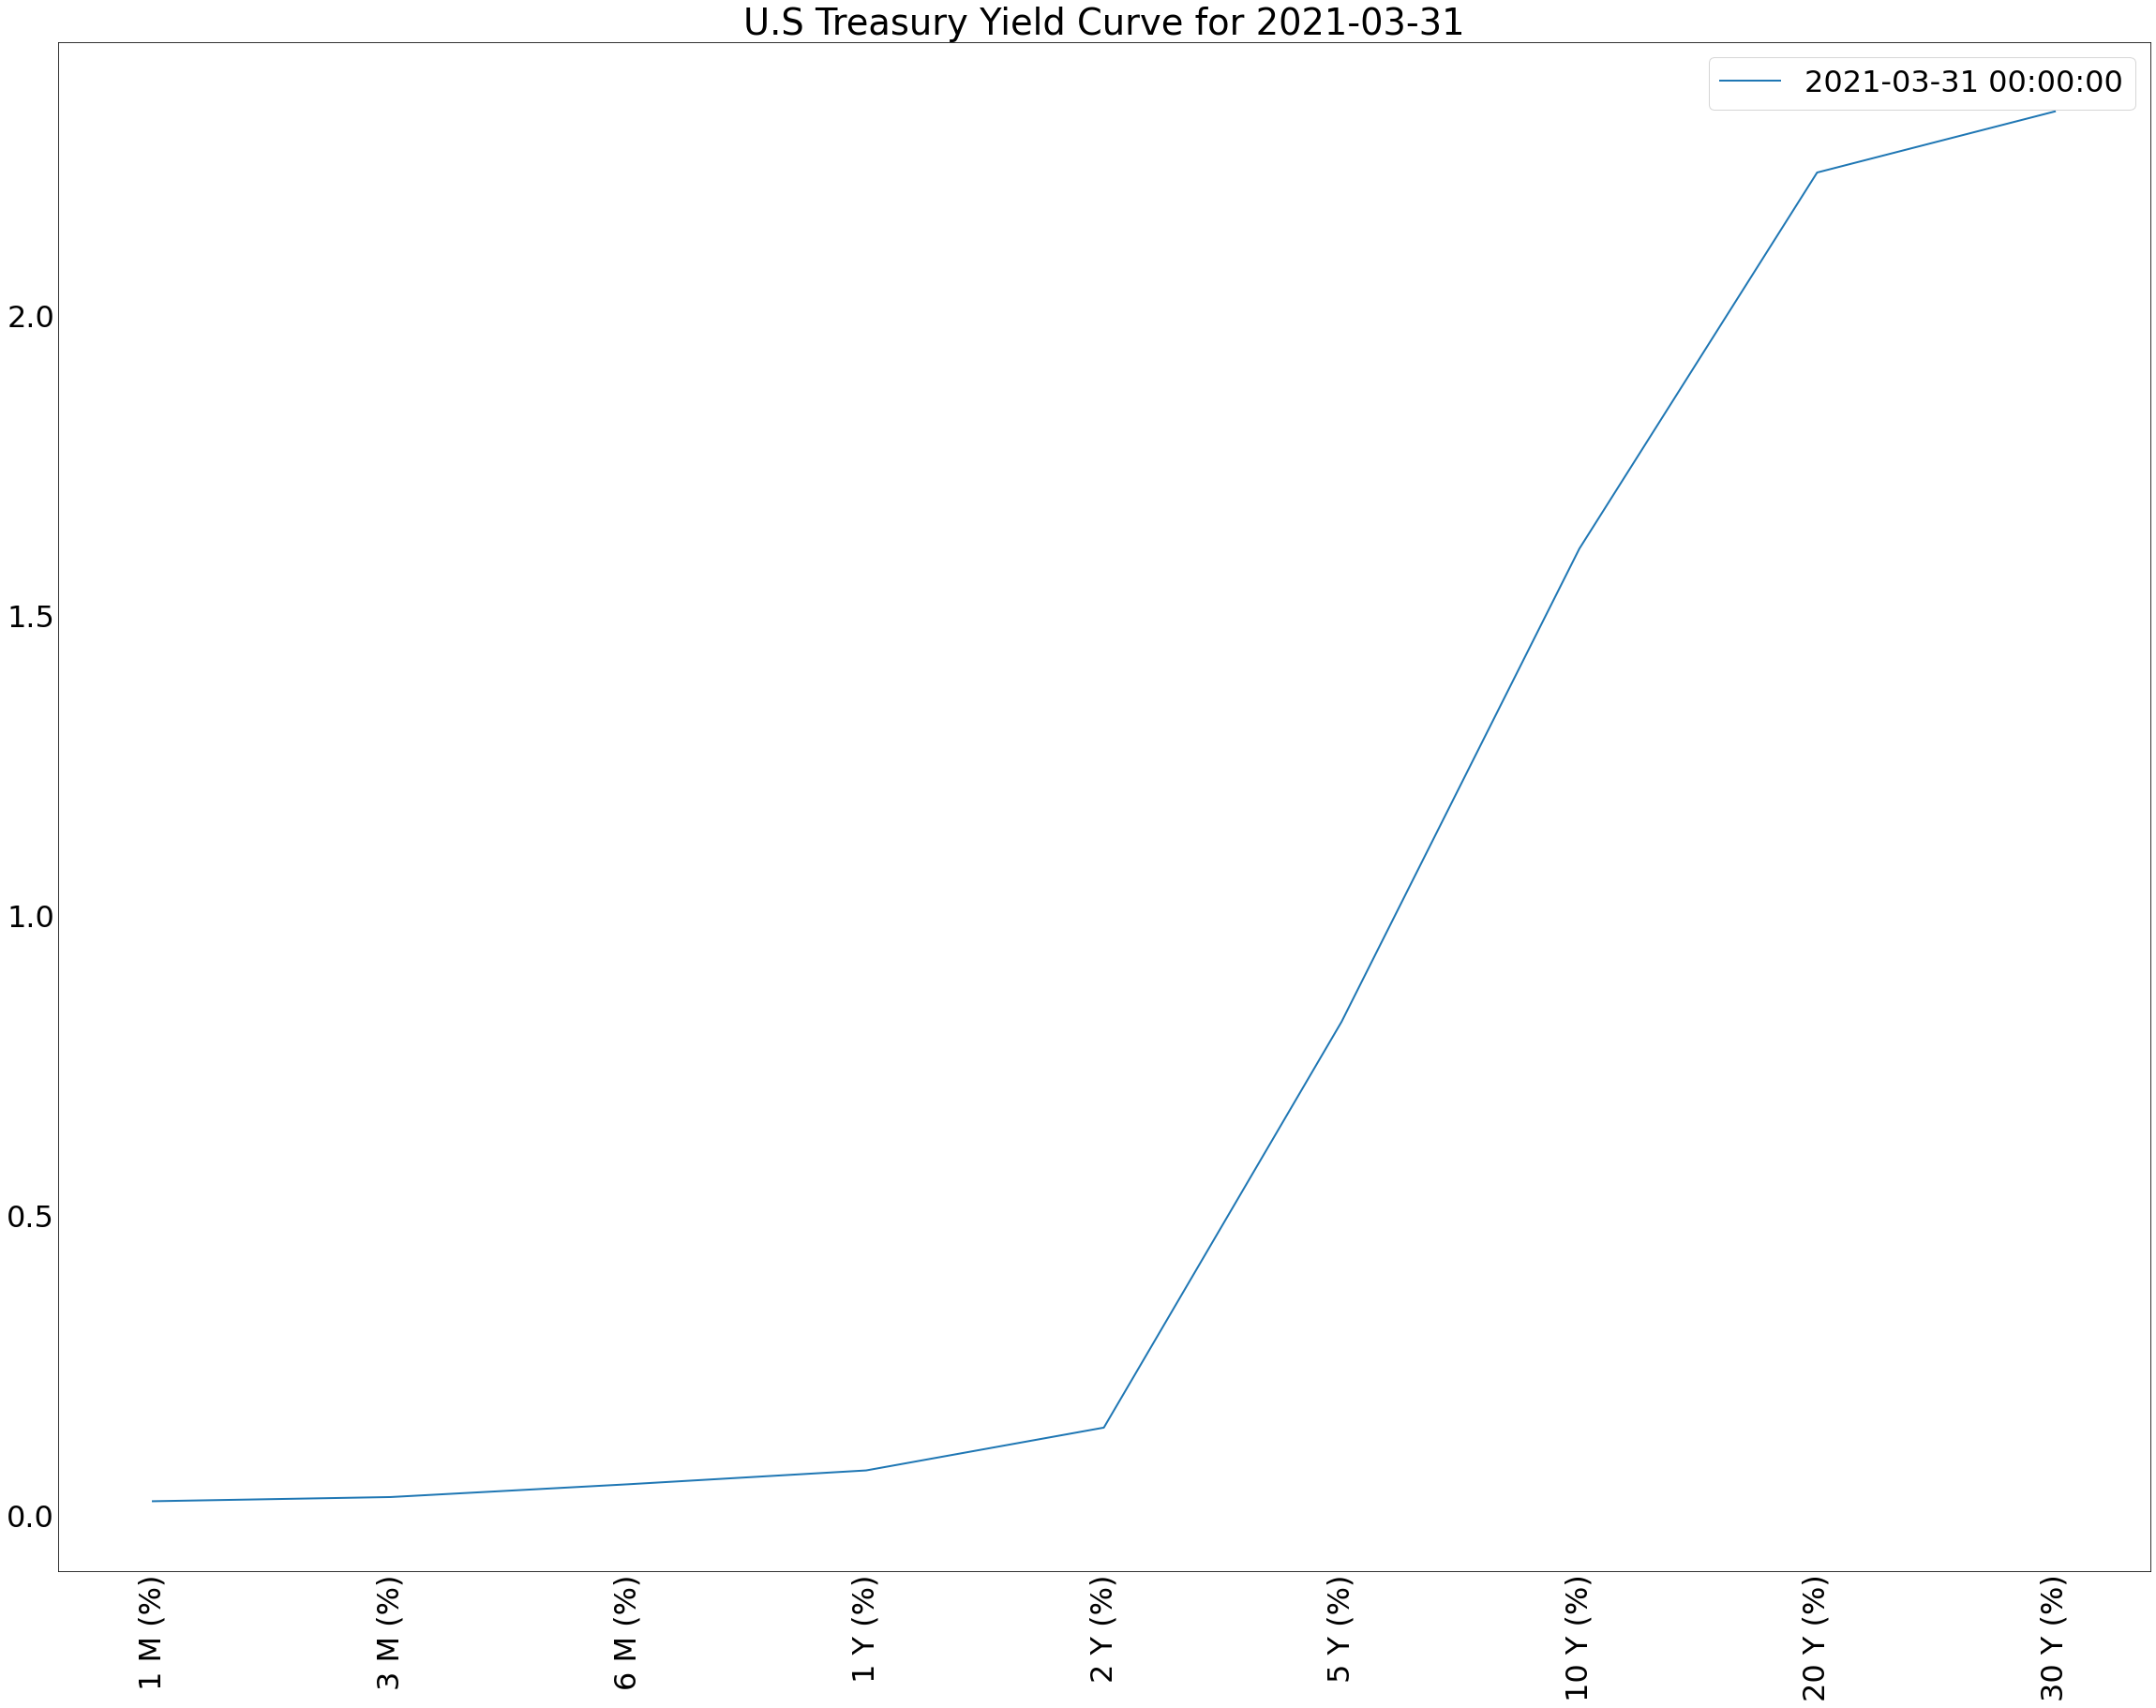

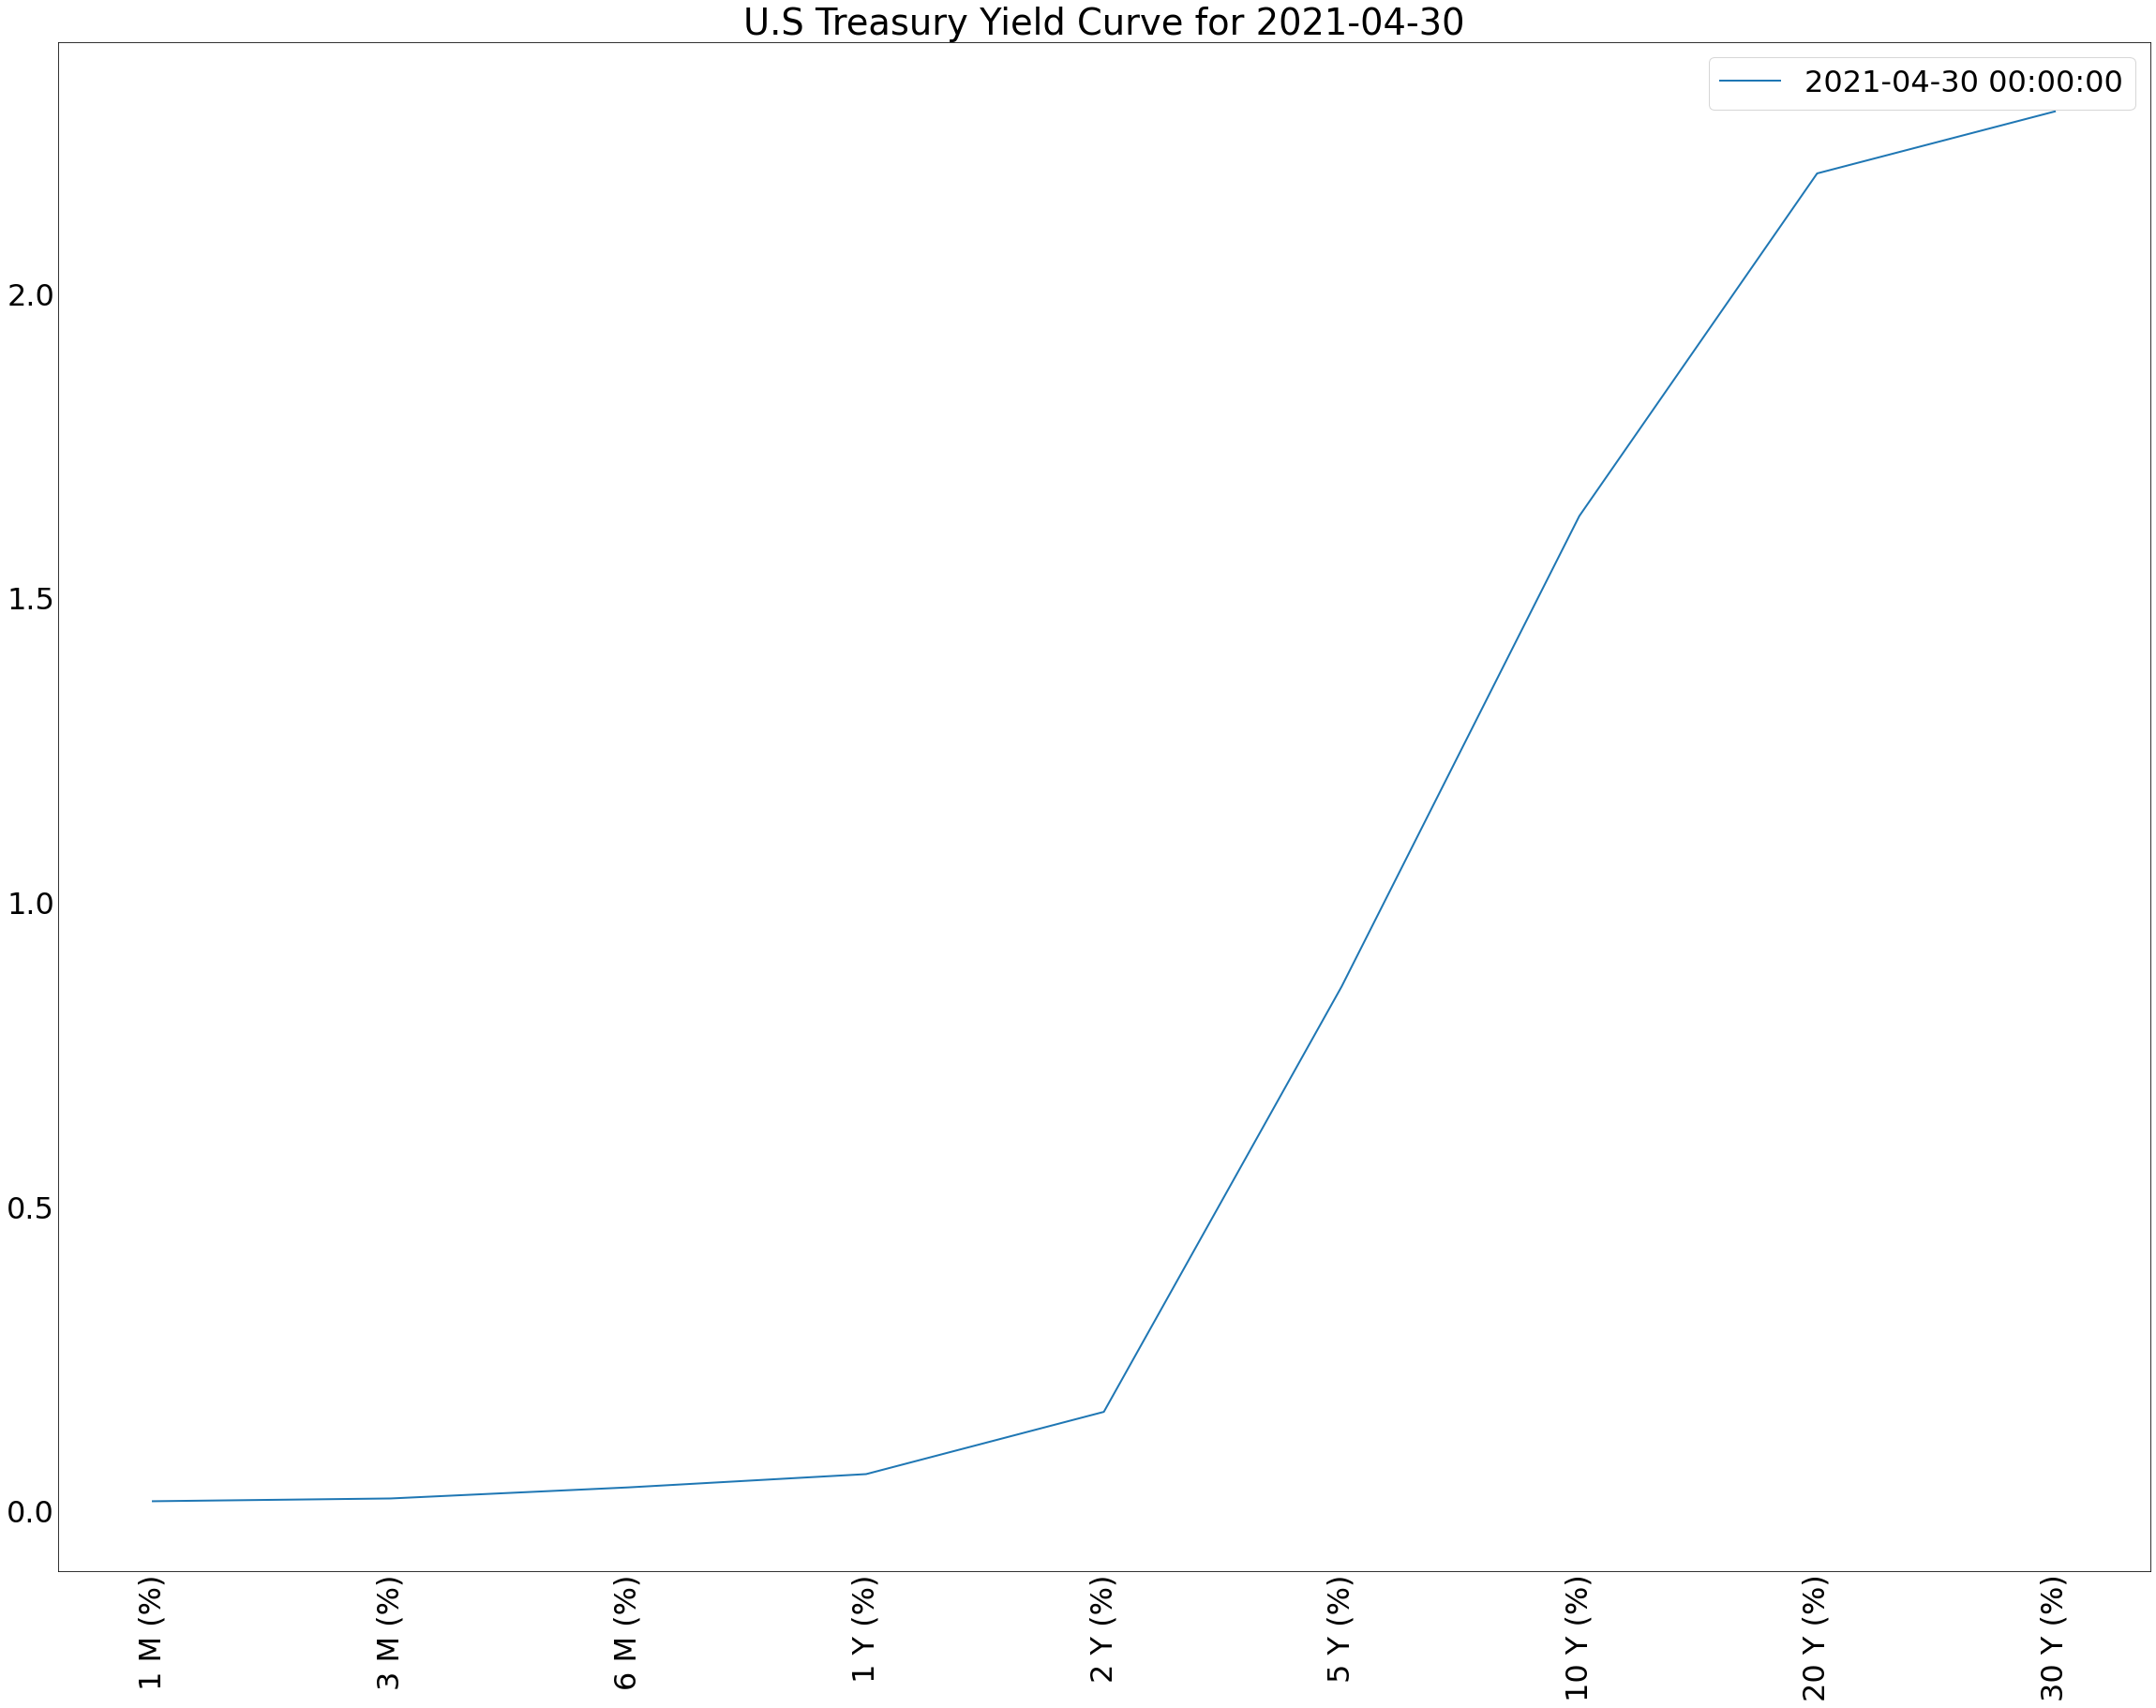

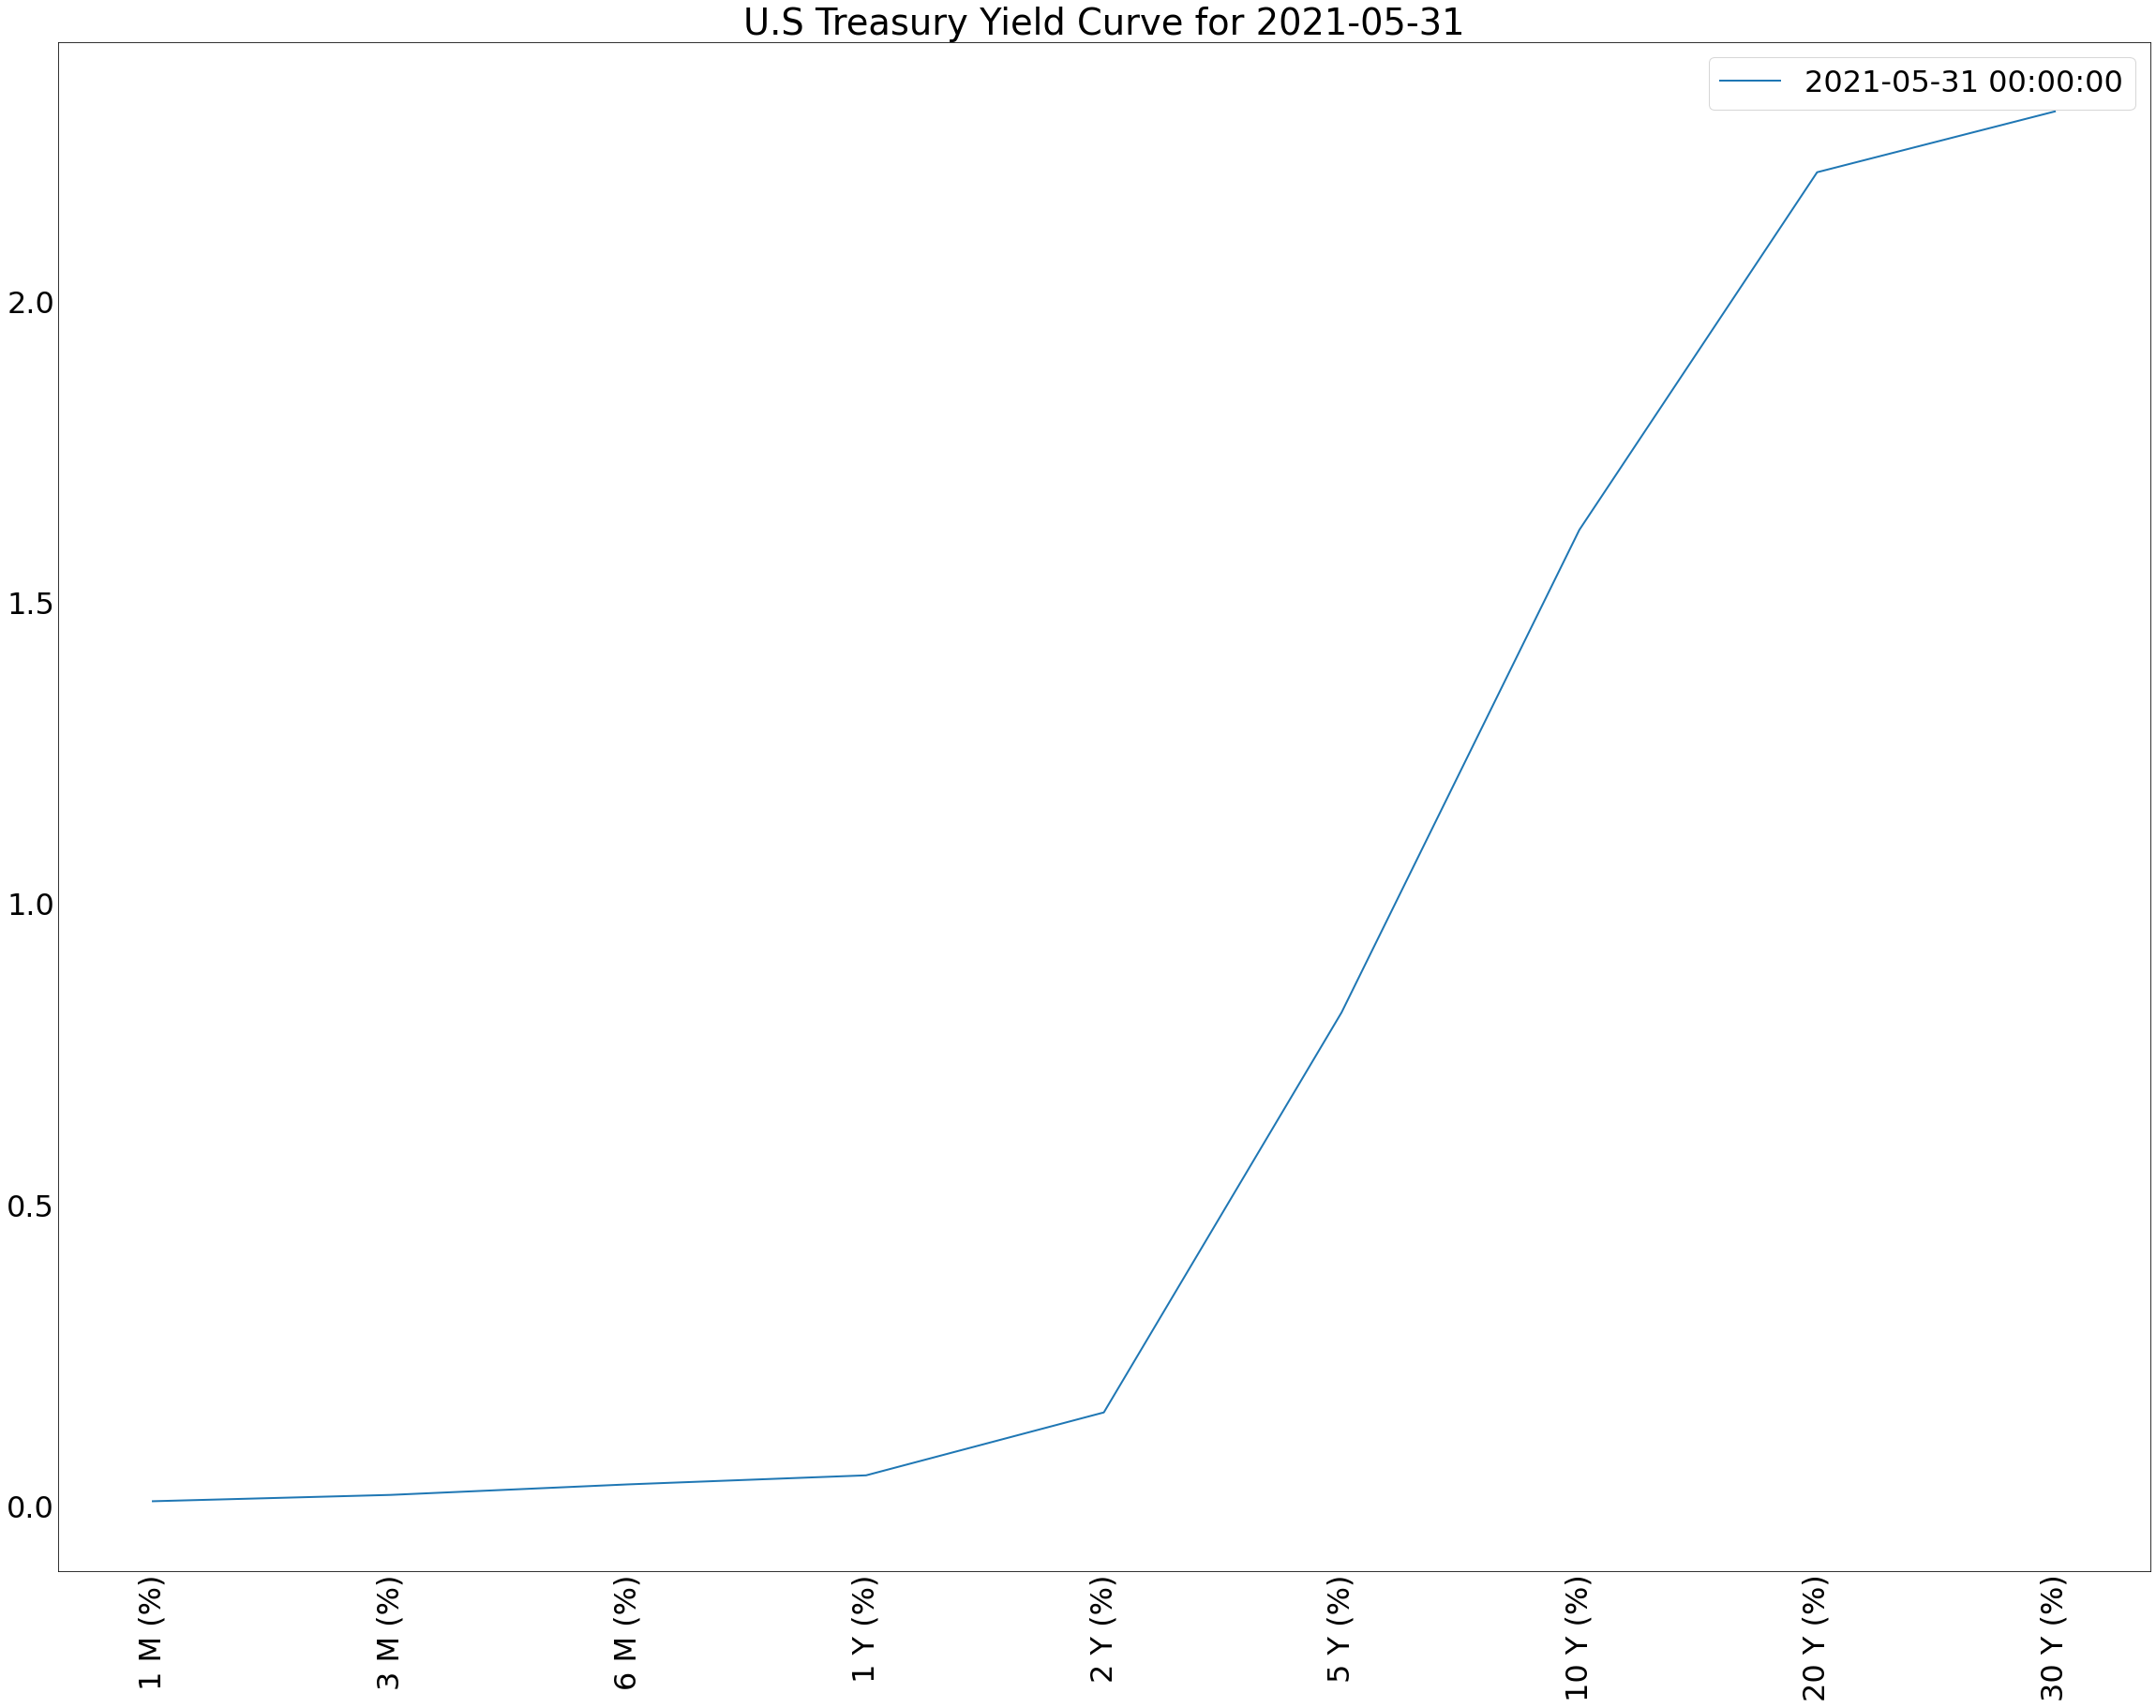

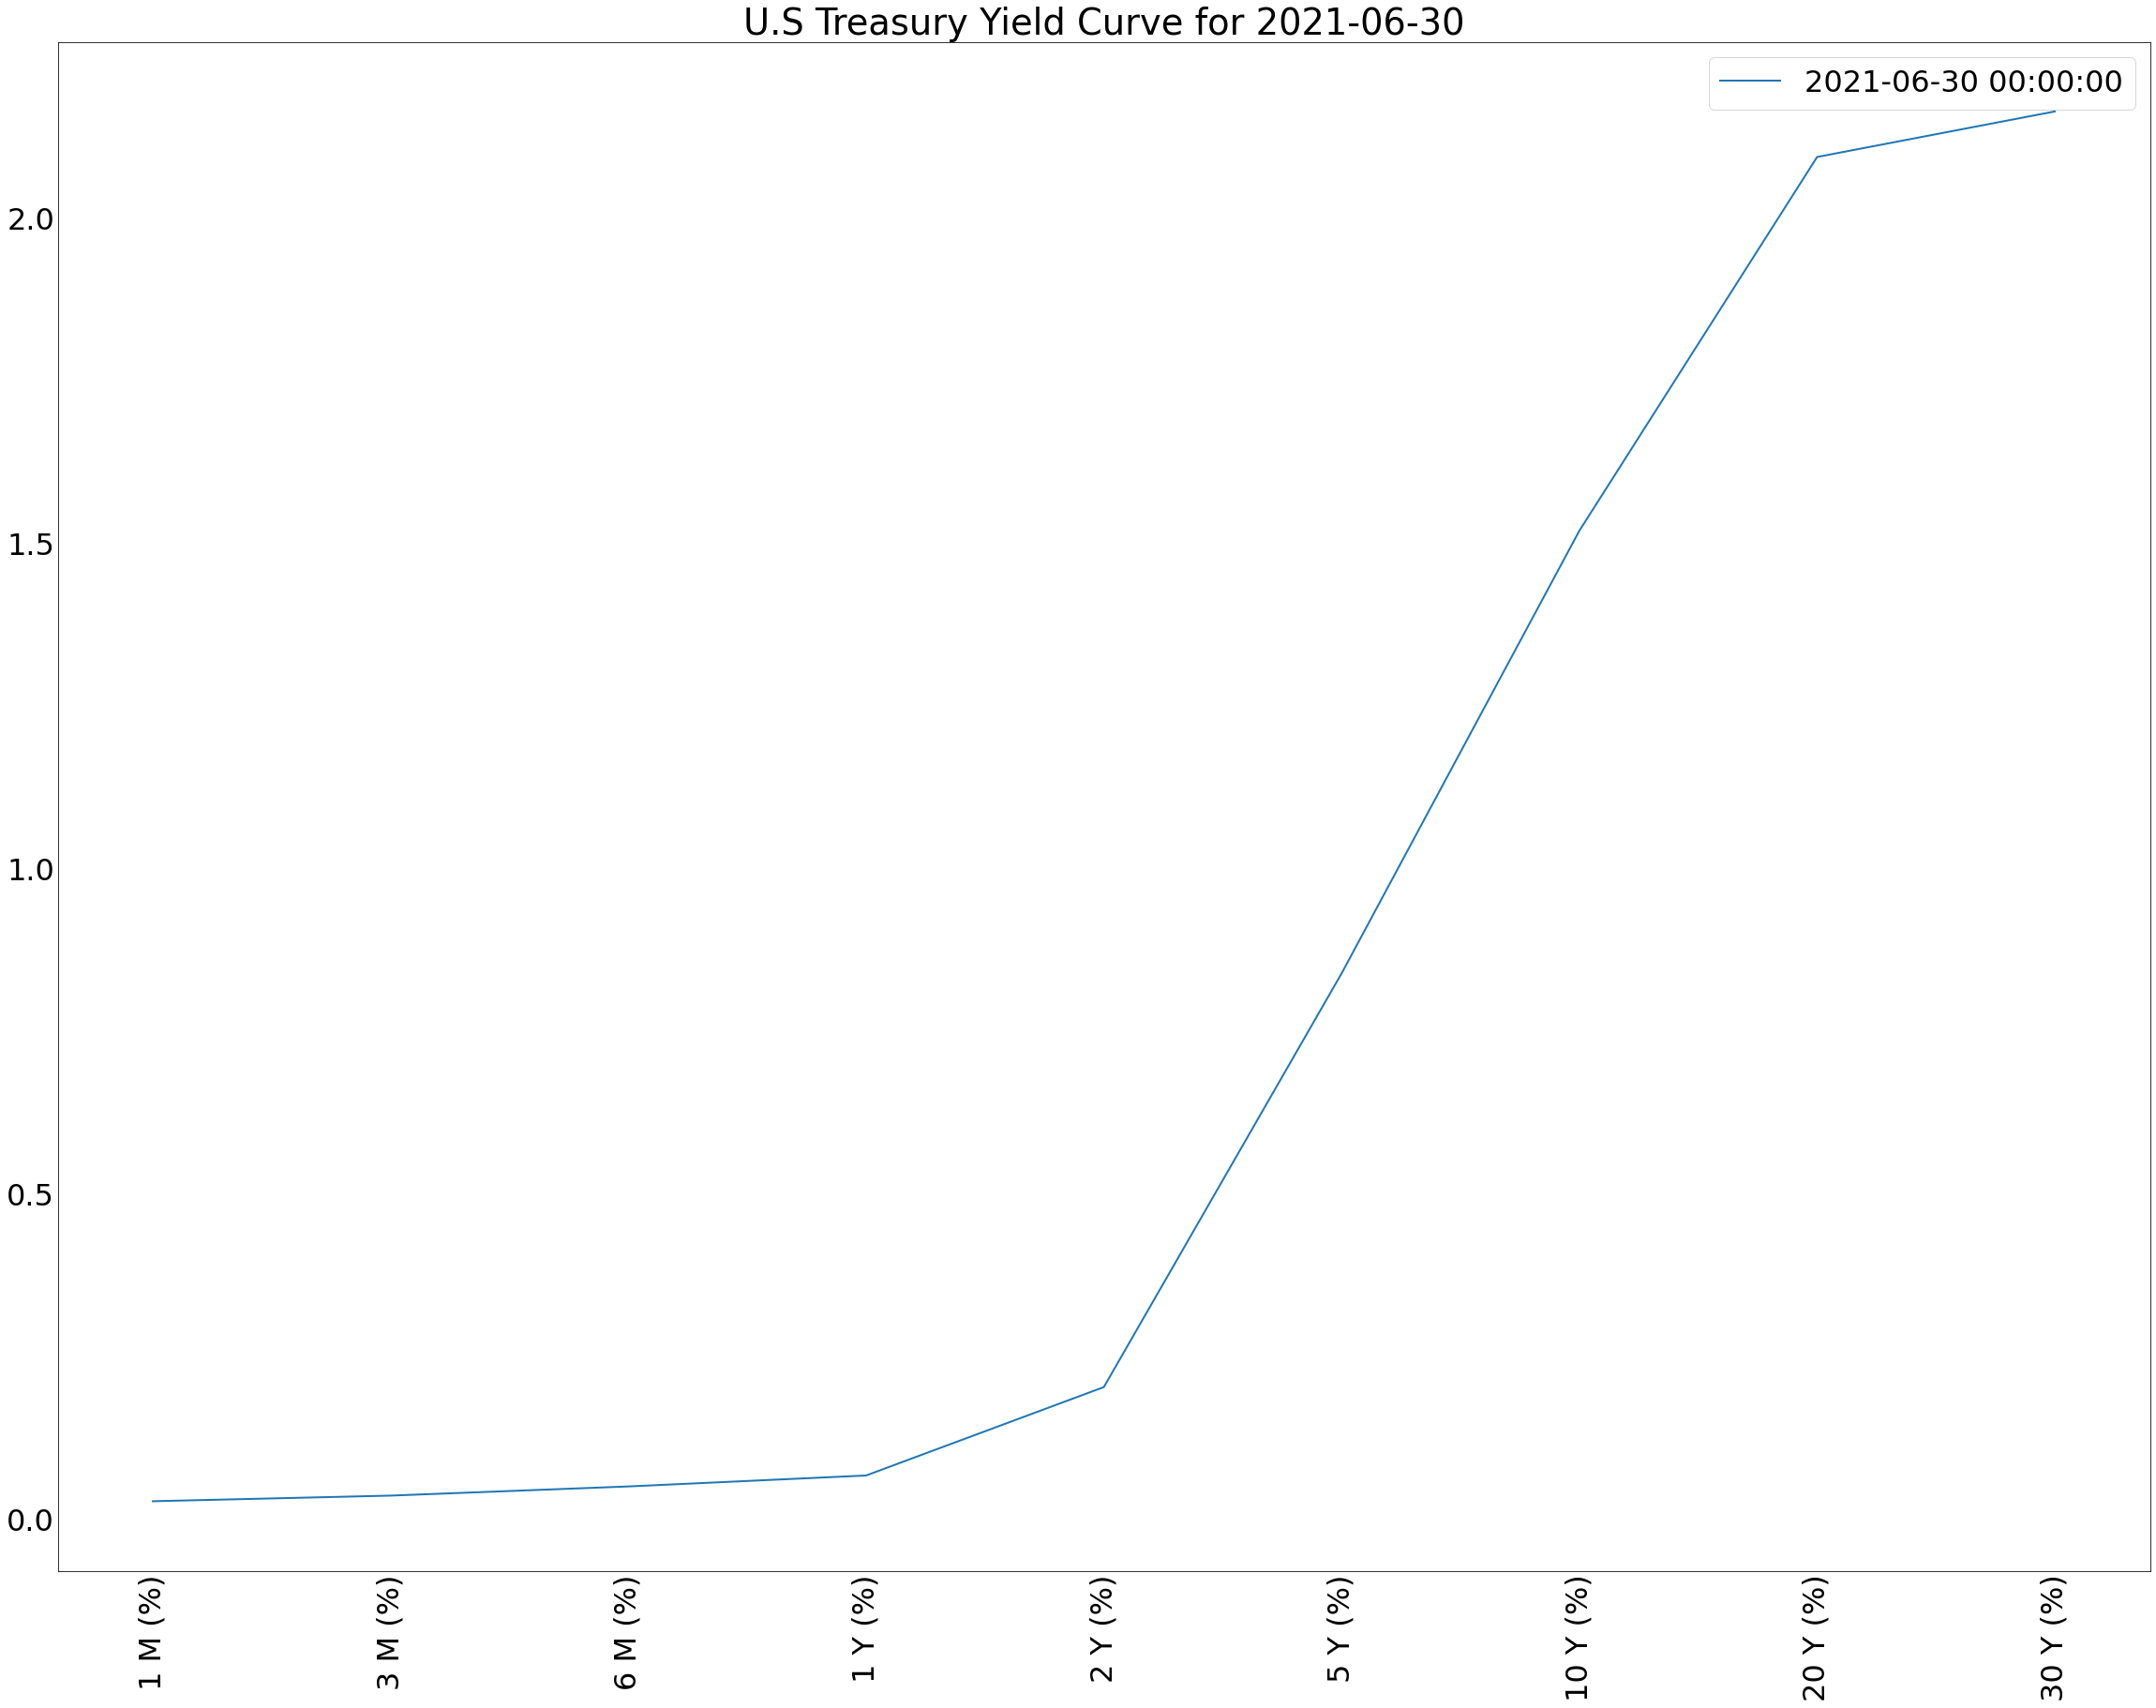

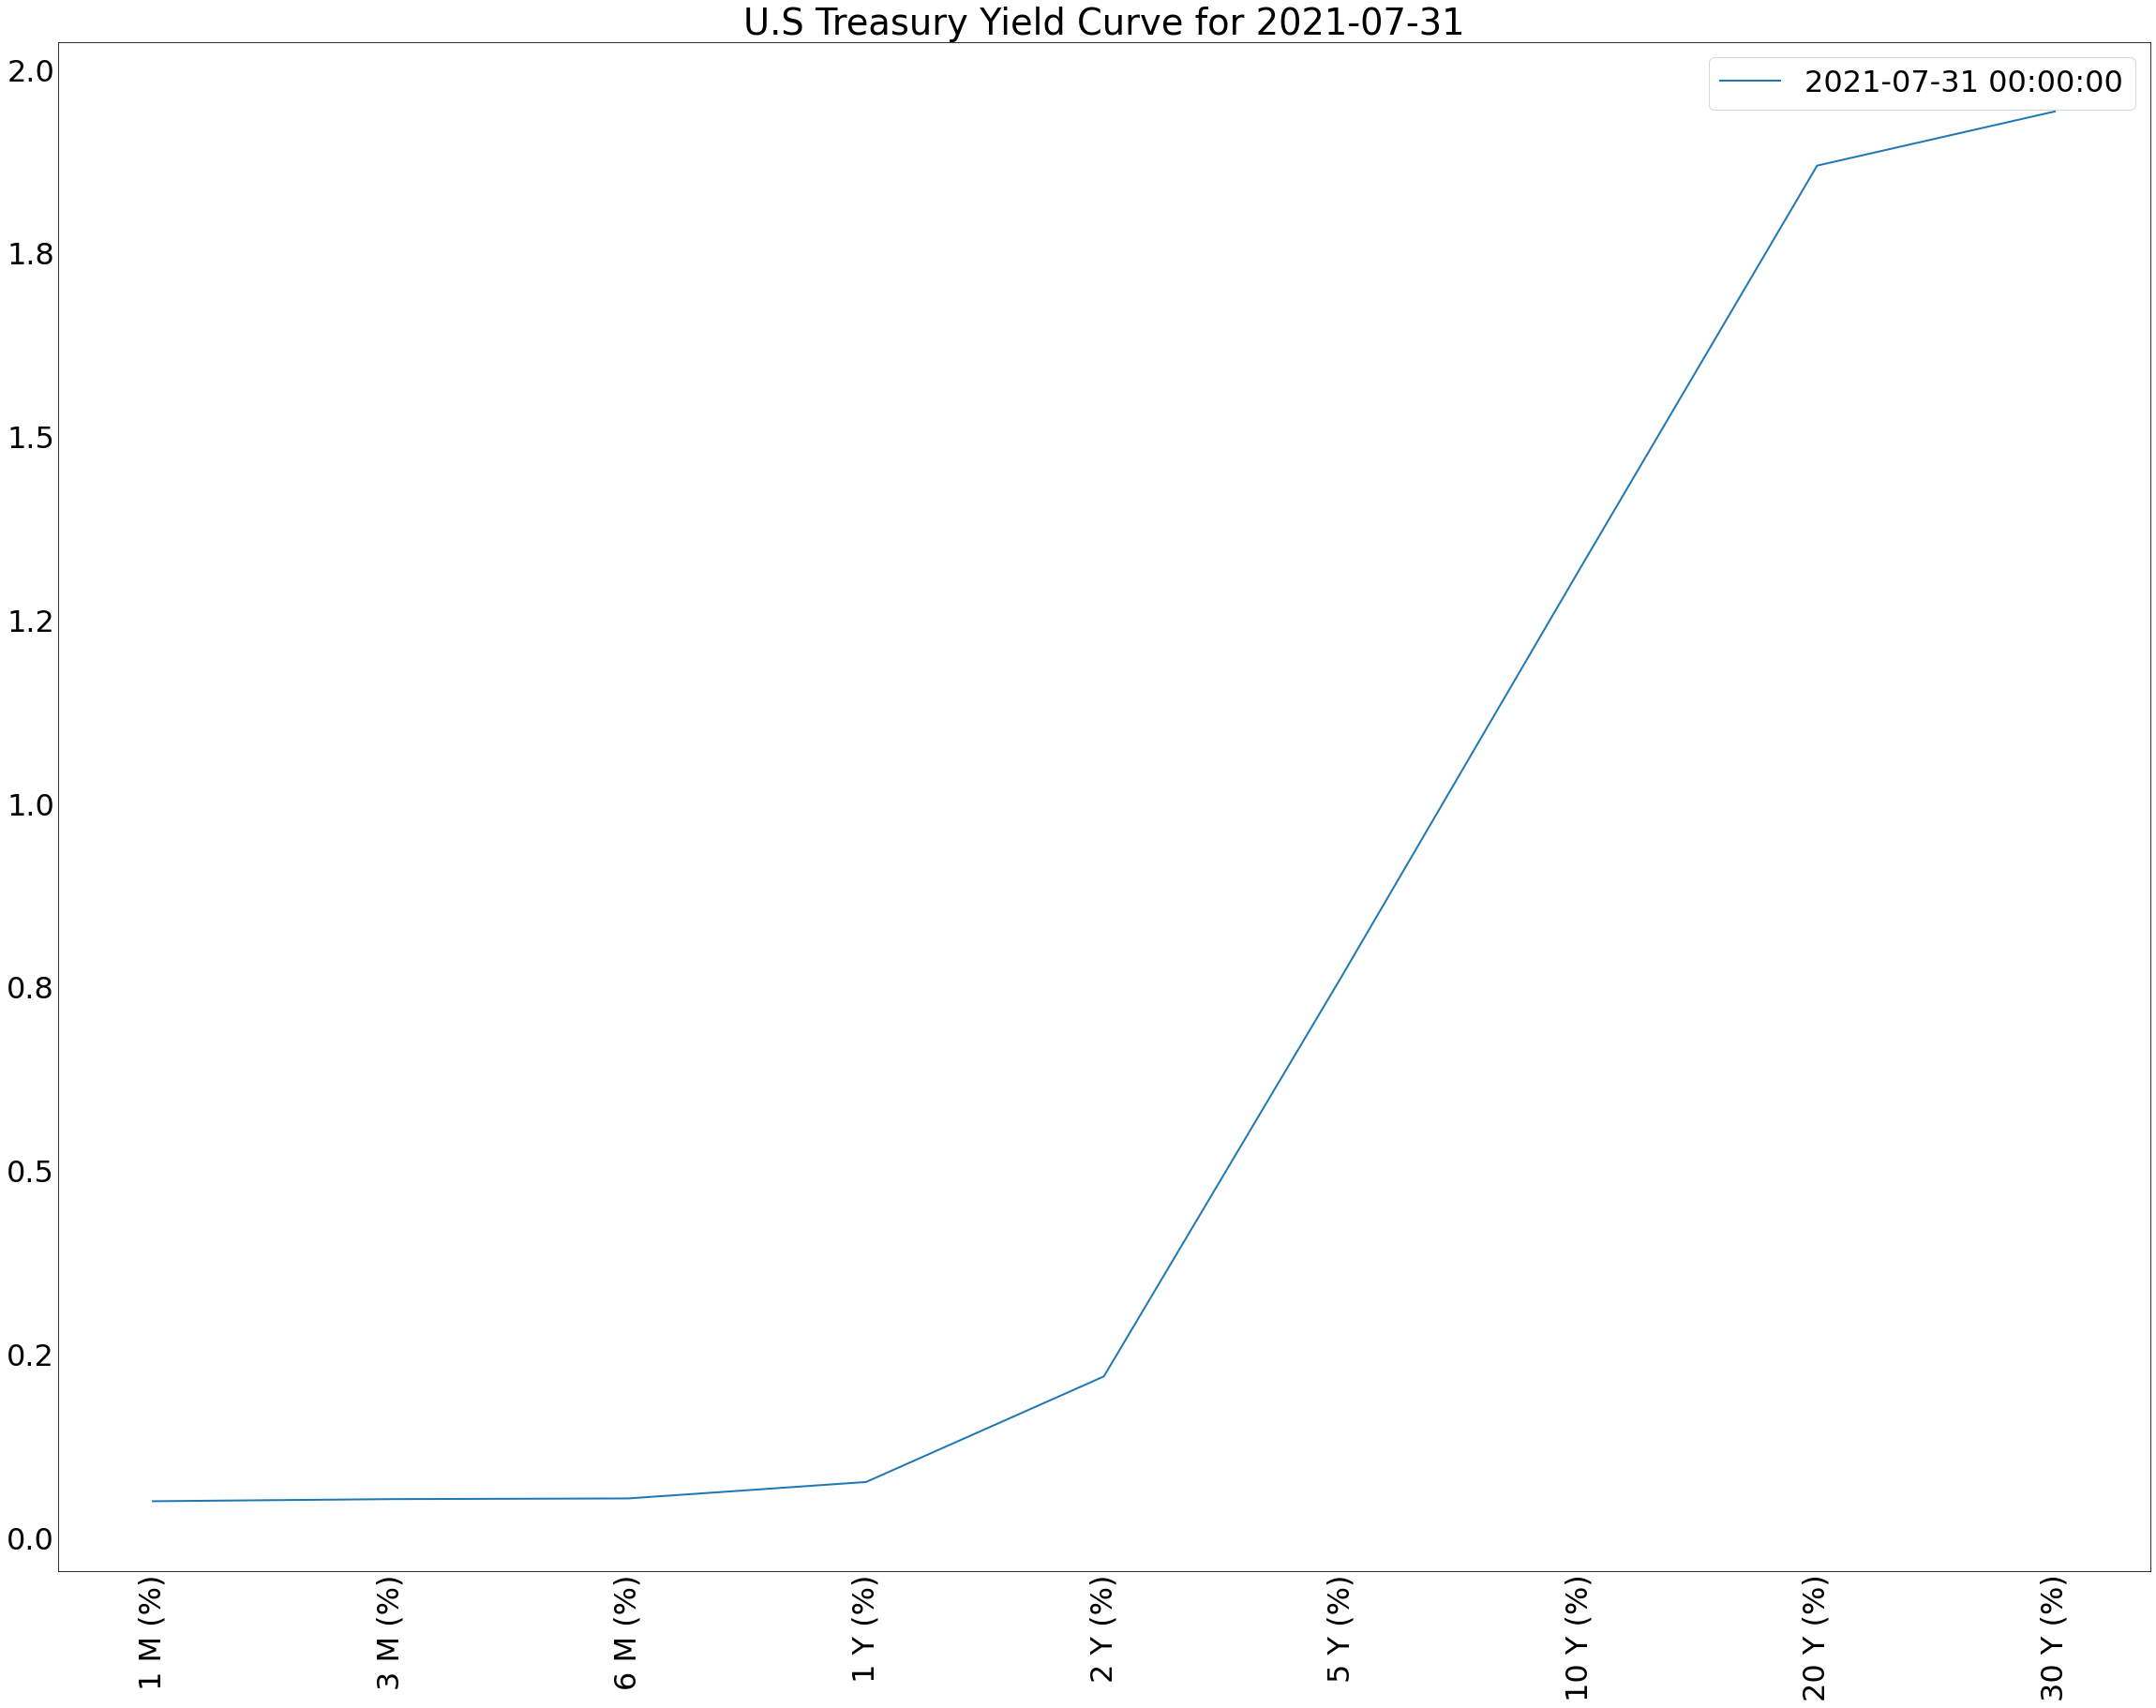

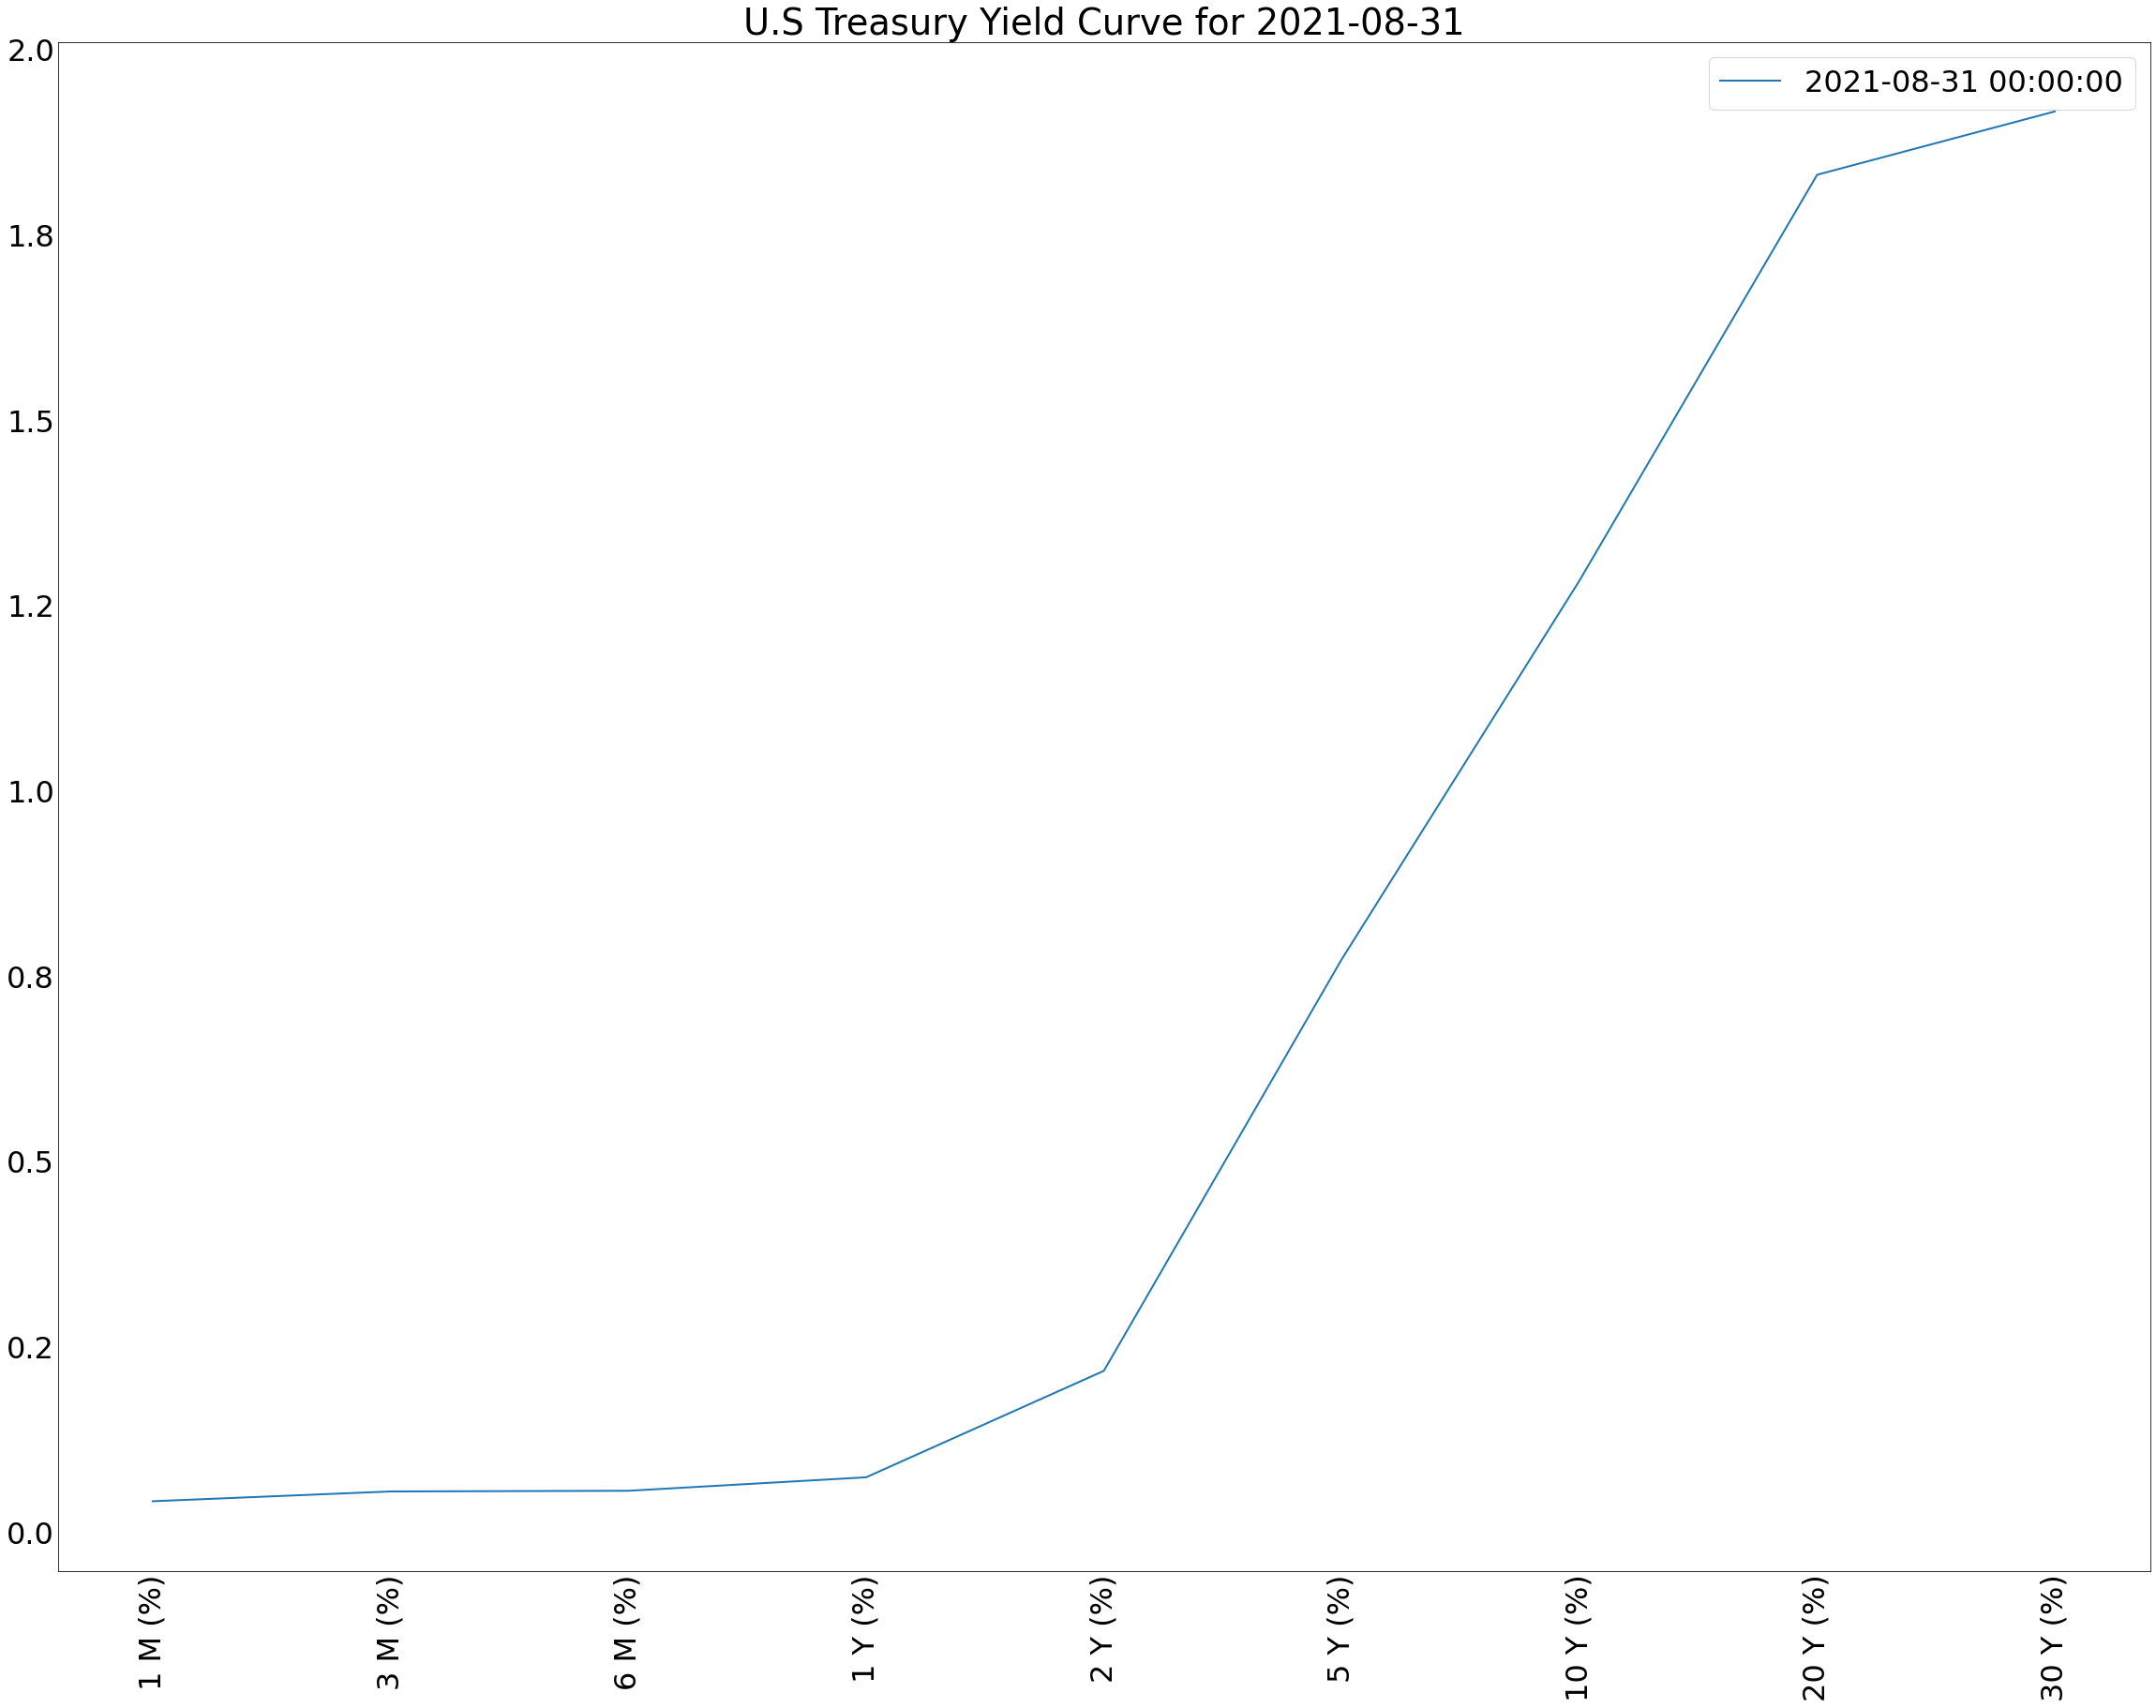

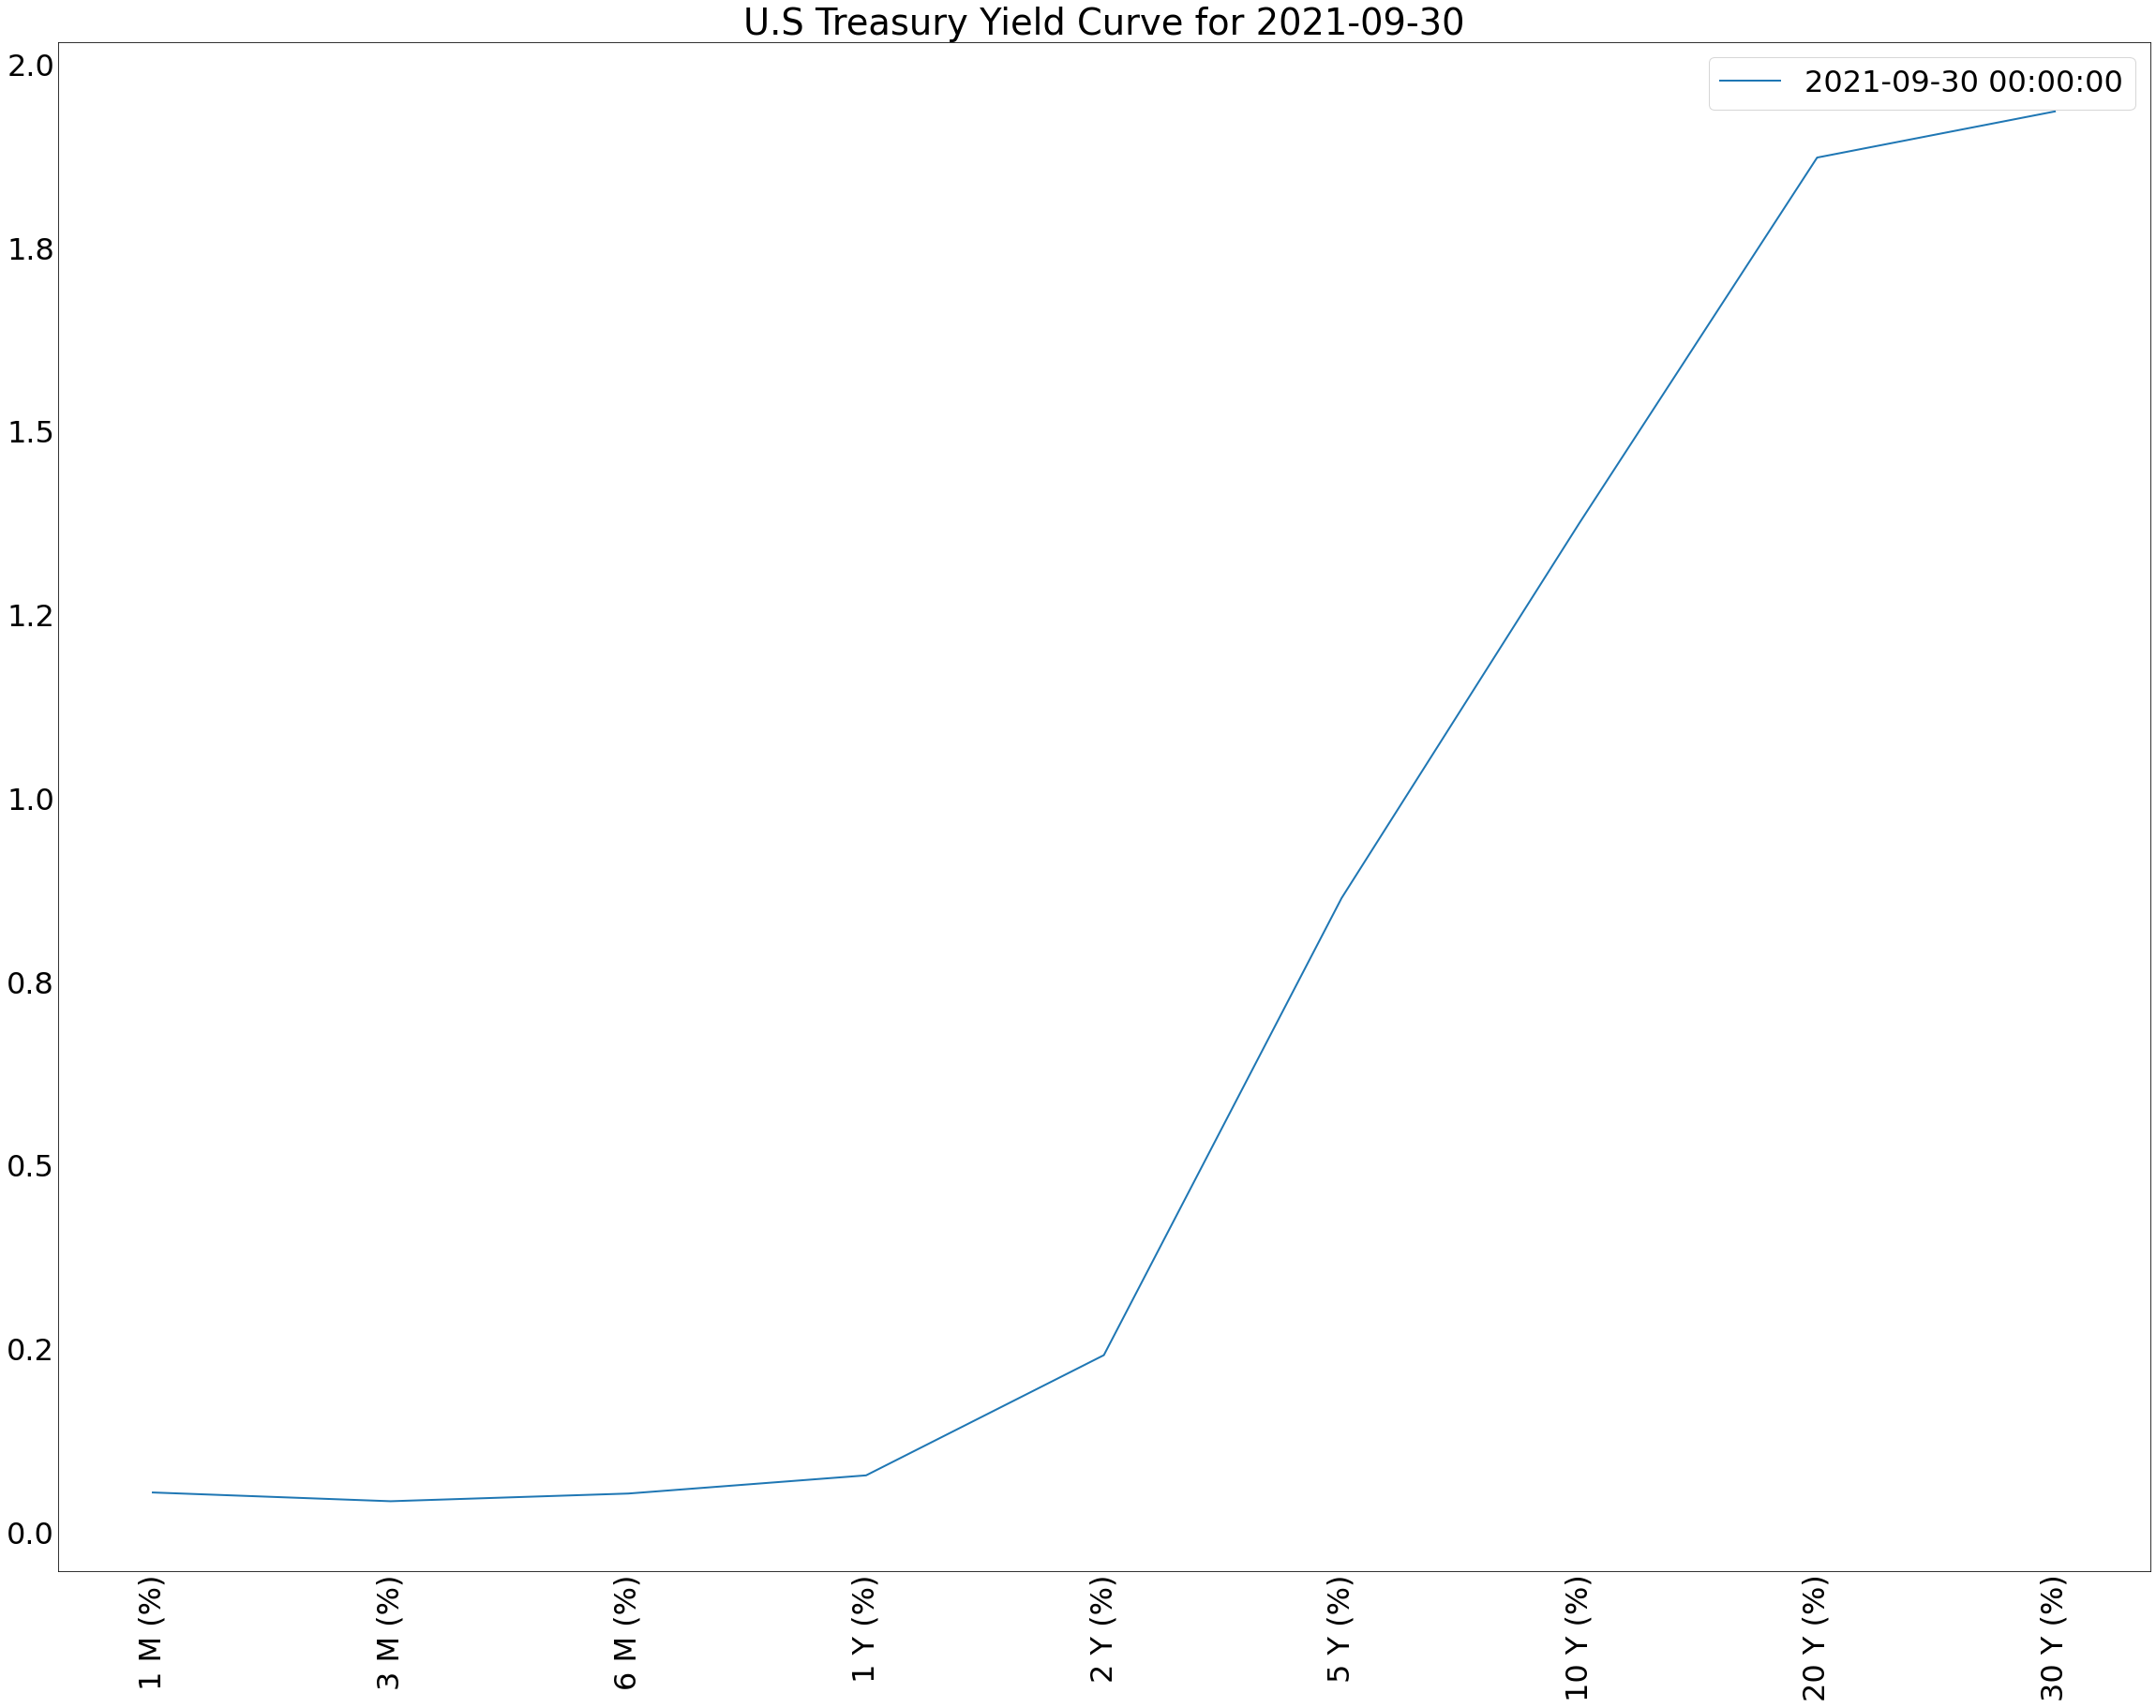

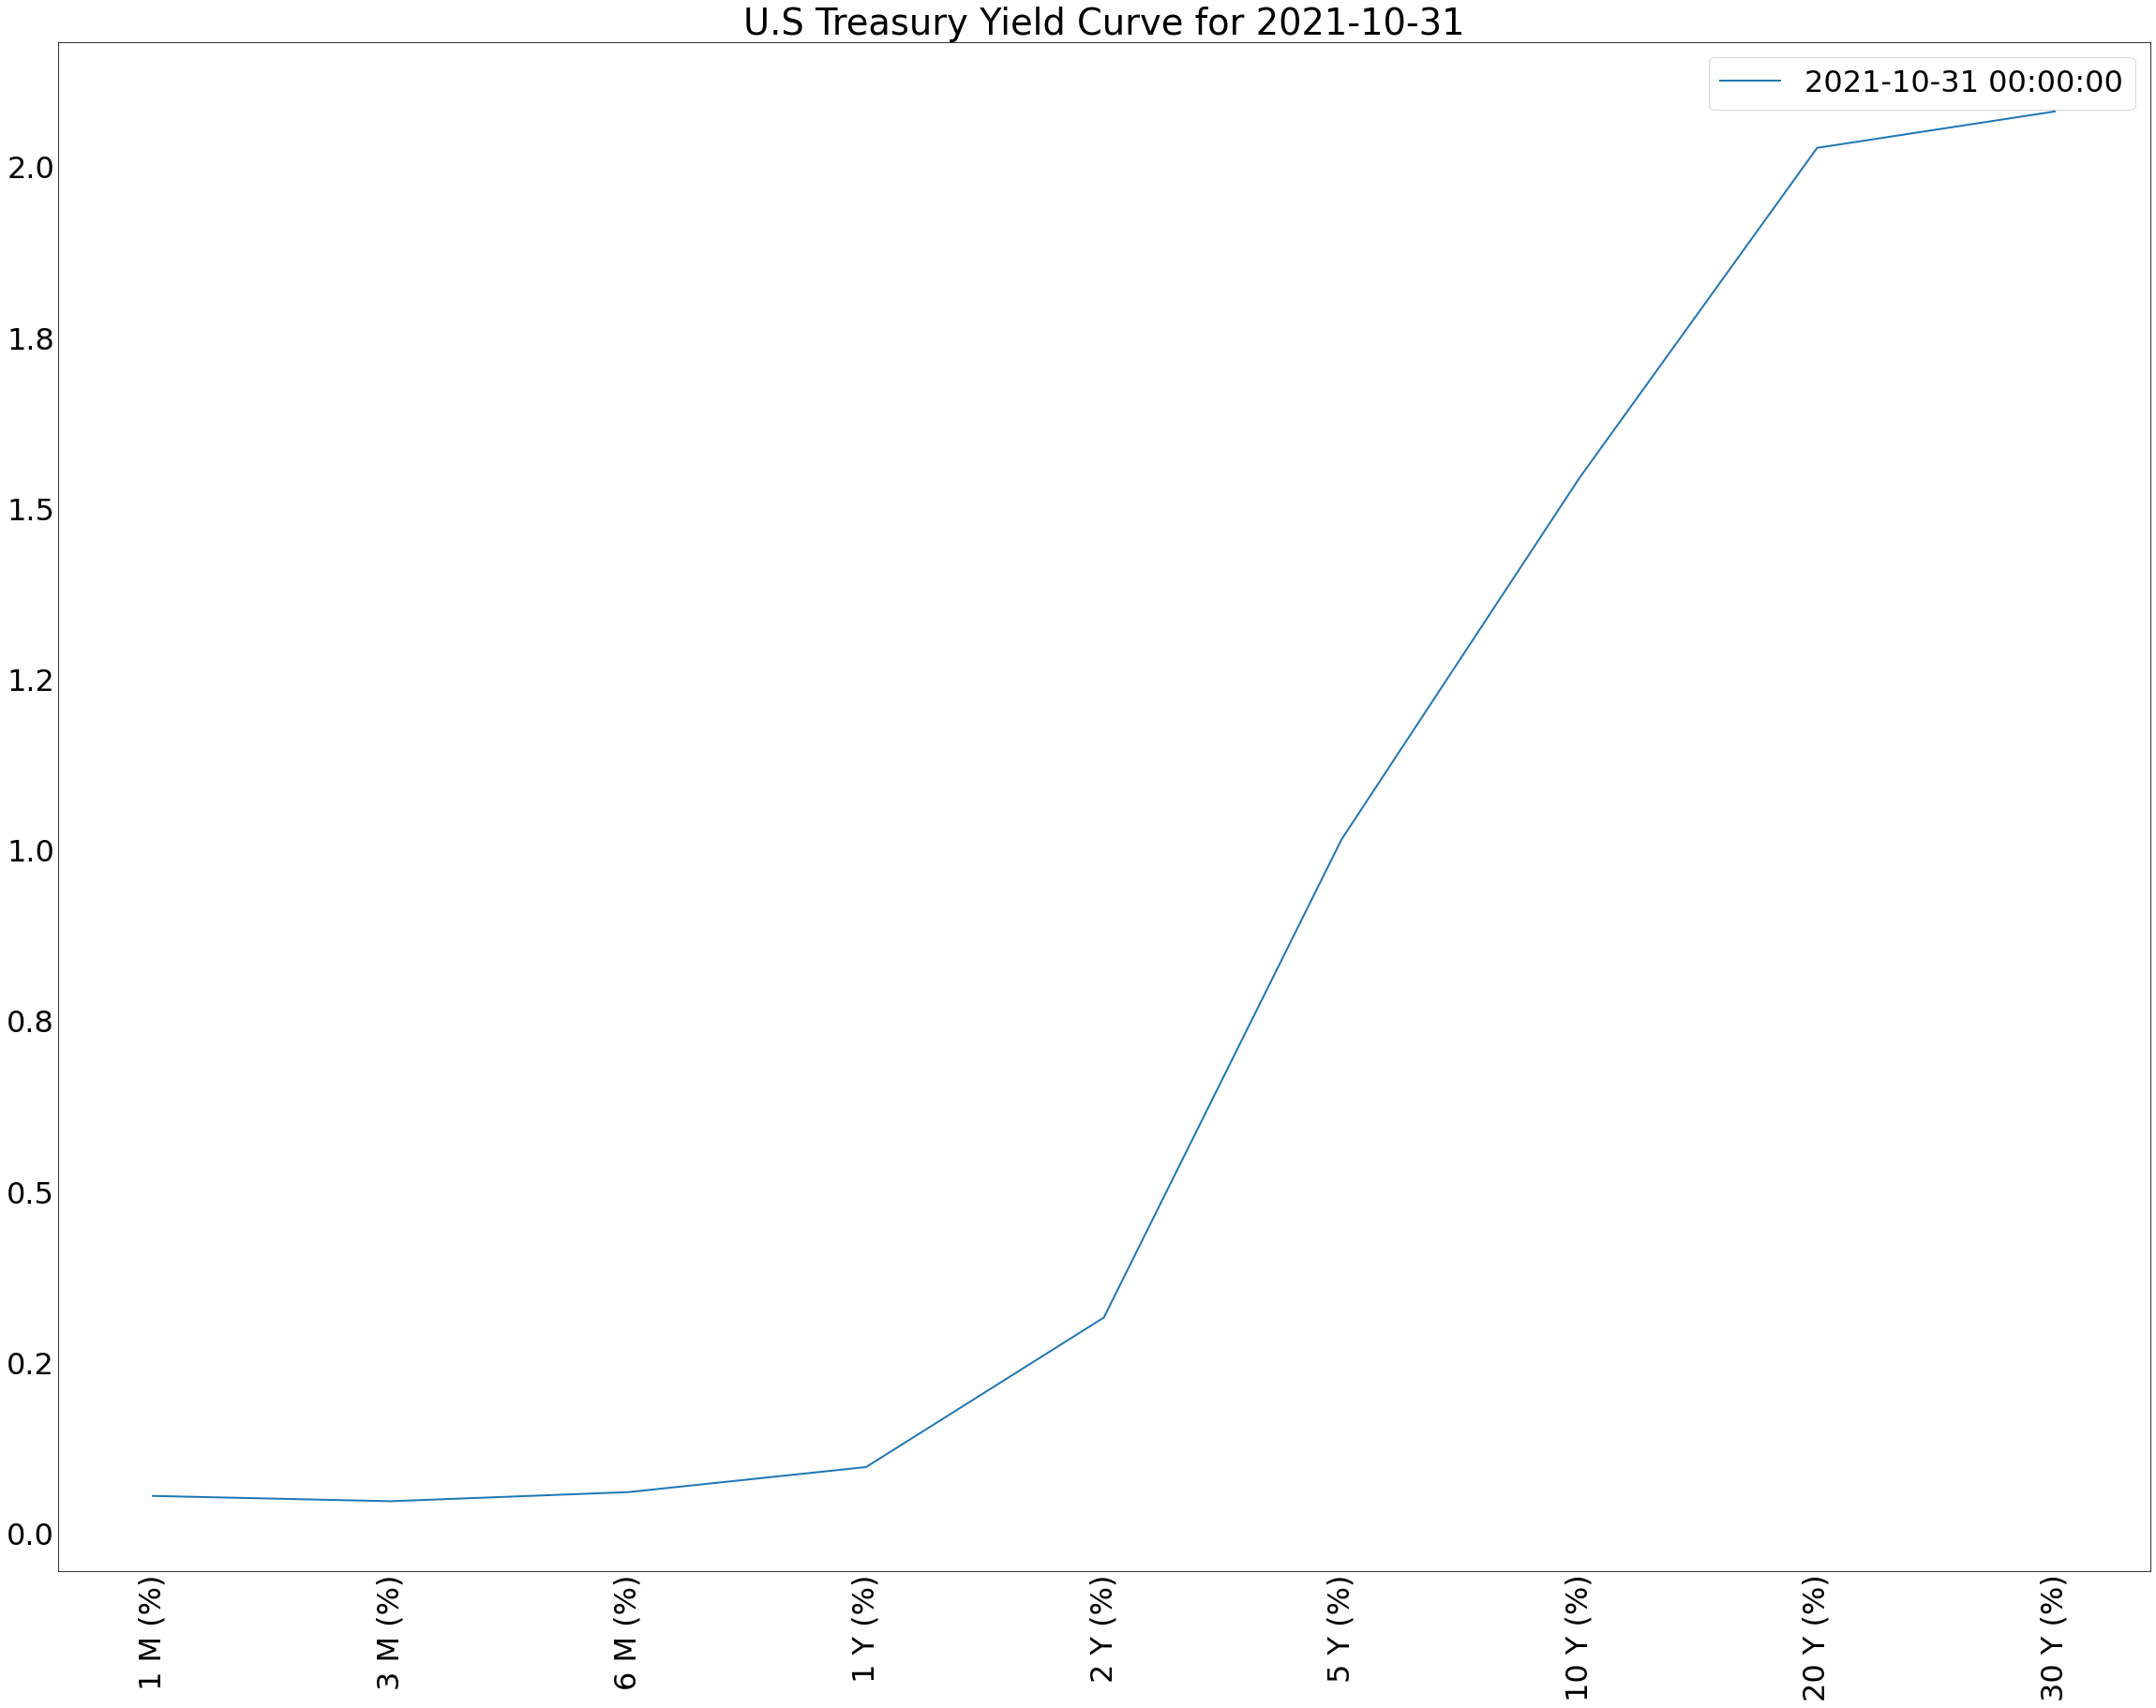

In [16]:
from library.plot_functions import *
from matplotlib.backends.backend_pdf import PdfPages

pdf= PdfPages("./plots/YieldCurves.pdf")

def yield_curve_by_date(df, pp):
    plt.rcParams.update({"font.size":32})
    keys = df.keys()
    for key in keys:
        plot_lines(df = df[key],
                   lw = 2,
                   title = "U.S Treasury Yield Curve for " + str(key)[0:10],
                   pp = pp)

yield_curve_by_date(treas_df.T, pdf)

pdf.close()

fig, (ax, ax1) = plt.subplots(2, 1, sharex=True)
ax.plot(x, y1, x, y2, color='black')
ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)
ax.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
ax.set_title('fill between where')

- Plot all of the variables from (3) in a single time series line plot. Indicate using shaded regions (example) any period where the 5 Year rate is less than the 1 year rate. Save this plot in the same pdf that you used in (3).

C:\Users\SAND8464\Repos\ECON611\Homework\library\plot_functions.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([label_format.format(x) for x in vals])


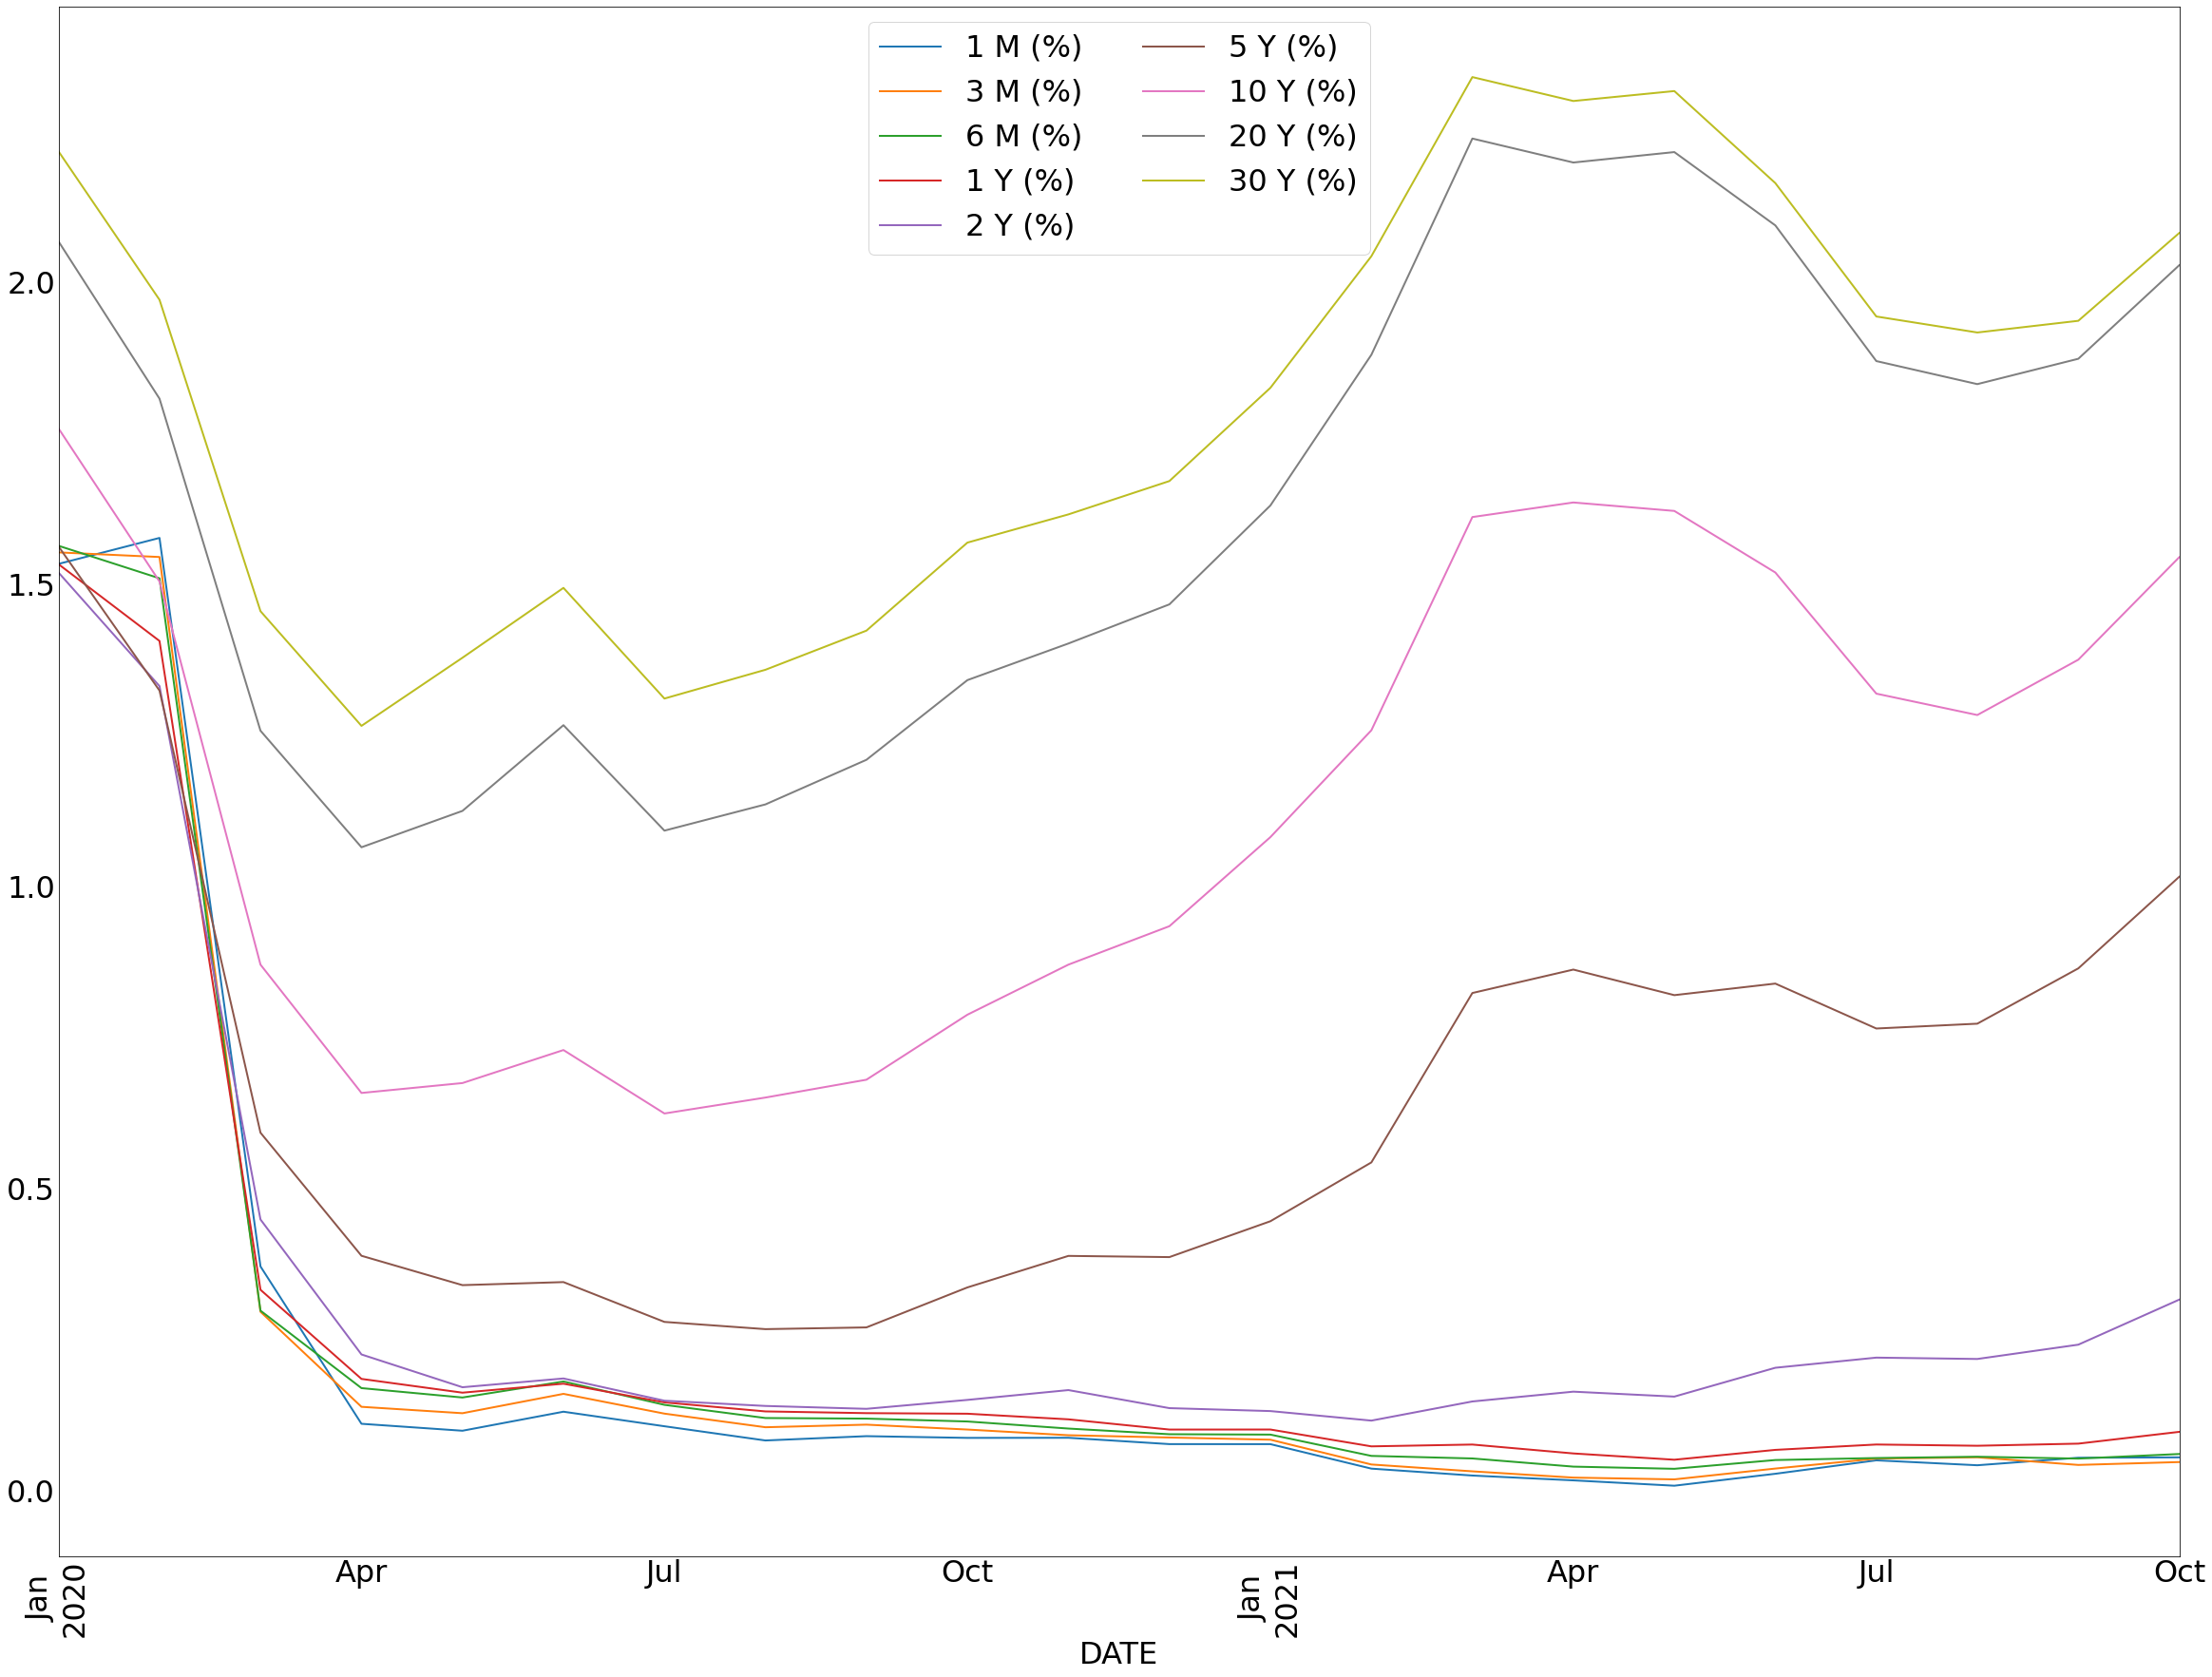

In [17]:
plot_lines(df = treas_df,
          lw = 2)